# Pillar 5 - Capstone Project
Post Graduate Diploma in Artificial Intelligence and Machine Learning

Asian Institute of Management | School of Executive Education and Lifelong Learning

Dec 24 2025

Submitted and Authored by:

### Jose Norbiel G. Florendo
#### Corporate Resource Geologist in a Philippine Gold Mining Company

In compliance with the requirements of the Postgraduate Diploma in Artificial Intelligence and Machine Learning by the School of Executive Education and Lifelong Learning of the Asian Institute of Management, this capstone project was created to apply all the relevant skillsets learned in the program to a business problem or real life and industry-relevant application.



Complete dataset, model outputs have been uploaded and available at:
https://github.com/josenorbielflorendo-svg/AIM-PGDAIML-CAPSTONE

## Step 0 - Domain Selection:


The selected project domain is on Mining and Milling Production Statistics relevant to a Gold Mining company. With the use of Supervised Machine Learning prediction/regression and meta-analysis of Mine Production, Mine Advance and Mill Production data, the goal of the capstone is to provide the a robust way to predict Gold and Silver throughput (Au oz/day and Ag oz/day) as well as Gold and Silver Recovery percentages from readily available shift and or daily throughput metrics.

Disclaimer:
The following datasets used was compiled from authorized company databases and approved for use by the company for the Author's study. Due to the confidential nature of Mine and Mill Production Data, which is a direct measure of a mining company's overall productivity, the following steps had to be done to maintain anonymity of the dataset:
1. The entire dataset has been shifted and offset by a certain factor while maintaining logical and statistical soundness and still mimic the behavior of the original dataset.
2. Data identifiers were all scrubbed clean of information that will point back to any specific location or non-publicly disclosed information by the company.
3. Since the dataset will be uploaded to a public repository, the specific dataset used for this study is only valid for use specifically for this activity and the requirements of this activity. Any other unauthorized use of this data is prohibited. Any other analysis or model that will be made from the uploaded dataset is therefore not representative of the company's exact performance since they do not match the real values.
4. Data cleaning has remained minimal since the data used for this are stored in centralized company detabases with strict schema and data-typing rules therefore very minimal cleaning was done for the purposes of this activity.

## Step 1: Problem Understanding & Framing

### Business Problem:
Productivity in mining companies is a keystone factor to its financial profitability and viability.

Productivity in Mines is measured by its Metal Output (Gold or Silver for Silver Mine) and Recovery for both metals.

However, recovery and output can only be obtained after the metal has already been extracted successfully. Recovery and Output is often calculated by mines by back-computing using Linear Regression, which often does not fully encapsulate the complex (and oftentimes) non-linear relationship between the inputs (Tonnage and Grade) and the target (recovery and output).

The core business problem is to improve operational efficiency and management of resources by accurately predicting key mining outputs: (1) gold and (2) silver recovery, (3) the total ounces of gold and (4) silver produced, and the (5) overall mine tonnage.

### Data Science Problem:
This project aims to develop machine learning models to forecast several continuous numerical variables based on historical operational data The data authorized for use in this study ranges from Jan 1 2017 up to Dec 15 2025. Specifically, the data science problem can be broken down into two main prediction/regression tasks:

1.  **Gold and Silver Throughput Prediction:** Predict 'Gold Ounces Produced' and 'Silver Ounces Produced'.
2.  **Gold and Silver Recovery Prediction:** Predict 'Gold Recovery', 'Gold and 'Silver Recovery'.
3.  **Mine Tonnage Prediction:** Predict 'Mine Tonnage_tons'.

### Task Type:
All tasks are **Regression** problems, as the goal is to predict continuous numerical values. The author has used several ensemble, artificial neural network and regression techniques which encompass the following:
1. Linear Regression - LinearRegression from sklearn
2. XGBoost Regression - XGBRegressor from xgboost
3. LightGBM Regression - LGBMRegressor from lightgbm
4. CatBoost Regression - CatBoostRegressor from CatBoost
5. Decision Tree Regresion - DecisionTreeRegressor from sklearn
6. Support Vector Machine Regression - SVR from sklearn
7. Multi-layer Perceptron Regression - MLPRegressor from sklearn

### Success Metrics:
The primary evaluation metrics for assessing model performance, as demonstrated in our model training and evaluation steps, are:
*   **R-squared (R^2):** Measures the proportion of variance in the dependent variable that can be predicted from the independent variables.
*   **Mean Absolute Error (MAE):** Represents the average of the absolute differences between predicted and actual values.
*   **Mean Squared Error (MSE):** Represents the average of the squared differences between predicted and actual values, penalizing larger errors more.
*   **Root Mean Squared Error (RMSE):** The square root of MSE, providing an error metric in the same units as the target variable.

Baseline and Hyperparameter tuned models were compared using the above prediction/regression metrics for assessing model performance and accuracy of all the models.

### Business KPIs (Key Performance Indicators):
Accurate predictions for these metrics directly translate to several critical business KPIs:
*   **Improved Resource Allocation:** Better forecasts allow for a more efficient allocation of mining equipment, personnel, and processing resources.
*   **Enhanced Financial Planning:** Accurate predictions of gold and silver output enable more precise revenue forecasting and risk management.
*   **Optimized Production Planning:** Understanding future recovery and tonnage helps in fine-tuning operational strategies to maximize yield and minimizing waste.
*   **Cost Savings:** By reducing unexpected downtimes or inefficient processing, predictive models can lead to significant operational cost reductions.
*   **Increased Profitability:** Ultimately, improved productivity and efficiency contribute to higher overall profitability for the mining operations.

## Step 2 - Data Collection & Understanding

Substep/s:
1. Load all provided CSV files ('Capstone Dataset_MCF.csv', 'Capstone Dataset_Mill Reports.csv', 'Capstone Dataset_Mine Advance.csv', 'Capstone Dataset_Mine Production.csv') into pandas DataFrames.
2. Summarise feature types, missing values, outliers, etc
3. Inspect their columns to identify which datasets contain the required target and predictor variables for both prediction tasks. This step is crucial for understanding the data availability and structure.
4. Data Visualization using histograms, time-series plots and scatterplots for features.
5. Create a data dictionary showing all the features, datatypes, units and allowable values.

In [1]:
# Load all the dependencies and libraries

# Data Analysis, Data Aggregation, Data Wrangling and Mathematical Operations libraries
import pandas as pd
print("Pandas library imported successfully.")
import numpy as np
print("Numpy library imported successfully.")

# Plotting Libraries
import matplotlib.pyplot as plt # for basic plot types
print("matplotlib.pyplot imported successfully.")
import seaborn as sns # for extended plot types and plot customization
print("seaborn imported successfully.")
plt.rcParams["figure.dpi"] = 100      # we set the figure DPI to 100 for higher resolution plots during creation inside our Jupyter Notebook
plt.rcParams["savefig.dpi"] = 100     # we set the savefigure DPI to 100 for higher resolution plots when exporting for powerpoint

# Data Pre-processing libraries
import re # for string operations such as .split() and .search()
print("re imported successfully.")
from sklearn.preprocessing import StandardScaler # for standardizing dataset
print("StandardScaler imported successfully.")
from sklearn.model_selection import train_test_split # for splitting of dataset to Test and Training splits
print("train_test_split imported successfully.")
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # to measure our regression
print("r2_score, mean_absolute_error, and mean_squared_error imported successfully.")
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning
print("GridSearchCV imported successfully.")

# Model Saving libraries
import joblib # for saving our machine learning models to files that can be used in future runs
print("joblib imported successfully.")
import copy # for more advanced copying uses when doing model summarization
print("copy imported successfully.")
from sklearn.pipeline import Pipeline # for establishment of more robust and repeatable modelling steps
print("Pipeline imported successfully.")

# Regression/Prediction libraries
from sklearn.linear_model import LinearRegression # Linear Regression tasks
print("LinearRegression imported successfully.")
from xgboost import XGBRegressor # Regressions tasks related to Xtreme Gradient Boosting
print("XGBRegressor imported successfully.")
from lightgbm import LGBMRegressor # Regression tasks related to LightGBM
print("LGBMRegressor imported successfully.")
from catboost import CatBoostRegressor # Regression tasks related to CatBoost
print("CatBoostRegressor imported successfully.")
from sklearn.tree import DecisionTreeRegressor # Regression tasks related to Decision Trees
print("DecisionTreeRegressor imported successfully.")
from sklearn.svm import SVR # Regression tasks related to Support Vector Machines
print("SVR imported successfully.")
from sklearn.neural_network import MLPRegressor # Regression tasks related to Artificial Neural Networks
print("MLPRegressor imported successfully.")
# We import and install catboost since catboost is not normally included in Google Colab Environments
import sys
!{sys.executable} -m pip install catboost
print("Catboost library installed and imported successfully.")

import shap

print('\nLoaded all the dependencies successfully')

Pandas library imported successfully.
Numpy library imported successfully.
matplotlib.pyplot imported successfully.
seaborn imported successfully.
re imported successfully.
StandardScaler imported successfully.
train_test_split imported successfully.
r2_score, mean_absolute_error, and mean_squared_error imported successfully.
GridSearchCV imported successfully.
joblib imported successfully.
copy imported successfully.
Pipeline imported successfully.
LinearRegression imported successfully.
XGBRegressor imported successfully.
LGBMRegressor imported successfully.
CatBoostRegressor imported successfully.
DecisionTreeRegressor imported successfully.
SVR imported successfully.
MLPRegressor imported successfully.
Catboost library installed and imported successfully.


'C:\Users\Jose' is not recognized as an internal or external command,
operable program or batch file.



Loaded all the dependencies successfully


In [2]:
# create a function that will help us construct the Data Dictionary for all the dataframes to iterate through
def create_dataframe_summary(df): # the input is the name of the dataframe to be summarized
    """
    This will generate a summary DataFrame for the input DataFrame, including column name,
    non-null count, column data type, units, min, max, and average values
    for numerical columns.
    """
    summary_data = [] # empty dictionary

    for col_name in df.columns: # iterate through all the columns
        non_null_count = df[col_name].count() # count the amount of entries per column that is not null
        data_type = df[col_name].dtype  #  output the datatype per column
        unit = None
        min_val = None
        max_val = None
        avg_val = None

        # Extract unit by getting characters after the last underscore
        # The column names were written in such a way that the last underscore contains the units for the specific column e.g. Gold Recovery_%
        # wherein we extract the string after the last underscore

        if '_' in col_name: # check if column name has underscore
            unit = col_name.split('_')[-1]  # get the string after the last underscore

        # If column is numerical, calculate min, max, and average
        if pd.api.types.is_numeric_dtype(df[col_name]): # check if column is numerical
            if non_null_count > 0: # Only calculate if there are non-null values
                min_val = df[col_name].min()  # extract the floor value
                max_val = df[col_name].max()  # extract the roof value
                avg_val = df[col_name].mean() # extract the average value
        elif pd.api.types.is_datetime64_any_dtype(df[col_name]): # check if column is datetype
            if non_null_count > 0: # Only calculate if there are non-null values
                    min_val = df[col_name].min()  # extract the floor value
                    max_val = df[col_name].max() # extract the roof value
                    avg_val = df[col_name].mean() # extract the average value

        # store the obtained information into the dictionary
        summary_data.append({
            'Column Name': col_name,
            'Non-Null Count': non_null_count,
            'Data Type': str(data_type),
            'Unit': unit,
            'Min Value': min_val,
            'Max Value': max_val,
            'Average Value': avg_val
        })

    # convert dictionary to a pandas dataframe for visualization as a table
    summary_df = pd.DataFrame(summary_data)

    # output the pandas dataframe containing the entire data dictionary for the selected dataframe
    return summary_df


--- Capstone Dataset_MCF.csv ---


Date  Mine Days Work_days  Mine Tons per Day_tpd  Feed Tonnage_tons  \
0 2016-01-01                  1.0                    NaN             1100.0   
1 2016-01-02                  1.0                    NaN             1535.0   
2 2016-01-03                  1.0                    NaN             1385.0   
3 2016-01-04                  1.0                    NaN             1130.0   
4 2016-01-05                  1.0                    NaN             1210.0   

   Feed Grade_Au gpt     MCF_%  Mill Days Work_days  Mill Tons per Day_tpd  \
0           5.456000  0.820960                  1.0                    NaN   
1           3.772671  1.049361                  1.0                    NaN   
2           3.457329  0.984009                  1.0                    NaN   
3           4.986549  0.719688                  1.0                    NaN   
4           4.904917  0.733874                  1.0                    NaN   

   Milled Tonnage_tons  Milled Grade_Au gpt  Gold Recovered_Au oz  \
0          1002.266676             4.479157            107.232005   
1           951.617042             3.958895             86.027053   
2          1203.828367             3.402041             90.980186   
3          1139.722117             3.588760             90.324699   
4           919.403848             3.599592             77.259464   

   Gold Recovery_%  Gold Tails_Solid_Au gpt  Gold Tails_Solution_Au gpt  \
0         0.742941                 0.927370                    0.150570   
1         0.710245                 0.940347                    0.139515   
2         0.690958                 0.892142                    0.107629   
3         0.686867                 0.859675                    0.183517   
4         0.726108                 0.780336                    0.140490   

   Gold Tails_Total_Au gpt  
0                 1.151410  
1                 1.147110  
2                 1.051372  
3                 1.123760  
4                 0.985899


-- Data Dictionary for Capstone Dataset_MCF.csv --


Column Name  Non-Null Count       Data Type    Unit  \
0                         Date            3637  datetime64[ns]    None   
1          Mine Days Work_days            3637         float64    days   
2        Mine Tons per Day_tpd              65         float64     tpd   
3            Feed Tonnage_tons            3621         float64    tons   
4            Feed Grade_Au gpt            3621         float64  Au gpt   
5                        MCF_%            3633         float64       %   
6          Mill Days Work_days            3633         float64    days   
7        Mill Tons per Day_tpd               2         float64     tpd   
8          Milled Tonnage_tons            3612         float64    tons   
9          Milled Grade_Au gpt            3612         float64  Au gpt   
10        Gold Recovered_Au oz            3612         float64   Au oz   
11             Gold Recovery_%            3612         float64       %   
12     Gold Tails_Solid_Au gpt            3612         float64  Au gpt   
13  Gold Tails_Solution_Au gpt            3612         float64  Au gpt   
14     Gold Tails_Total_Au gpt            3612         float64  Au gpt   

              Min Value            Max Value                  Average Value  
0   2016-01-01 00:00:00  2025-12-15 00:00:00  2020-12-22 23:59:59.999999744  
1                   0.0                  1.0                       0.993075  
2                   0.0               3402.0                       2413.788  
3                   0.0          4267.563131                    2108.103596  
4                   0.0            11.463047                       4.190942  
5                   0.0             2.361656                       0.904612  
6                   0.0                  1.0                        0.96153  
7                   0.0                  0.0                            0.0  
8            272.228026          3233.961257                    1985.267193  
9              1.535027              8.20053                       3.735963  
10            30.046966           570.830067                     201.217315  
11                0.607                  1.0                       0.850101  
12                  0.0             4.090555                       0.531711  
13             -0.00329             0.496618                       0.017858  
14                  0.0             1.738964                       0.552332


-- Histogram plots for all numeric columns in Capstone Dataset_MCF.csv --


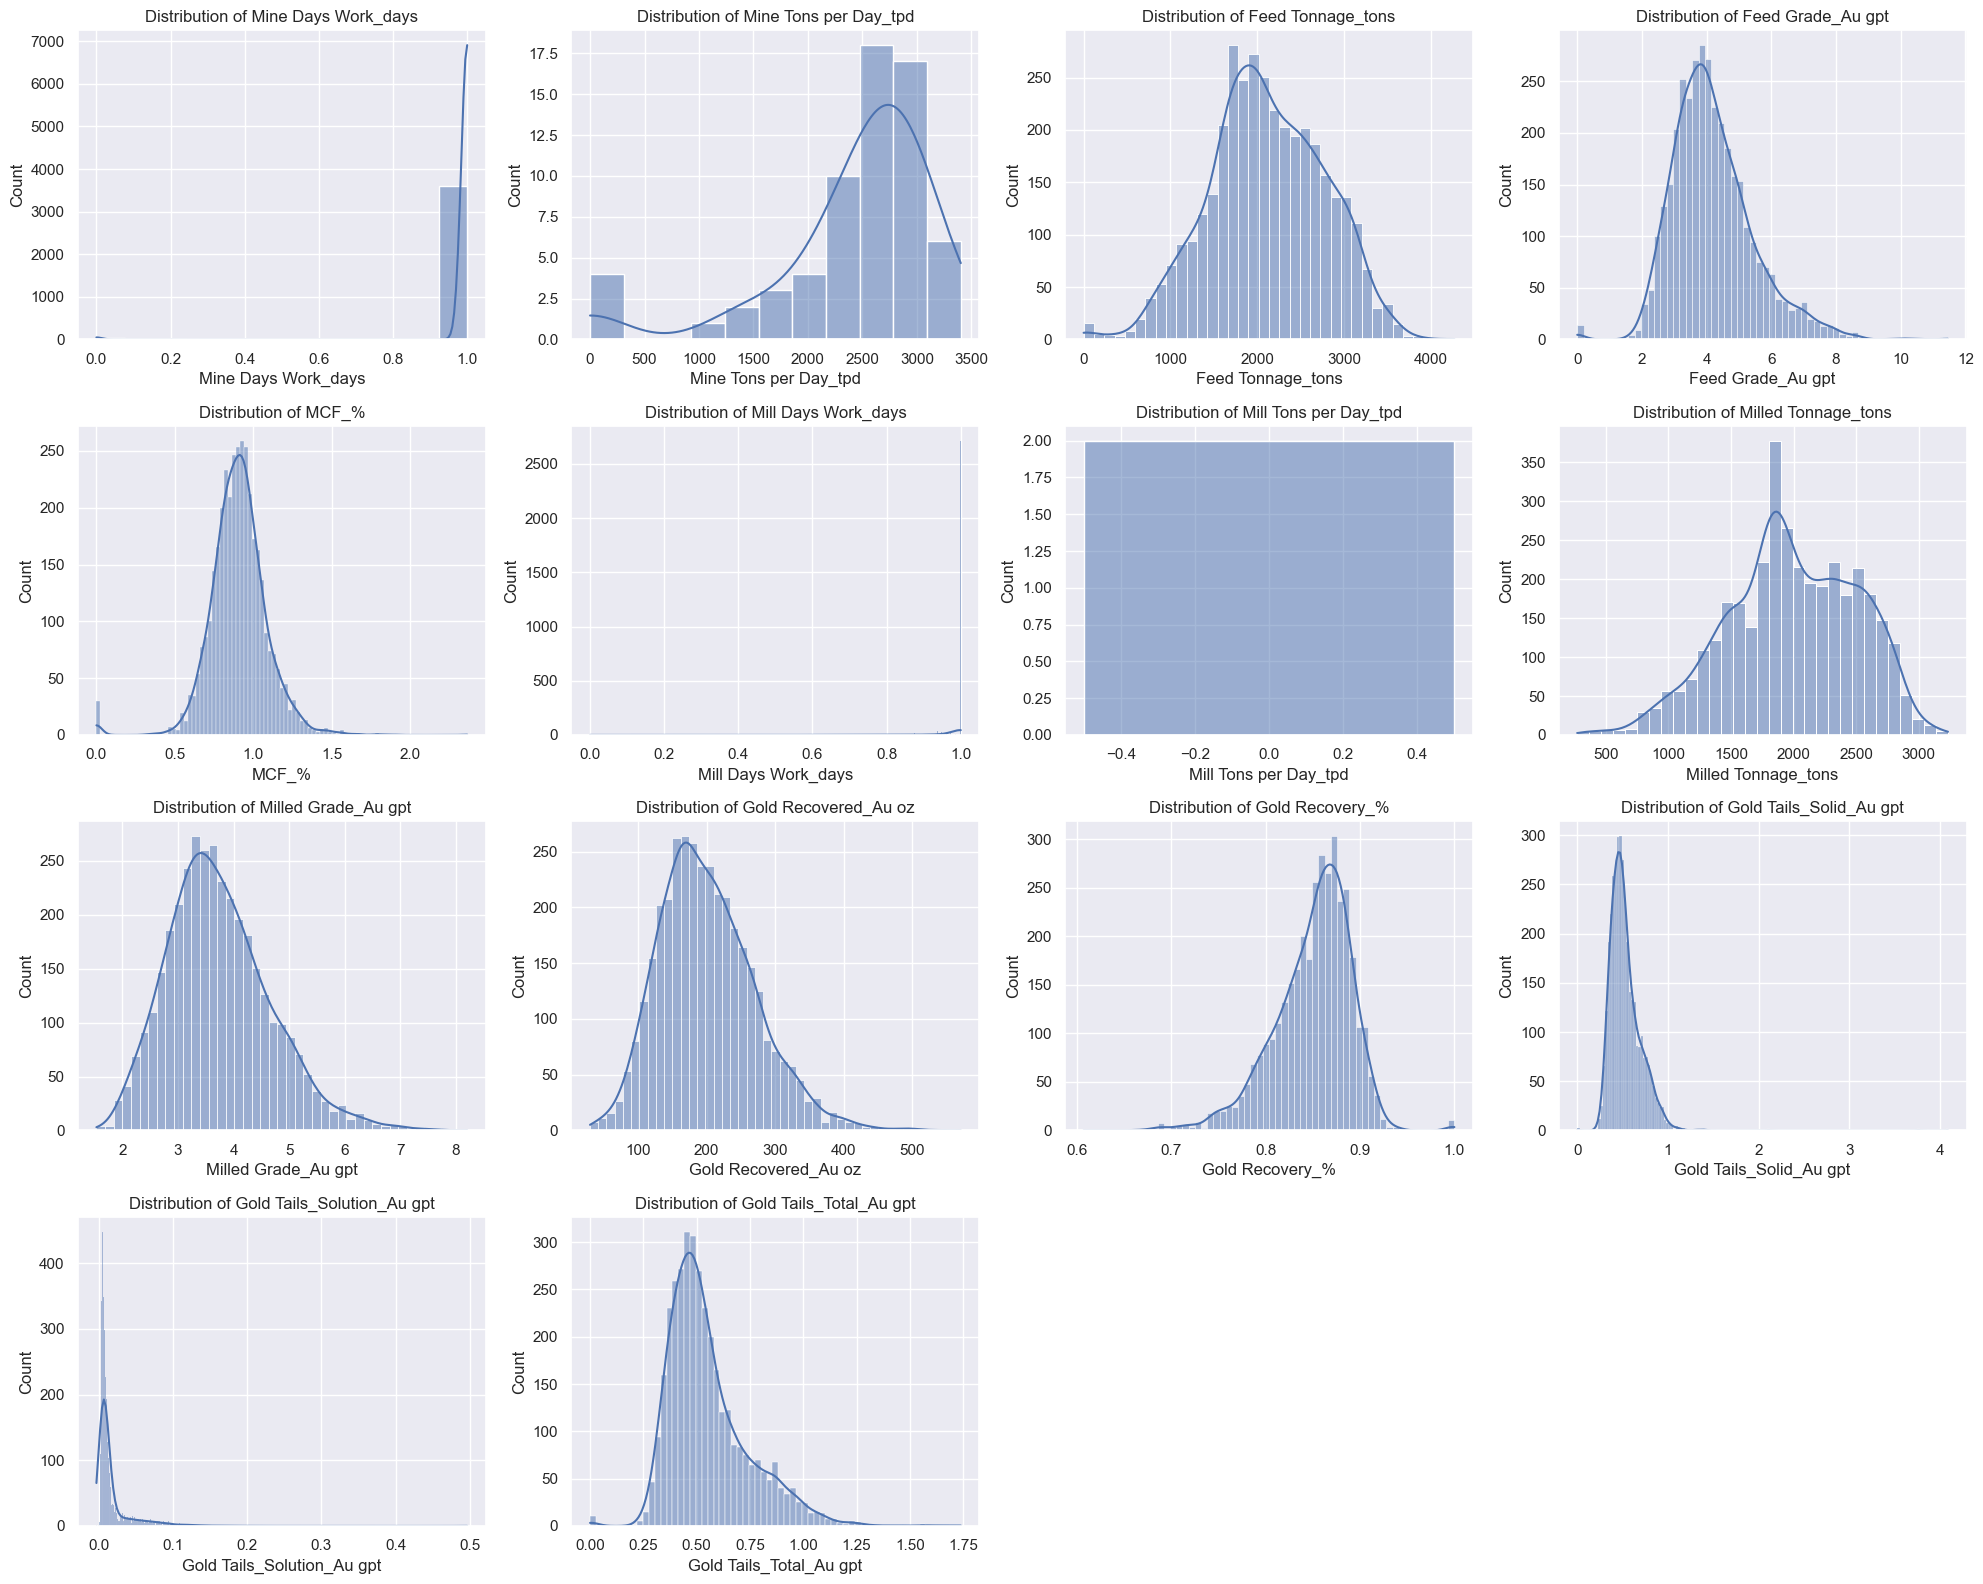


-- Complete Time-Series plots for all numeric columns in Capstone Dataset_MCF.csv --


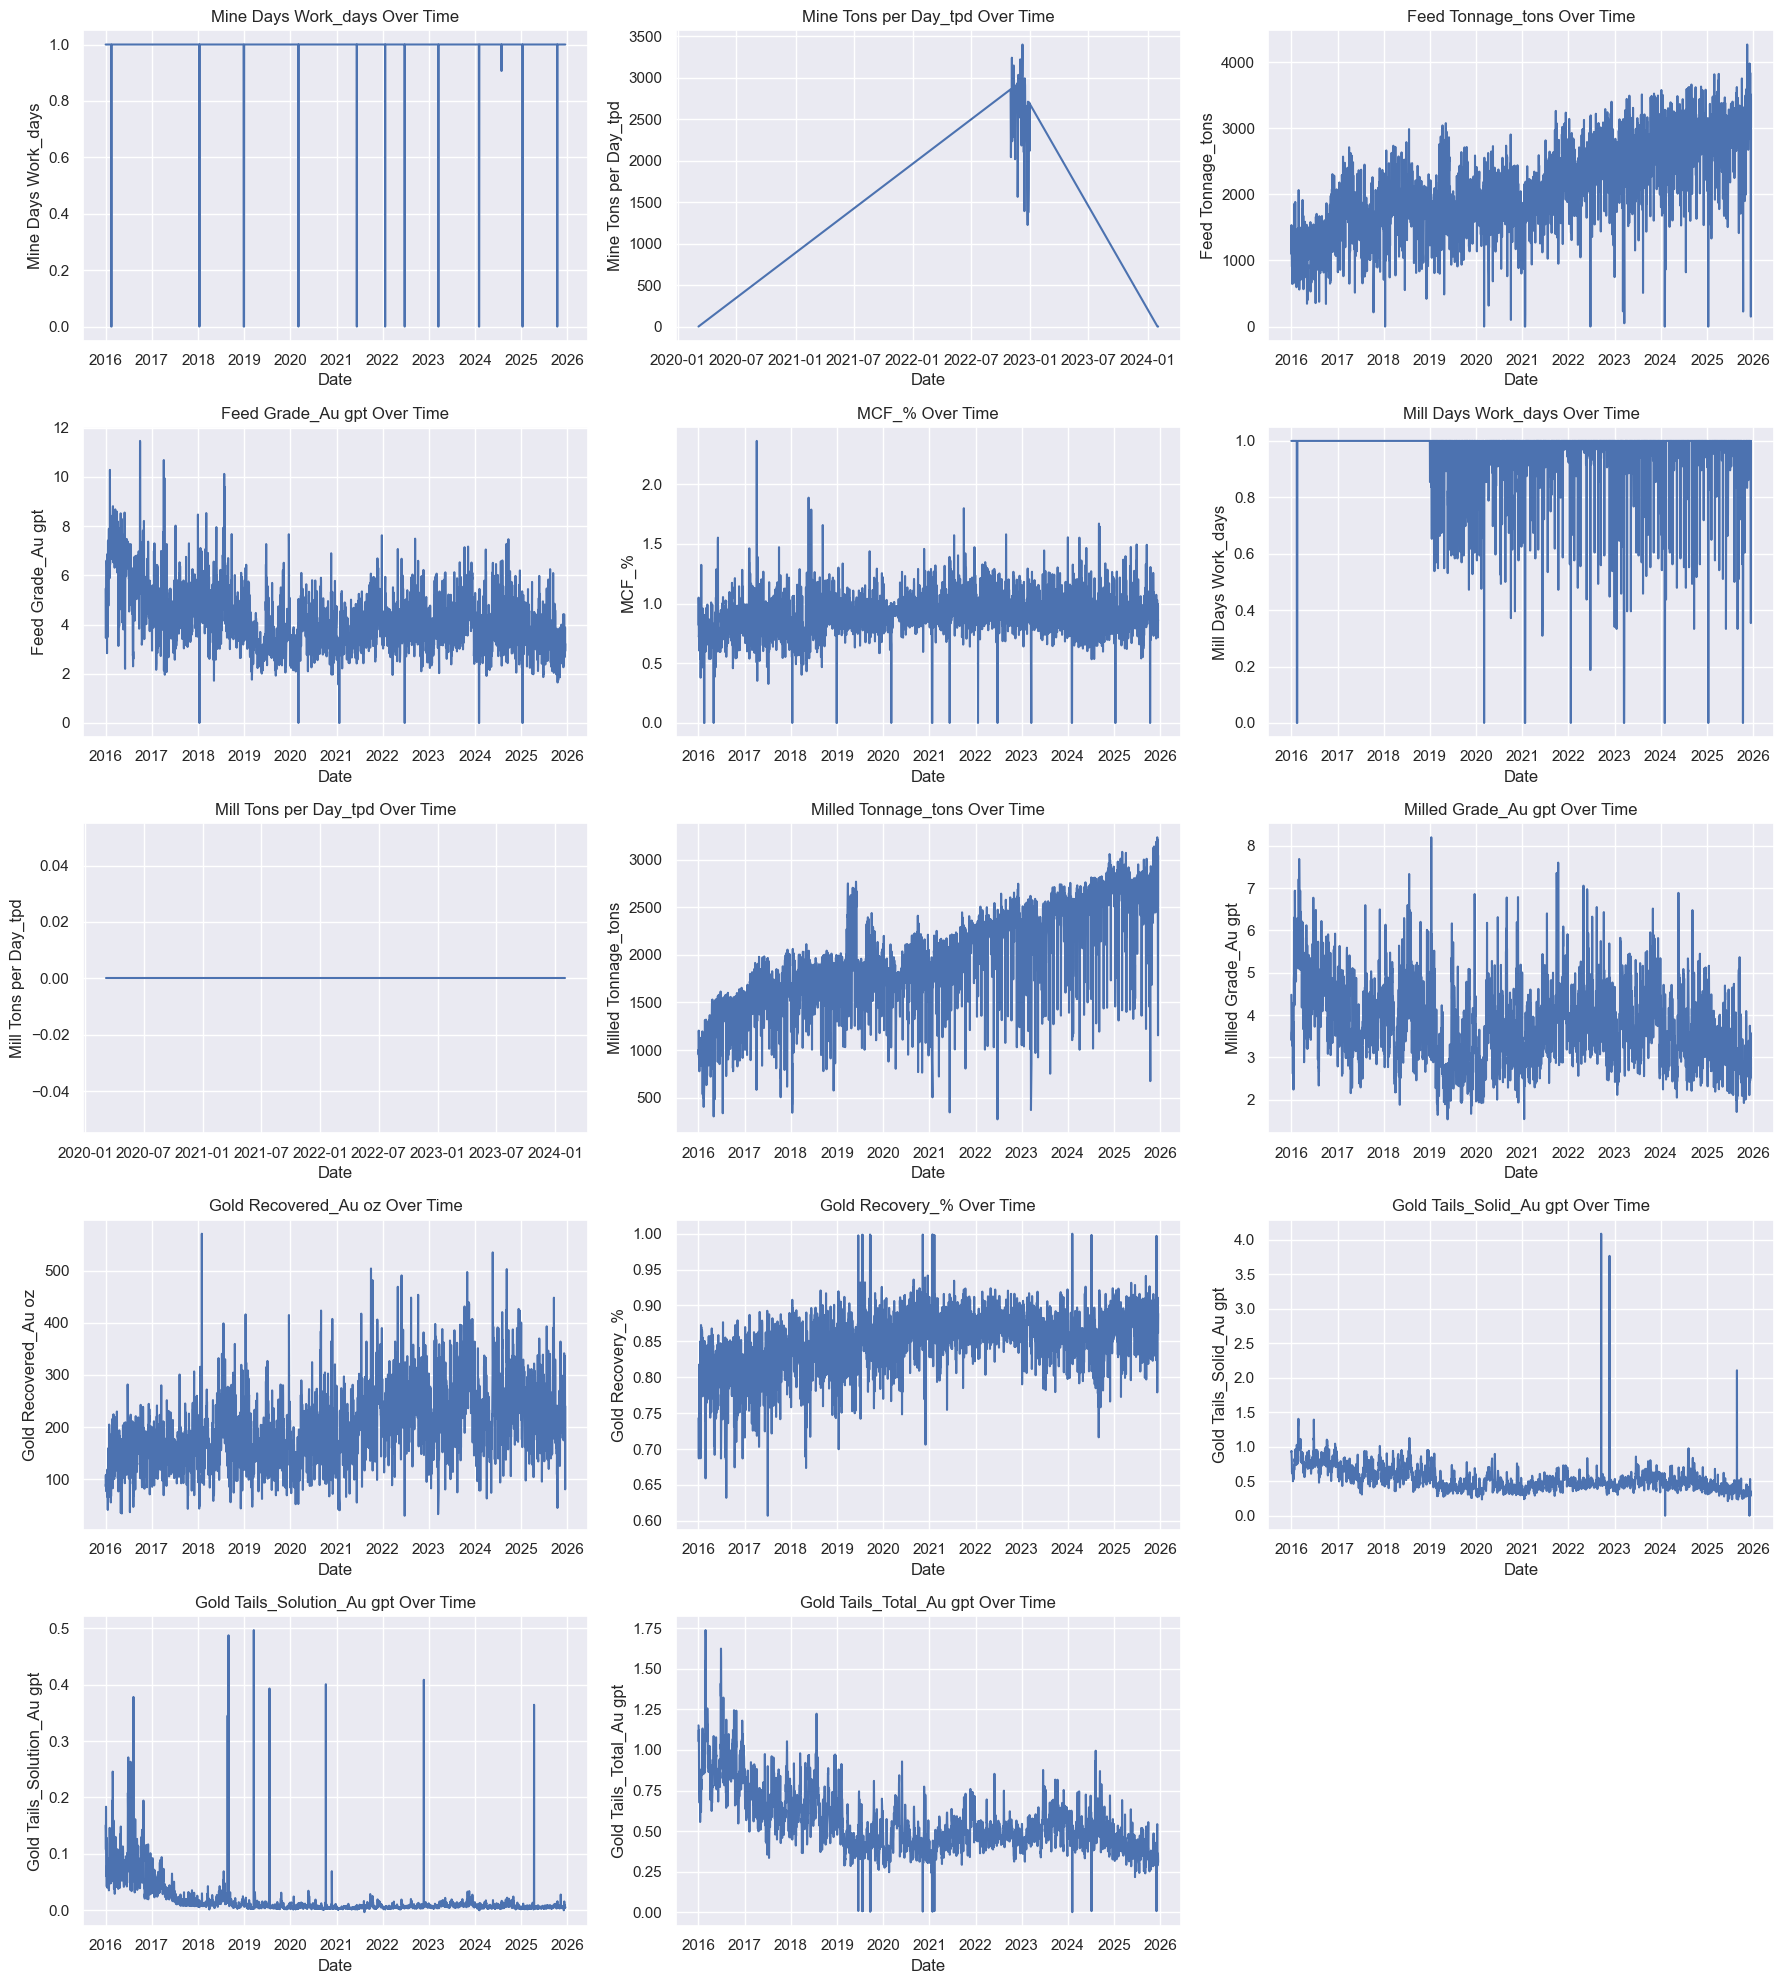


--- Capstone Dataset_Mill Reports.csv ---


Date  Tonnage Processed_tons  Head Grade_Au gpt  \
0 2017-01-01             1447.131601           2.872278   
1 2017-01-02             1344.124696           2.785875   
2 2017-01-03             1002.592880           3.347785   
3 2017-01-04             1387.079263           5.145051   
4 2017-01-05             1512.985124           3.739584   

   Au Tails_Solid_Au gpt  Au Tails_Soln_Au gpt  Au Tails_Total_Au gpt  \
0               0.730127              0.053320               0.805799   
1               0.748133              0.030324               0.791181   
2               0.626316              0.046772               0.694646   
3               0.564481              0.073783               0.669175   
4               0.614178              0.042794               0.678474   

   Au Recovery_%  Au_produced_Gold Recovered_Au oz  \
0       0.719456                         96.145656   
1       0.716003                         86.199863   
2       0.792506                         85.521494   
3       0.869938                        199.604409   
4       0.818570                        148.903315   

   Au_produced_Bullion Produced_Au oz  Head Grade_Ag gpt  Ag Tails_Ag gpt  \
0                                 0.0          17.232193         5.367517   
1                                 0.0          17.318701         7.498074   
2                                 0.0          18.295576         3.462916   
3                                 0.0          27.952984         9.767547   
4                                 0.0          24.414442         6.407232   

   Ag Recovery_%  Ag_produced_Silver Recovered_Ag oz  \
0       0.688518                          552.019810   
1       0.567053                          424.394244   
2       0.810724                          478.117228   
3       0.650572                          810.990491   
4       0.737564                          875.934874   

   Ag_produced_Bullion Produced_Ag oz  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0


-- Data Dictionary for Capstone Dataset_Mill Reports.csv --


Column Name  Non-Null Count       Data Type  \
0                                 Date            3263  datetime64[ns]   
1               Tonnage Processed_tons            3263         float64   
2                    Head Grade_Au gpt            3263         float64   
3                Au Tails_Solid_Au gpt            3263         float64   
4                 Au Tails_Soln_Au gpt            3263         float64   
5                Au Tails_Total_Au gpt            3263         float64   
6                        Au Recovery_%            3263         float64   
7     Au_produced_Gold Recovered_Au oz            3263         float64   
8   Au_produced_Bullion Produced_Au oz            3260         float64   
9                    Head Grade_Ag gpt            3263         float64   
10                     Ag Tails_Ag gpt            3263         float64   
11                       Ag Recovery_%            3263         float64   
12  Ag_produced_Silver Recovered_Ag oz            3263         float64   
13  Ag_produced_Bullion Produced_Ag oz            3260         float64   

      Unit            Min Value            Max Value  \
0     None  2017-01-01 00:00:00  2025-12-15 00:00:00   
1     tons                  0.0          3233.961257   
2   Au gpt                  0.0              8.20053   
3   Au gpt                  0.0             1.128069   
4   Au gpt                  0.0             0.094161   
5   Au gpt                  0.0             1.223503   
6        %                  0.0               0.9865   
7    Au oz                  0.0           535.034623   
8    Au oz                  0.0          1352.196167   
9   Ag gpt                  0.0            51.856411   
10  Ag gpt                  0.0            33.463784   
11       %                  0.0             0.939422   
12   Ag oz                  0.0          3060.283141   
13   Ag oz                  0.0           5812.12332   

                    Average Value  
0   2021-06-22 06:52:37.585044480  
1                     2056.116466  
2                        3.613557  
3                        0.495965  
4                        0.010034  
5                        0.509941  
6                        0.850838  
7                      205.609382  
8                      171.868738  
9                       19.206872  
10                        5.38386  
11                       0.714191  
12                     901.278144  
13                     769.941543


-- Histogram plots for all numeric columns in Capstone Dataset_Mill Reports.csv --


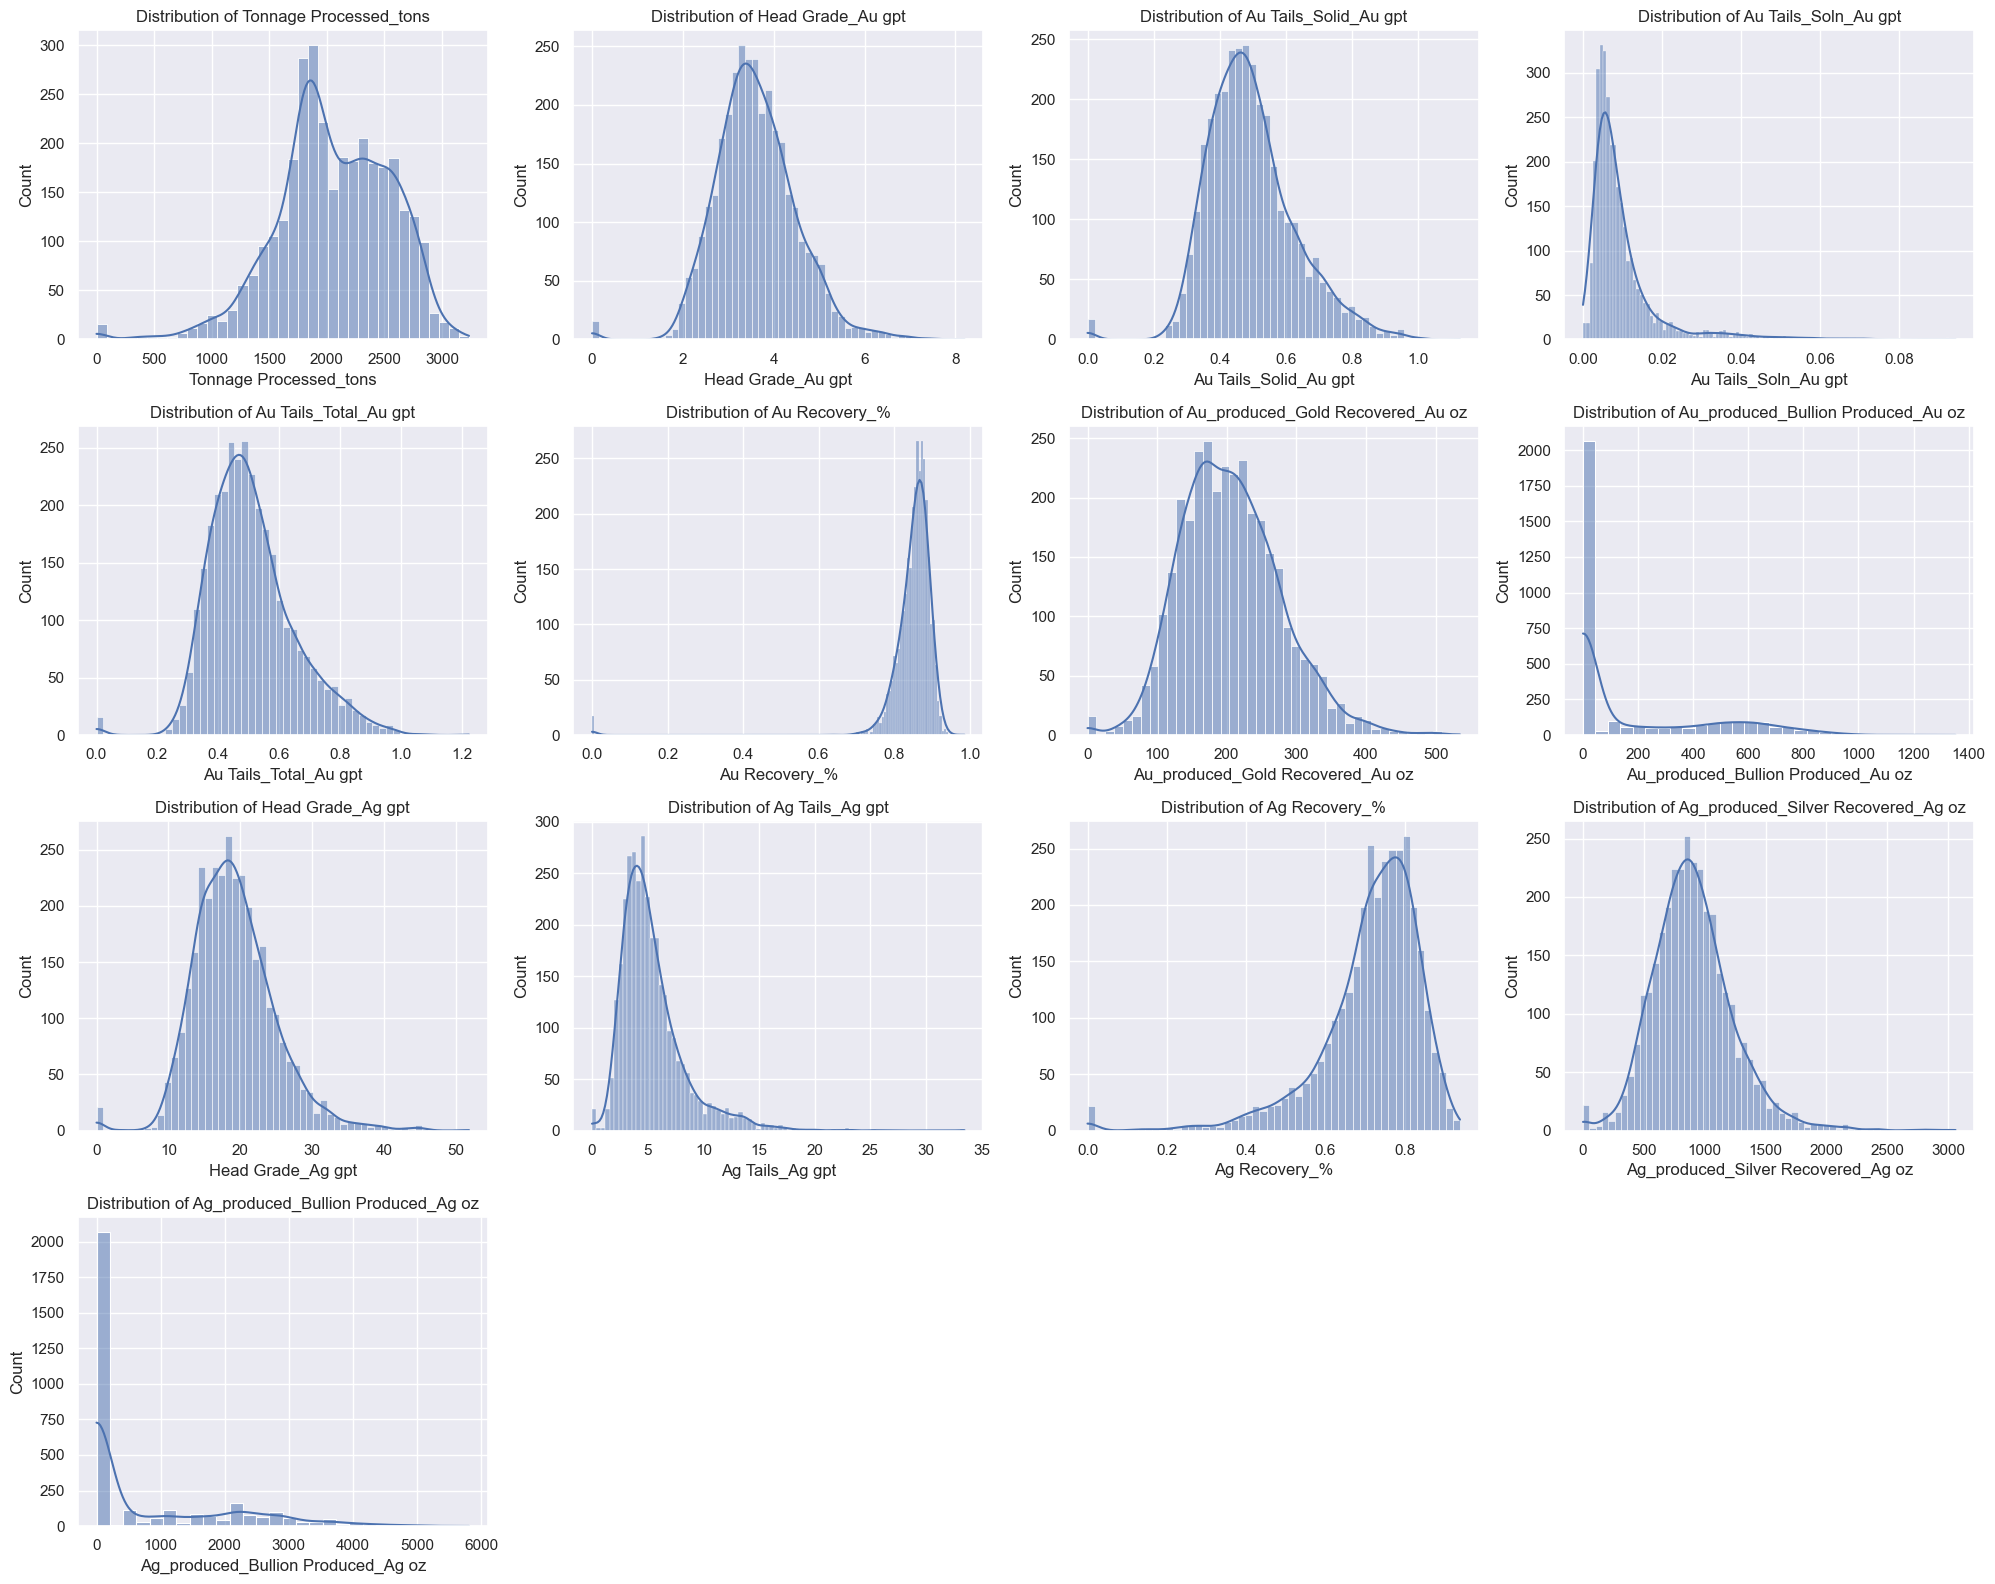


-- Scatter plots for Capstone Dataset_Mill Reports.csv --


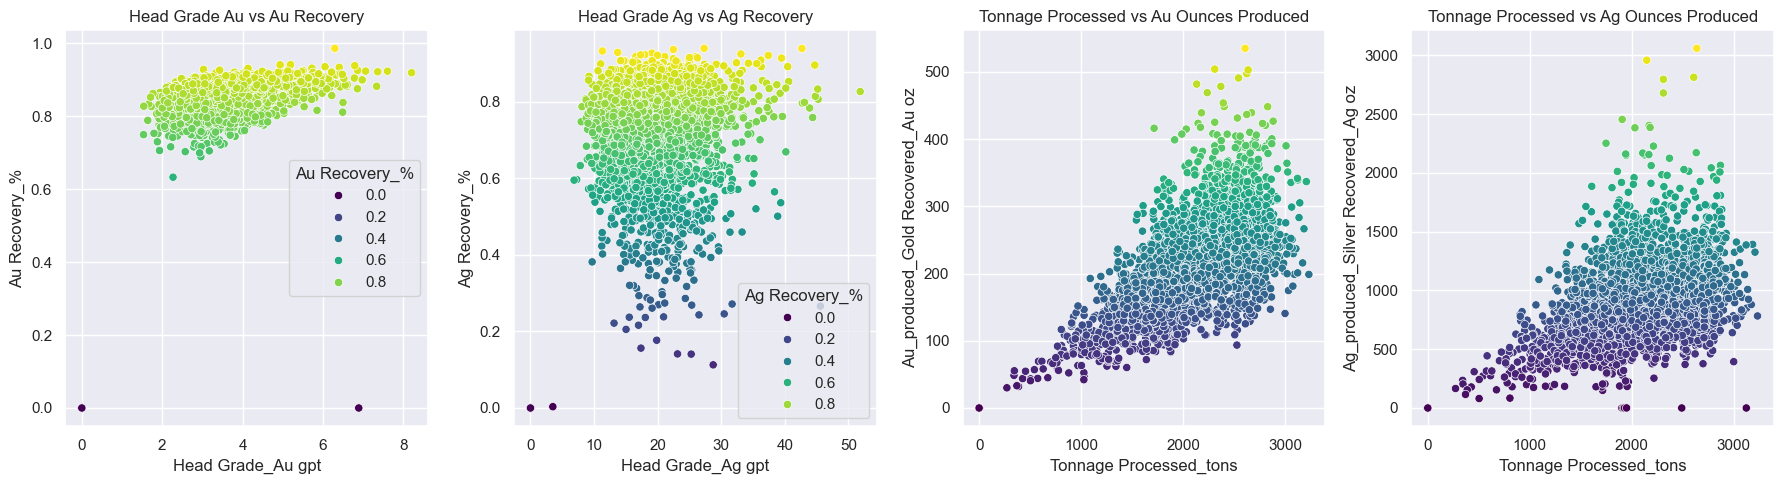


-- Time-Series plots for Capstone Dataset_Mill Reports.csv --


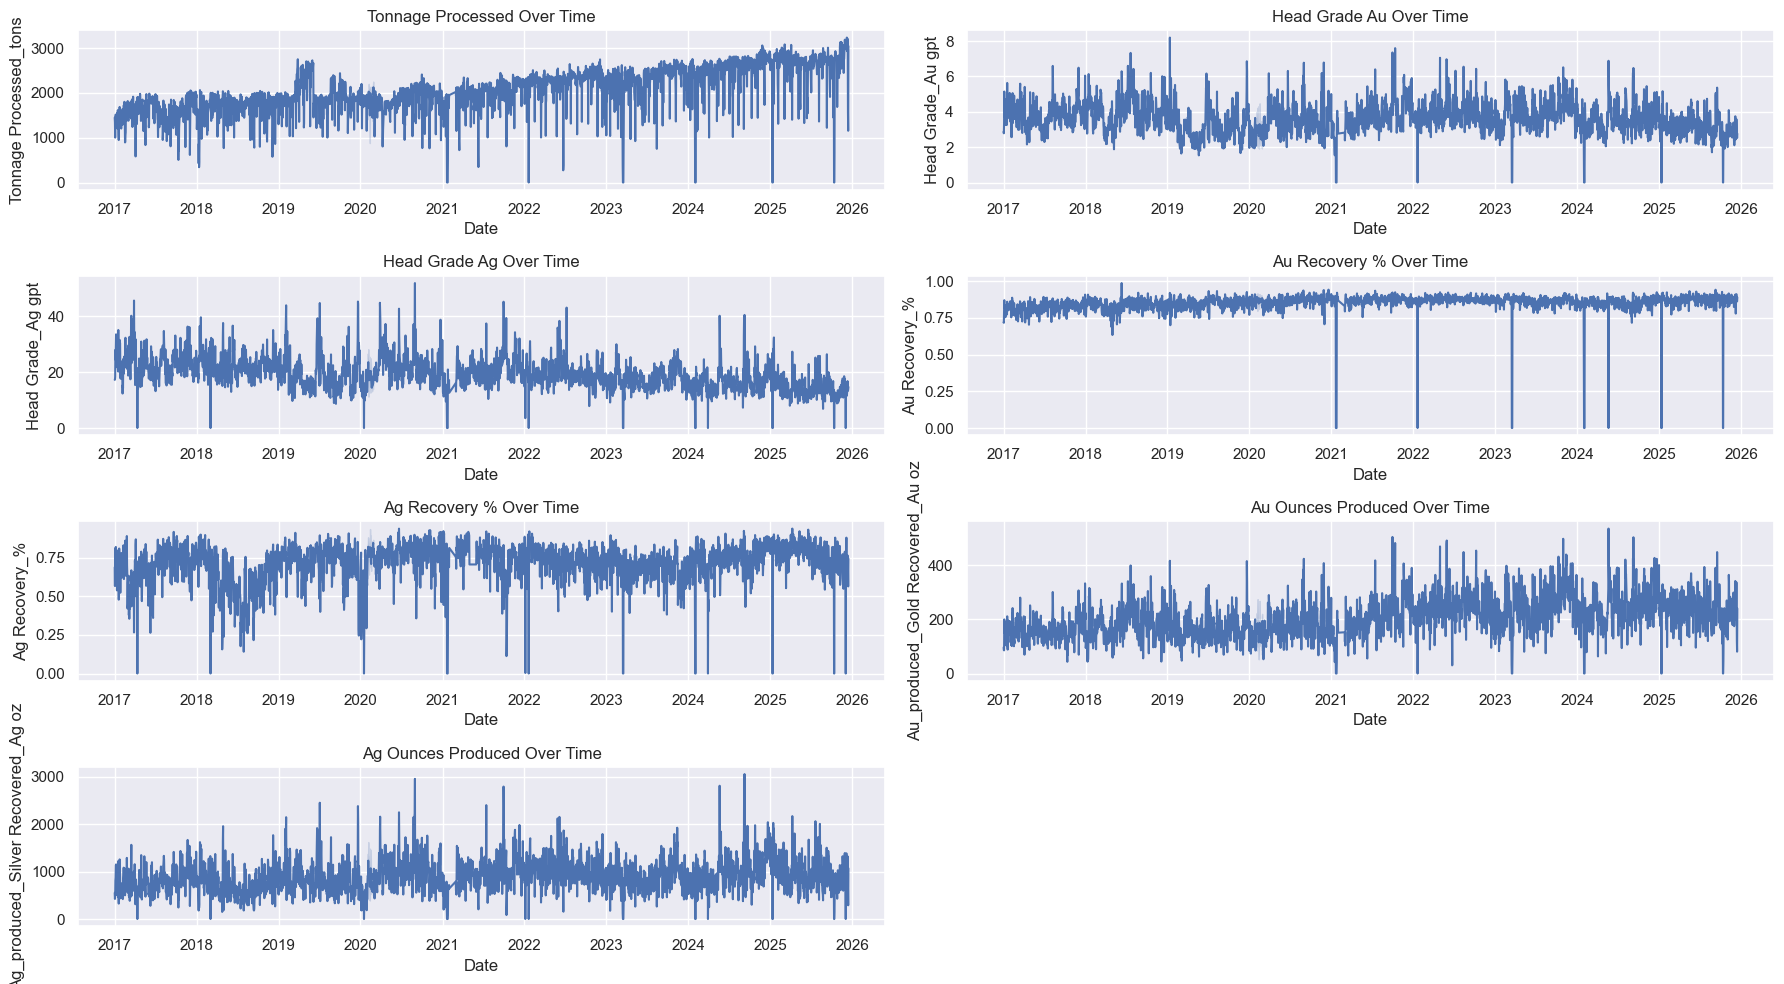


--- Capstone Dataset_Mine Advance.csv ---


Date  Off-Vein_meterage_m  On-Vein_meterage_m
0 2017-01-01                  8.3                 0.0
1 2017-01-02                 17.0                56.9
2 2017-01-03                 13.2                18.5
3 2017-01-04                 13.7                 8.5
4 2017-01-05                 17.5                20.5


-- Data Dictionary for Capstone Dataset_Mine Advance.csv --


Column Name  Non-Null Count       Data Type  Unit  \
0                 Date            3115  datetime64[ns]  None   
1  Off-Vein_meterage_m            3115         float64     m   
2   On-Vein_meterage_m            3115         float64     m   

             Min Value            Max Value                  Average Value  
0  2017-01-01 00:00:00  2025-12-15 00:00:00  2021-06-29 04:39:40.738362624  
1                  0.0                 73.5                       16.69249  
2                  0.0               204.33                      27.385281


-- Histogram plots for Capstone Dataset_Mine Advance.csv --


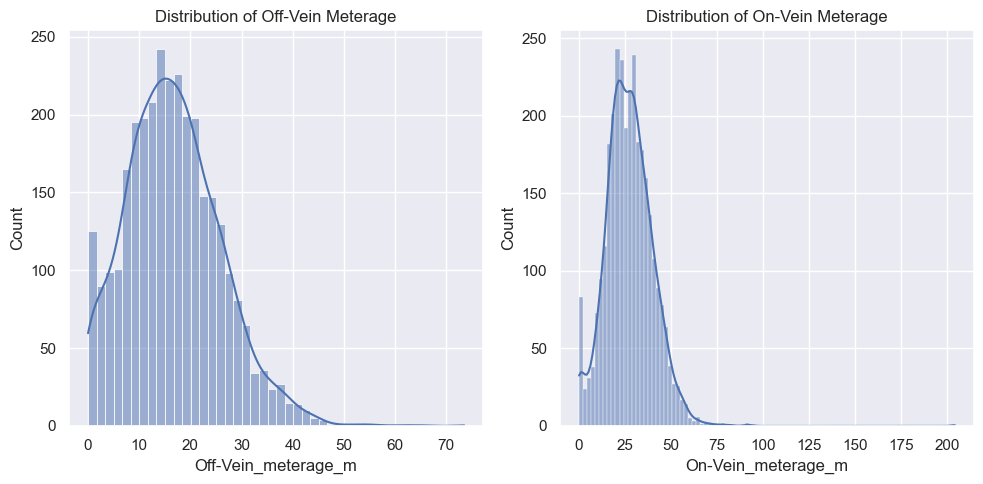


-- Time-Series plots for Capstone Dataset_Mine Advance.csv --


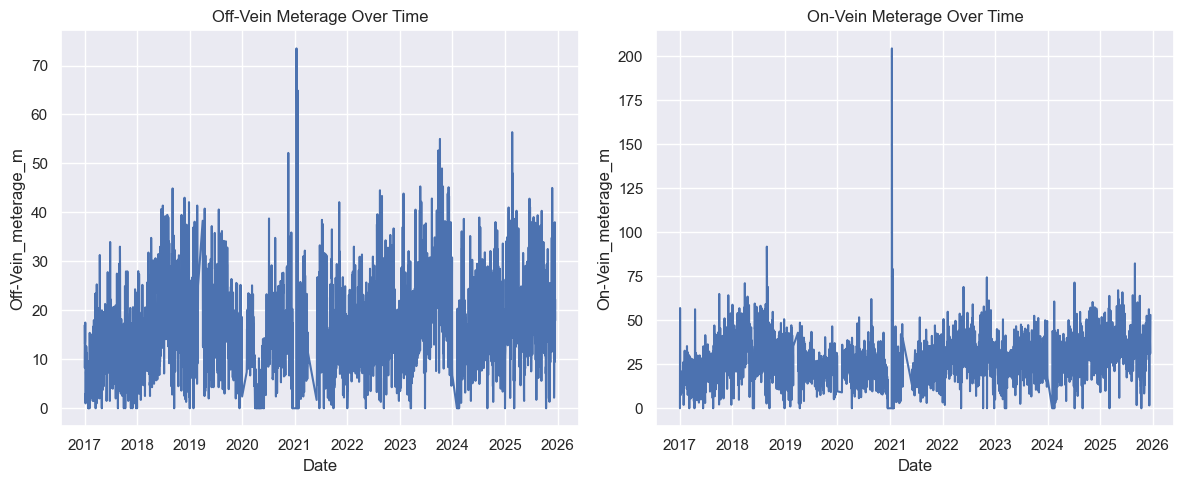


--- Capstone Dataset_Mine Production.csv ---


Date  Mine Tonnage_tons  Mine Grade_Au gpt
0 2017-01-01              910.0               2.89
1 2017-01-02              974.0               4.09
2 2017-01-03             1510.0               5.47
3 2017-01-04             1417.0               8.28
4 2017-01-05             1171.0               5.25


-- Data Dictionary for Capstone Dataset_Mine Production.csv --


Column Name  Non-Null Count       Data Type    Unit  \
0               Date            3225  datetime64[ns]    None   
1  Mine Tonnage_tons            3221         float64    tons   
2  Mine Grade_Au gpt            3221         float64  Au gpt   

             Min Value            Max Value                  Average Value  
0  2017-01-01 00:00:00  2025-12-15 00:00:00  2021-07-02 06:57:29.302325504  
1                  0.0               4288.0                     2128.93541  
2                  0.0                11.06                       4.133498


-- Histogram plots for Capstone Dataset_Mine Production.csv --


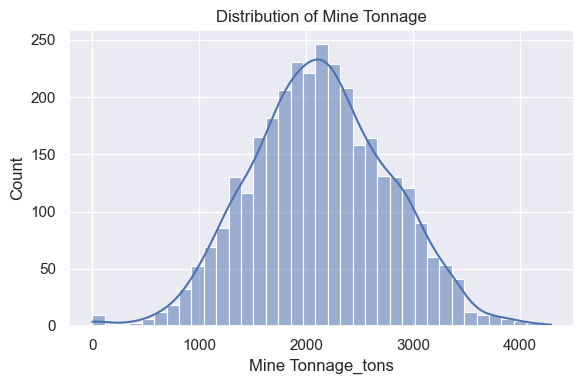


-- Time-Series plots for Capstone Dataset_Mine Production.csv --


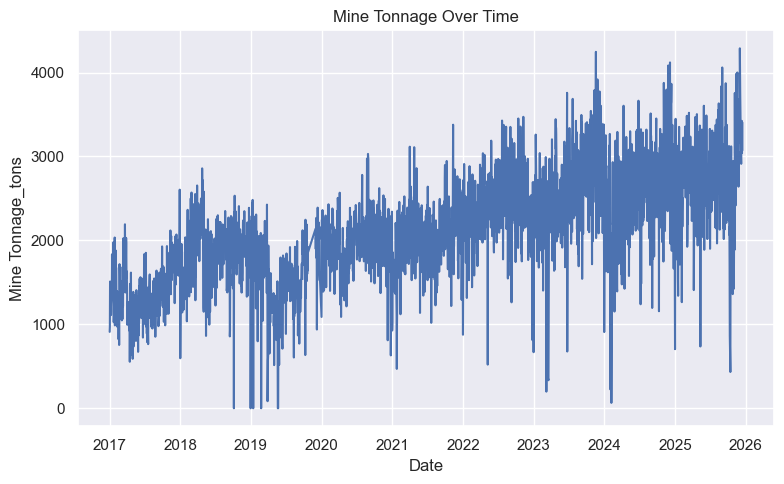

Initial data visualizations generated for all specified dataframes.


In [3]:
df_mcf = pd.read_csv('dataset/Capstone Dataset_MCF.csv') # Load Capstone Dataset_MCF.csv into a DataFrame
df_mill_reports = pd.read_csv('dataset/Capstone Dataset_Mill Reports.csv') # Load Capstone Dataset_Mill Reports.csv into a DataFrame
df_mine_advance = pd.read_csv('dataset/Capstone Dataset_Mine Advance.csv') # Load Capstone Dataset_Mine Advance.csv into a DataFrame
df_mine_production = pd.read_csv('dataset/Capstone Dataset_Mine Production.csv') # Load Capstone Dataset_Mine Production.csv into a DataFrame

# Convert 'Date' columns to datetime objects for all DataFrames
df_mcf['Date'] = pd.to_datetime(df_mcf['Date']) # Convert 'Date' column inside the df_mcf dataframe to datetime
df_mill_reports['Date'] = pd.to_datetime(df_mill_reports['Date']) # Convert 'Date' column in df_mill_reports dataframe to datetime
df_mine_advance['Date'] = pd.to_datetime(df_mine_advance['Date']) # Convert 'Date' column in df_mine_advance dataframe to datetime
df_mine_production['Date'] = pd.to_datetime(df_mine_production['Date'], format='%d-%b-%y') # Convert 'Date' column in df_mine_production with explicit format

'''
# Cap outliers using the z-score method for all numeric columns in each dataframe
def cap_outliers_zscore(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    capped_counts = {}
    for col in numeric_cols:
        mean = df[col].mean()
        std = df[col].std()
        if std == 0:
            capped_counts[col] = 0
            continue  # Avoid division by zero
        lower = mean - threshold * std
        upper = mean + threshold * std
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        capped_counts[col] = outliers
        df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))
    return capped_counts


# Apply to each dataframe in place and collect capped outlier counts
capped_counts_mcf = cap_outliers_zscore(df_mcf)
capped_counts_mill_reports = cap_outliers_zscore(df_mill_reports)
capped_counts_mine_production = cap_outliers_zscore(df_mine_production)
capped_counts_mine_advance = cap_outliers_zscore(df_mine_advance)

print("Outliers capped using z-score method for all specified dataframes.")
print("\nCapped outlier counts per column:")
print("df_mcf:", capped_counts_mcf)
print("df_mill_reports:", capped_counts_mill_reports)
print("df_mine_production:", capped_counts_mine_production)
print("df_mine_advance:", capped_counts_mine_advance)
'''


sns.set_context('notebook') # Set seaborn context for better visualization aesthetics
sns.set_theme(style="darkgrid")

print("\n--- Capstone Dataset_MCF.csv ---") # Print header for df_mcf output
display(df_mcf.head()) # Display the first 5 rows of df_mcf
print("\n-- Data Dictionary for Capstone Dataset_MCF.csv --") # Print data dictionary for df_mcf output
display(create_dataframe_summary(df_mcf)) # Display the summary of df_mcf, we use the created custome function create_dataframe_summary

# Visualizations for df_mcf (selected key features)
print("\n-- Histogram plots for all numeric columns in Capstone Dataset_MCF.csv --")
numeric_cols = df_mcf.select_dtypes(include=[np.number]).columns
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df_mcf[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Time-series plots for all numeric columns in df_mcf
print("\n-- Complete Time-Series plots for all numeric columns in Capstone Dataset_MCF.csv --")
numeric_cols = df_mcf.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.lineplot(x='Date', y=col, data=df_mcf)
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


print("\n--- Capstone Dataset_Mill Reports.csv ---") # Print header for df_mill_reports output
display(df_mill_reports.head()) # Display the first 5 rows of df_mill_reports
print("\n-- Data Dictionary for Capstone Dataset_Mill Reports.csv --") # Print data dictionary for df_mill_reports output
display(create_dataframe_summary(df_mill_reports)) # Display the summary of df_mill_reports

# Visualizations for df_mill_reports (all numeric columns)
print("\n-- Histogram plots for all numeric columns in Capstone Dataset_Mill Reports.csv --")
numeric_cols = df_mill_reports.select_dtypes(include=[np.number]).columns
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df_mill_reports[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

print("\n-- Scatter plots for Capstone Dataset_Mill Reports.csv --")
plt.figure(figsize=(18, 5)) # Create a figure for scatter plots
plt.subplot(1, 4, 1) # Create a subplot in a 1x4 grid, position 1
sns.scatterplot(x='Head Grade_Au gpt', y='Au Recovery_%', data=df_mill_reports, hue='Au Recovery_%', palette='viridis') # Plot scatter plot of Au Grade vs Au Recovery
plt.title('Head Grade Au vs Au Recovery') # Set title for the subplot
plt.subplot(1, 4, 2) # Create a subplot in a 1x4 grid, position 2
sns.scatterplot(x='Head Grade_Ag gpt', y='Ag Recovery_%', data=df_mill_reports, hue='Ag Recovery_%', palette='viridis') # Plot scatter plot of Ag Grade vs Ag Recovery
plt.title('Head Grade Ag vs Ag Recovery') # Set title for the subplot
plt.subplot(1, 4, 3) # Create a subplot in a 1x4 grid, position 3
sns.scatterplot(x='Tonnage Processed_tons', y='Au_produced_Gold Recovered_Au oz', data=df_mill_reports, hue='Au_produced_Gold Recovered_Au oz', palette='viridis', legend=False) # Plot scatter plot of Tonnage vs Au Ounces
plt.title('Tonnage Processed vs Au Ounces Produced') # Set title for the subplot
plt.subplot(1, 4, 4) # Create a subplot in a 1x4 grid, position 4
sns.scatterplot(x='Tonnage Processed_tons', y='Ag_produced_Silver Recovered_Ag oz', data=df_mill_reports, hue='Ag_produced_Silver Recovered_Ag oz', palette='viridis', legend=False) # Plot scatter plot of Tonnage vs Ag Ounces
plt.title('Tonnage Processed vs Ag Ounces Produced') # Set title for the subplot
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure

# Time-series plots for df_mill_reports
print("\n-- Time-Series plots for Capstone Dataset_Mill Reports.csv --")
plt.figure(figsize=(18, 10)) # Create a new figure for time-series plots
plt.subplot(4, 2, 1) # Create a subplot in a 2x4 grid, position 1
sns.lineplot(x='Date', y='Tonnage Processed_tons', data=df_mill_reports) # Plot line chart of 'Tonnage Processed_tons' over 'Date'
plt.title('Tonnage Processed Over Time') # Set title for the subplot
plt.subplot(4, 2, 2) # Create a subplot in a 2x4 grid, position 2
sns.lineplot(x='Date', y='Head Grade_Au gpt', data=df_mill_reports) # Plot line chart of 'Head Grade_Au gpt' over 'Date'
plt.title('Head Grade Au Over Time') # Set title for the subplot
plt.subplot(4, 2, 3) # Create a subplot in a 2x4 grid, position 3
sns.lineplot(x='Date', y='Head Grade_Ag gpt', data=df_mill_reports) # Plot line chart of 'Head Grade_Ag gpt' over 'Date'
plt.title('Head Grade Ag Over Time') # Set title for the subplot
plt.subplot(4, 2, 4) # Create a subplot in a 2x4 grid, position 4
sns.lineplot(x='Date', y='Au Recovery_%', data=df_mill_reports) # Plot line chart of 'Au Recovery_%' over 'Date'
plt.title('Au Recovery % Over Time') # Set title for the subplot
plt.subplot(4, 2, 5) # Create a subplot in a 2x4 grid, position 5
sns.lineplot(x='Date', y='Ag Recovery_%', data=df_mill_reports) # Plot line chart of 'Ag Recovery_%' over 'Date'
plt.title('Ag Recovery % Over Time') # Set title for the subplot
plt.subplot(4, 2, 6) # Create a subplot in a 2x4 grid, position 6
sns.lineplot(x='Date', y='Au_produced_Gold Recovered_Au oz', data=df_mill_reports) # Plot line chart of 'Au_produced_Gold Recovered_Au oz' over 'Date'
plt.title('Au Ounces Produced Over Time') # Set title for the subplot
plt.subplot(4, 2, 7) # Create a subplot in a 2x4 grid, position 7
sns.lineplot(x='Date', y='Ag_produced_Silver Recovered_Ag oz', data=df_mill_reports) # Plot line chart of 'Ag_produced_Silver Recovered_Ag oz' over 'Date'
plt.title('Ag Ounces Produced Over Time') # Set title for the subplot
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure


print("\n--- Capstone Dataset_Mine Advance.csv ---") # Print header for df_mine_advance output
display(df_mine_advance.head()) # Display the first 5 rows of df_mine_advance
print("\n-- Data Dictionary for Capstone Dataset_Mine Advance.csv --") # Print data dictionary for df_mine_advance output
display(create_dataframe_summary(df_mine_advance)) # Display the summary of df_mine_advance

# Visualizations for df_mine_advance (mine tonnage prediction features)
print("\n-- Histogram plots for Capstone Dataset_Mine Advance.csv --")
plt.figure(figsize=(10, 5)) # Create a figure for histograms
plt.subplot(1, 2, 1) # Create a subplot in a 1x2 grid, position 1
sns.histplot(df_mine_advance['Off-Vein_meterage_m'].dropna(), kde=True) # Plot histogram of 'Off-Vein_meterage_m'
plt.title('Distribution of Off-Vein Meterage') # Set title for the subplot
plt.subplot(1, 2, 2) # Create a subplot in a 1x2 grid, position 2
sns.histplot(df_mine_advance['On-Vein_meterage_m'].dropna(), kde=True) # Plot histogram of 'On-Vein_meterage_m'
plt.title('Distribution of On-Vein Meterage') # Set title for the subplot
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure

# Time-series plots for df_mine_advance
print("\n-- Time-Series plots for Capstone Dataset_Mine Advance.csv --")
plt.figure(figsize=(12, 5)) # Create a new figure for time-series plots
plt.subplot(1, 2, 1) # Create a subplot in a 1x2 grid, position 1
sns.lineplot(x='Date', y='Off-Vein_meterage_m', data=df_mine_advance) # Plot line chart of 'Off-Vein_meterage_m' over 'Date'
plt.title('Off-Vein Meterage Over Time') # Set title for the subplot
plt.subplot(1, 2, 2) # Create a subplot in a 1x2 grid, position 2
sns.lineplot(x='Date', y='On-Vein_meterage_m', data=df_mine_advance) # Plot line chart of 'On-Vein_meterage_m' over 'Date'
plt.title('On-Vein Meterage Over Time') # Set title for the subplot
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure


print("\n--- Capstone Dataset_Mine Production.csv ---") # Print header for df_mine_production output
display(df_mine_production.head()) # Display the first 5 rows of df_mine_production
print("\n-- Data Dictionary for Capstone Dataset_Mine Production.csv --") # Print data dictionary for df_mine_advance output
display(create_dataframe_summary(df_mine_production)) # Display the summary of df_mine_production

# Visualizations for df_mine_production (mine tonnage target)
print("\n-- Histogram plots for Capstone Dataset_Mine Production.csv --")
plt.figure(figsize=(6, 4)) # Create a figure for histograms
sns.histplot(df_mine_production['Mine Tonnage_tons'].dropna(), kde=True) # Plot histogram of 'Mine Tonnage_tons'
plt.title('Distribution of Mine Tonnage') # Set title for the plot
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure

# Time-series plots for df_mine_production
print("\n-- Time-Series plots for Capstone Dataset_Mine Production.csv --")
plt.figure(figsize=(8, 5)) # Create a new figure for time-series plot
sns.lineplot(x='Date', y='Mine Tonnage_tons', data=df_mine_production) # Plot line chart of 'Mine Tonnage_tons' over 'Date'
plt.title('Mine Tonnage Over Time') # Set title for the plot
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure

print("Initial data visualizations generated for all specified dataframes.") # Print completion message

### Identification of Target and Predictor Variables in DataFrames

With the established goals of the capstone aligning with the company's requirements to predict key performance indicators such as Gold/Silver throughput, and Gold/Silver recovery using pre-set operating parameters like Processed Tonnage and Au/Ag grades.

Similarly, the available dataset for Mine Tonnage prediction was also pre-set using underground meterage advances 'On-Vein' and 'Off-Vein' metrics which are historically recorded.

This means that the expected predictor variables are already set prior to this analysis as these would be parameters being used as input for the prediction models.

Based on the inspection from the previous code blocks' outputs for each DataFrame, here's a breakdown of where the required variables for both prediction tasks are located:

**1. Gold and Silver Recovery and Ounces Produced Prediction:**
   - **Predictors:**
     - `'Head Grade_Au gpt'`: Found in `df_mill_reports`.
     - `'Head Grade_Ag gpt'`: Found in `df_mill_reports`.
     - `'Tonnage Processed_tons'`: Found in `df_mill_reports`.
   - **Targets:**
     - `'Gold Recovery'`: Corresponds to `'Au Recovery_%'` in `df_mill_reports`.
     - `'Gold Ounces Produced'`: Corresponds to `'Au_produced_Gold Recovered_Au oz'` in `df_mill_reports`.
     - `'Silver Recovery'`: Corresponds to `'Ag Recovery_%'` in `df_mill_reports`.
     - `'Silver Ounces Produced'`: Corresponds to `'Ag_produced_Silver Recovered_Ag oz'` in `df_mill_reports`.

   *Summary for Gold/Silver Prediction*: All necessary predictor and target variables for gold and silver prediction are situated within the `df_mill_reports` DataFrame. The `df_mcf` DataFrame also contains similar gold-related columns (`Feed Grade_Au gpt`, `Feed Tonnage_tons`, `Gold Recovery_%`, `Gold Recovered_Au oz`), but `df_mill_reports` specifically contains silver-related data and uses column names that directly match or are very close to the task description. `df_mcf` Dataframe supposedly contains a complete dataset for this activity, but the mill_reports dataframe contains the most updated dataset coming from the mill division itself, so we elect to use the data within for the analysis. The data from `df_mcf` Dataframe will be used to cross-check the predictions coming forth from `df_mill_reports` Dataframe.

**2. Mine Tonnage Prediction:**
   - **Predictors:**
     - `'Off-Vein_meterage_m'`: Found in `df_mine_advance`.
     - `'On-Vein_meterage_m'`: Found in `df_mine_advance`.
     - `'Total_Meterage_m'`: This column is not explicitly present but can be easily calculated as the sum of `'Off-Vein_meterage_m'` and `'On-Vein_meterage_m'` from `df_mine_advance`.
   - **Target:**
     - `'Mine Tonnage_tons'`: Found in `df_mine_production`.

   *Summary for Mine Tonnage Prediction*: The predictors are in `df_mine_advance`, and the target is in `df_mine_production`. These two DataFrames will need to be merged (on their 'Date' column) to perform this prediction task.

## Step 3 - Data Preprocessing, Applied EDA & Feature Engineering

Substep/s:
1. Clean data: Handle nulls, duplicates and outliers.
    * Due to the the dataset coming straight from a Relational Database, most of the data-cleaning related problems such as duplicates are minimized.
    * Nulls were dropped and no longer undergone imputation because for mines, Null is normally treated as Zero values except for grades.
2. Engineer features: Scaling, encoding, binning and domain-derived features.
    * Feature scaling was placed within Step 4 - Model Implementation builtin to a Pipeline.
3. Applied EDA: Distributions, relationships, clustering tendency (if unsupervised).
    * Clustering was considered as a non-essential step for this project since only prediction mattered.  
4. Feature importance & explainability: SHAP, LIME, or model-based importances.
    * SHAP was used after the training of the model to explain feature importance.
5. Feature selection: At least one approach (filter, wrapper, or embedded).
    * Selected features were already pre-determined based on the requirements of the company for its prediction requirements, although in the summary portion, suggestions and recommendations were made to add or record potential features that can improve model performance and predictive power.
6. Dimensionality reduction: PCA (and t-SNE/UMAP for visualisation if needed).
    * Dimensionality reduction was also not longer considered due to the fixed amount of input variables that were preset.

In [4]:
# 1. Identify the relevant DataFrame, df_mill_reports, and create a copy
df_gold_silver = df_mill_reports.copy()
df_gold_silver['Date'] = pd.to_datetime(df_gold_silver['Date'])

# 2. Define the list of predictor columns
predictor_cols = ['Head Grade_Au gpt', 'Head Grade_Ag gpt', 'Tonnage Processed_tons']

# 3. Define a dictionary of target variables
target_variables = {
    'Gold Recovery': 'Au Recovery_%',
    'Gold Ounces Produced': 'Au_produced_Gold Recovered_Au oz',
    'Silver Recovery': 'Ag Recovery_%',
    'Silver Ounces Produced': 'Ag_produced_Silver Recovered_Ag oz'
}

# 4. Check for and confirm the absence of missing values in the selected predictor and target columns.
# Combine all relevant columns for missing value check
all_relevant_cols = predictor_cols + list(target_variables.values())
missing_values_check = df_gold_silver[all_relevant_cols].isnull().sum()

print("Missing values in selected predictor and target columns:")
print(missing_values_check)

# Based on the previous df_mill_reports.info() output, these columns have no missing values.
# If there were missing values, a strategy like df_gold_silver.dropna(subset=all_relevant_cols, inplace=True)
# or imputation would be applied here. For now, no action is needed as counts are 0.

# 5. We create and initialize an empty dictionary to store the training and testing sets
gold_silver_data_splits = {}

# 6. For each target variable in the dictionary:
for target_name, target_col in target_variables.items():
    # a. Create the feature set X
    X = df_gold_silver[predictor_cols]

    # b. Create the target set y
    y = df_gold_silver[target_col]

    # c. Split X and y into training and testing sets, we create an 80-20 split for Train and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # d. Store these sets within the gold_silver_data_splits dictionary
    gold_silver_data_splits[target_name] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

    print(f"\nData split for {target_name}:")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    # --- Prepare train-test splits for Mine Tonnage prediction ---

    # 1. Identify relevant DataFrames
    df_mine_advance_copy = df_mine_advance.copy()
    df_mine_production_copy = df_mine_production.copy()

    # 2. Create 'Total_Meterage_m' as sum of 'Off-Vein_meterage_m' and 'On-Vein_meterage_m'
    df_mine_advance_copy['Total_Meterage_m'] = (
        df_mine_advance_copy['Off-Vein_meterage_m'] + df_mine_advance_copy['On-Vein_meterage_m']
    )

    # 3. Merge mine advance and production DataFrames on 'Date'
    df_mine_merged = pd.merge(
        df_mine_advance_copy[['Date', 'Off-Vein_meterage_m', 'On-Vein_meterage_m', 'Total_Meterage_m']],
        df_mine_production_copy[['Date', 'Mine Tonnage_tons']],
        on='Date',
        how='inner'
    )

    # 4. Define predictors and target
    mine_predictor_cols = ['Off-Vein_meterage_m', 'On-Vein_meterage_m', 'Total_Meterage_m']
    mine_target_col = 'Mine Tonnage_tons'

    # 5. Check for missing values
    missing_mine = df_mine_merged[mine_predictor_cols + [mine_target_col]].isnull().sum()
    print("\nMissing values in Mine Tonnage predictors/target:")
    print(missing_mine)

    # 6. Drop rows with missing values if any
    df_mine_merged = df_mine_merged.dropna(subset=mine_predictor_cols + [mine_target_col])

    # 7. Create X and y, then split
    X_mine = df_mine_merged[mine_predictor_cols]
    y_mine = df_mine_merged[mine_target_col]
    X_train_mine, X_test_mine, y_train_mine, y_test_mine = train_test_split(
        X_mine, y_mine, test_size=0.2, random_state=42
    )

    print(f"\nMine Tonnage data split:")
    print(f"X_train_mine shape: {X_train_mine.shape}")
    print(f"y_train_mine shape: {y_train_mine.shape}")
    print(f"X_test_mine shape: {X_test_mine.shape}")
    print(f"y_test_mine shape: {y_test_mine.shape}")

print("\nData preparation for Gold/Silver prediction complete.")


Missing values in selected predictor and target columns:
Head Grade_Au gpt                     0
Head Grade_Ag gpt                     0
Tonnage Processed_tons                0
Au Recovery_%                         0
Au_produced_Gold Recovered_Au oz      0
Ag Recovery_%                         0
Ag_produced_Silver Recovered_Ag oz    0
dtype: int64

Data split for Gold Recovery:
X_train shape: (2610, 3)
y_train shape: (2610,)
X_test shape: (653, 3)
y_test shape: (653,)

Missing values in Mine Tonnage predictors/target:
Off-Vein_meterage_m    0
On-Vein_meterage_m     0
Total_Meterage_m       0
Mine Tonnage_tons      4
dtype: int64

Mine Tonnage data split:
X_train_mine shape: (2452, 3)
y_train_mine shape: (2452,)
X_test_mine shape: (613, 3)
y_test_mine shape: (613,)

Data split for Gold Ounces Produced:
X_train shape: (2610, 3)
y_train shape: (2610,)
X_test shape: (653, 3)
y_test shape: (653,)

Missing values in Mine Tonnage predictors/target:
Off-Vein_meterage_m    0
On-Vein_meterage_m 

## Step 4 - Model Implementation & Comparison

## Train and Evaluate Models

After data pre-processing, we will train and evaluate the specified machine learning models (Linear Regression, XGBoost Regressor, LightGBM, CatBoost, Decision Tree Regression, Support Vector Machine Regression, Artificial Neural Networks) to predict 'Gold Recovery'. After running the model, we will collect and store relevant evaluation metrics such as R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

Substep/s:
1. Experiment with appropriate models:
    * Supervised Learning Models (regression):
      1. Linear Regression,
      2. XGBoost
      3. LightGBM
      4. CatBoost
      5. Decision Tree Regressor
      6. Support Vector Machine
      7. Artificial Neural Network

2. Evaluation: compare with relevant metrics.
      * R-squared
      * Mean Absolute Error (MAE)
      * Mean Squared Error (MSE)
      * Root Mean Squared Error (RMSE)
3. Reproducibility: save configs and artefacts (models/).
      * We use JobLib library to save our ML/AI models to actual files after running the tuned and baseline models.

### Gold Recovery Prediction

In [5]:
# create dictionary that will store the model performance
gold_recovery_model_performance = {}

# Get the data splits for 'Gold Recovery'
X_train_gr = gold_silver_data_splits['Gold Recovery']['X_train']
X_test_gr = gold_silver_data_splits['Gold Recovery']['X_test']
y_train_gr = gold_silver_data_splits['Gold Recovery']['y_train']
y_test_gr = gold_silver_data_splits['Gold Recovery']['y_test']

# create dictionary that will store the model, model library and parameters
# we use initial parameters that will eventually be tuned during hyperparameter tuning later
models = {
    'Linear Regression': LinearRegression(),
    'XGBoost Regressor': XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0, iterations=100, learning_rate=0.1, depth=6),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(kernel='rbf'), # RBF kernel is a good general choice
    'Artificial Neural Network': MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50), solver='adam', activation='relu', early_stopping=True, n_iter_no_change=50)
}

# to iterate through all model, we create for loop that will iterate through the dictionary we just created, this will make it easier to do for the other prediction
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")

    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train_gr, y_train_gr)

    # Make predictions
    y_pred = pipeline.predict(X_test_gr)

    # Calculate metrics
    r2 = r2_score(y_test_gr, y_pred)
    mae = mean_absolute_error(y_test_gr, y_pred)
    mse = mean_squared_error(y_test_gr, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics
    gold_recovery_model_performance[name] = {
        'R-squared': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    print(f"{name} - R-squared: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

print("\nGold Recovery model training and evaluation complete.")
print("\nPerformance Summary for Gold Recovery:")
for model, metrics in gold_recovery_model_performance.items():
    print(f"  {model}:")
    for metric_name, value in metrics.items():
        print(f"    {metric_name}: {value:.4f}")


Training and evaluating Linear Regression...
Linear Regression - R-squared: 0.2570, MAE: 0.0346, MSE: 0.0059, RMSE: 0.0767

Training and evaluating XGBoost Regressor...
XGBoost Regressor - R-squared: 0.7158, MAE: 0.0249, MSE: 0.0022, RMSE: 0.0474

Training and evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2610, number of used features: 3
[LightGBM] [Info] Start training from score 0.852438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost - R-squared: 0.7198, MAE: 0.0245, MSE: 0.0022, RMSE: 0.0471

Training and evaluating Decision Tree Regressor...
Decision Tree Regressor - R-squared: 0.6096, MAE: 0.0347, MSE: 0.0031, RMSE: 0.0556

Training and evaluating Support Vector Machine...
Support Vector Machine - R-squared: 0.5815, MAE: 0.0425, MSE: 0.0033, RMSE: 0.0576

Training and evaluating Artificial Neural Network...
Artificial Neural Network - R-squared: 0.6922, MAE: 0.0258, MSE: 0.0024, RMSE: 0.0494

Gold Recovery model training and evaluation complete.

Performance Summary for Gold Recovery:
  Linear Regression:
    R-squared: 0.2570
    MAE: 0.0346
    MSE: 0.0059
    RMSE: 0.0767
  XGBoost Regressor:
    R-squared: 0.7158
    MAE: 0.0249
    MSE: 0.0022
    RMSE: 0.0474
  LightGBM:
    R-squared: 0.6875
    MAE: 0.0268
    MSE: 0.0025
    RMSE: 0.0497
  CatBoost:
    R-squared: 0.7198
    MAE: 0.0245
    MSE: 0.0022
    RMSE: 0.0471
  Decision Tree Regressor:
    R-squared: 0.6096
    MAE: 0.0347
    MSE: 0.

### Gold Ounces Prediction

In [6]:
# create dictionary that will store the model performance
gold_ounces_model_performance = {}

# Get the data splits for 'Gold Ounces Produced'
X_train_go = gold_silver_data_splits['Gold Ounces Produced']['X_train']
X_test_go = gold_silver_data_splits['Gold Ounces Produced']['X_test']
y_train_go = gold_silver_data_splits['Gold Ounces Produced']['y_train']
y_test_go = gold_silver_data_splits['Gold Ounces Produced']['y_test']

# Recycle the models dictionary defined previously
# models = {...} # (Assuming it's still in memory)

for name, model in models.items():
    print(f"\nTraining and evaluating {name} for Gold Ounces Produced...")

    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train_go, y_train_go)

    # Make predictions
    y_pred = pipeline.predict(X_test_go)

    # Calculate metrics
    r2 = r2_score(y_test_go, y_pred)
    mae = mean_absolute_error(y_test_go, y_pred)
    mse = mean_squared_error(y_test_go, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics
    gold_ounces_model_performance[name] = {
        'R-squared': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    print(f"{name} - R-squared: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

print("\nGold Ounces Produced model training and evaluation complete.")
print("\nPerformance Summary for Gold Ounces Produced:")
for model, metrics in gold_ounces_model_performance.items():
    print(f"  {model}:")
    for metric_name, value in metrics.items():
        print(f"    {metric_name}: {value:.4f}")


Training and evaluating Linear Regression for Gold Ounces Produced...
Linear Regression - R-squared: 0.9039, MAE: 12.7502, MSE: 517.8380, RMSE: 22.7561

Training and evaluating XGBoost Regressor for Gold Ounces Produced...
XGBoost Regressor - R-squared: 0.9799, MAE: 6.8273, MSE: 108.0476, RMSE: 10.3946

Training and evaluating LightGBM for Gold Ounces Produced...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2610, number of used features: 3
[LightGBM] [Info] Start training from score 206.316429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost - R-squared: 0.9817, MAE: 6.4835, MSE: 98.6841, RMSE: 9.9340

Training and evaluating Decision Tree Regressor for Gold Ounces Produced...
Decision Tree Regressor - R-squared: 0.9660, MAE: 9.5935, MSE: 182.8720, RMSE: 13.5230

Training and evaluating Support Vector Machine for Gold Ounces Produced...
Support Vector Machine - R-squared: 0.7591, MAE: 15.0351, MSE: 1297.4788, RMSE: 36.0205

Training and evaluating Artificial Neural Network for Gold Ounces Produced...
Artificial Neural Network - R-squared: 0.9832, MAE: 6.2966, MSE: 90.2433, RMSE: 9.4996

Gold Ounces Produced model training and evaluation complete.

Performance Summary for Gold Ounces Produced:
  Linear Regression:
    R-squared: 0.9039
    MAE: 12.7502
    MSE: 517.8380
    RMSE: 22.7561
  XGBoost Regressor:
    R-squared: 0.9799
    MAE: 6.8273
    MSE: 108.0476
    RMSE: 10.3946
  LightGBM:
    R-squared: 0.9784
    MAE: 6.8858
    MSE: 116.3813
    RMSE: 10.7880
  CatBoost:
    R-squared: 0.9817
    MAE: 6.4835


### Silver Recovery Prediction

In [7]:
# create dictionary that will store the model performance
silver_recovery_model_performance = {}

# Get the data splits for 'Silver Recovery'
X_train_sr = gold_silver_data_splits['Silver Recovery']['X_train']
X_test_sr = gold_silver_data_splits['Silver Recovery']['X_test']
y_train_sr = gold_silver_data_splits['Silver Recovery']['y_train']
y_test_sr = gold_silver_data_splits['Silver Recovery']['y_test']

# Recycle the models dictionary defined previously
# models = {...} # (Assuming it's still in memory)

for name, model in models.items():
    print(f"\nTraining and evaluating {name} for Silver Recovery...")

    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train_sr, y_train_sr)

    # Make predictions
    y_pred = pipeline.predict(X_test_sr)

    # Calculate metrics
    r2 = r2_score(y_test_sr, y_pred)
    mae = mean_absolute_error(y_test_sr, y_pred)
    mse = mean_squared_error(y_test_sr, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics
    silver_recovery_model_performance[name] = {
        'R-squared': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    print(f"{name} - R-squared: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

print("\nSilver Recovery model training and evaluation complete.")
print("\nPerformance Summary for Silver Recovery:")
for model, metrics in silver_recovery_model_performance.items():
    print(f"  {model}:")
    for metric_name, value in metrics.items():
        print(f"    {metric_name}: {value:.4f}")


Training and evaluating Linear Regression for Silver Recovery...
Linear Regression - R-squared: 0.1011, MAE: 0.0947, MSE: 0.0174, RMSE: 0.1319

Training and evaluating XGBoost Regressor for Silver Recovery...
XGBoost Regressor - R-squared: 0.2418, MAE: 0.0865, MSE: 0.0147, RMSE: 0.1212

Training and evaluating LightGBM for Silver Recovery...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2610, number of used features: 3
[LightGBM] [Info] Start training from score 0.716018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost - R-squared: 0.2557, MAE: 0.0856, MSE: 0.0144, RMSE: 0.1201

Training and evaluating Decision Tree Regressor for Silver Recovery...
Decision Tree Regressor - R-squared: -0.4155, MAE: 0.1227, MSE: 0.0274, RMSE: 0.1656

Training and evaluating Support Vector Machine for Silver Recovery...
Support Vector Machine - R-squared: 0.2492, MAE: 0.0877, MSE: 0.0145, RMSE: 0.1206

Training and evaluating Artificial Neural Network for Silver Recovery...
Artificial Neural Network - R-squared: 0.2634, MAE: 0.0877, MSE: 0.0143, RMSE: 0.1194

Silver Recovery model training and evaluation complete.

Performance Summary for Silver Recovery:
  Linear Regression:
    R-squared: 0.1011
    MAE: 0.0947
    MSE: 0.0174
    RMSE: 0.1319
  XGBoost Regressor:
    R-squared: 0.2418
    MAE: 0.0865
    MSE: 0.0147
    RMSE: 0.1212
  LightGBM:
    R-squared: 0.2390
    MAE: 0.0878
    MSE: 0.0147
    RMSE: 0.1214
  CatBoost:
    R-squared: 0.2557
    MAE: 0.0856
    MSE: 0.0144
    RMSE: 0.1201
  Decision 

### Silver Ounces Prediction

In [8]:
# create dictionary that will store the model performance
silver_ounces_model_performance = {}

# Get the data splits for 'Silver Ounces Produced'
X_train_so = gold_silver_data_splits['Silver Ounces Produced']['X_train']
X_test_so = gold_silver_data_splits['Silver Ounces Produced']['X_test']
y_train_so = gold_silver_data_splits['Silver Ounces Produced']['y_train']
y_test_so = gold_silver_data_splits['Silver Ounces Produced']['y_test']

# Recycle the models dictionary defined previously
# models = {...} # (Assuming it's still in memory)

for name, model in models.items():
    print(f"\nTraining and evaluating {name} for Silver Ounces Produced...")

    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train_so, y_train_so)

    # Make predictions
    y_pred = pipeline.predict(X_test_so)

    # Calculate metrics
    r2 = r2_score(y_test_so, y_pred)
    mae = mean_absolute_error(y_test_so, y_pred)
    mse = mean_squared_error(y_test_so, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics
    silver_ounces_model_performance[name] = {
        'R-squared': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    print(f"{name} - R-squared: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

print("\nSilver Ounces Produced model training and evaluation complete.")
print("\nPerformance Summary for Silver Ounces Produced:")
for model, metrics in silver_ounces_model_performance.items():
    print(f"  {model}:")
    for metric_name, value in metrics.items():
        print(f"    {metric_name}: {value:.4f}")


Training and evaluating Linear Regression for Silver Ounces Produced...
Linear Regression - R-squared: 0.6978, MAE: 126.9735, MSE: 35001.9138, RMSE: 187.0880

Training and evaluating XGBoost Regressor for Silver Ounces Produced...
XGBoost Regressor - R-squared: 0.7851, MAE: 110.0901, MSE: 24896.2907, RMSE: 157.7856

Training and evaluating LightGBM for Silver Ounces Produced...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2610, number of used features: 3
[LightGBM] [Info] Start training from score 903.864192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost - R-squared: 0.7933, MAE: 108.0777, MSE: 23940.9791, RMSE: 154.7287

Training and evaluating Decision Tree Regressor for Silver Ounces Produced...
Decision Tree Regressor - R-squared: 0.5869, MAE: 154.6529, MSE: 47853.1352, RMSE: 218.7536

Training and evaluating Support Vector Machine for Silver Ounces Produced...
Support Vector Machine - R-squared: 0.3361, MAE: 182.8102, MSE: 76904.0706, RMSE: 277.3158

Training and evaluating Artificial Neural Network for Silver Ounces Produced...
Artificial Neural Network - R-squared: 0.7926, MAE: 108.9027, MSE: 24021.3693, RMSE: 154.9883

Silver Ounces Produced model training and evaluation complete.

Performance Summary for Silver Ounces Produced:
  Linear Regression:
    R-squared: 0.6978
    MAE: 126.9735
    MSE: 35001.9138
    RMSE: 187.0880
  XGBoost Regressor:
    R-squared: 0.7851
    MAE: 110.0901
    MSE: 24896.2907
    RMSE: 157.7856
  LightGBM:
    R-squared: 0.7828
    MAE: 111.1808
    MSE: 25161.0882
    RMSE: 158.6225
  Ca

### Mine Tonnage Prediction

In [9]:
# create dictionary that will store the model performance
mine_tonnage_model_performance = {}

# Recycle the models dictionary defined previously
# models = {...} # (Assuming it's still in memory)



for name, model in models.items():
    print(f"\nTraining and evaluating {name} for Mine Tonnage...")

    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train_mine, y_train_mine)

    # Make predictions
    y_pred_mine = pipeline.predict(X_test_mine)

    # Calculate metrics
    r2_mine = r2_score(y_test_mine, y_pred_mine)
    mae_mine = mean_absolute_error(y_test_mine, y_pred_mine)
    mse_mine = mean_squared_error(y_test_mine, y_pred_mine)
    rmse_mine = np.sqrt(mse_mine)

    # Store metrics
    mine_tonnage_model_performance[name] = {
        'R-squared': r2_mine,
        'MAE': mae_mine,
        'MSE': mse_mine,
        'RMSE': rmse_mine
    }

    print(f"{name} - R-squared: {r2_mine:.4f}, MAE: {mae_mine:.4f}, MSE: {mse_mine:.4f}, RMSE: {rmse_mine:.4f}")

print("\nMine Tonnage model training and evaluation complete.")
print("\nPerformance Summary for Mine Tonnage:")
for model, metrics in mine_tonnage_model_performance.items():
    print(f"  {model}:")
    for metric_name, value in metrics.items():
        print(f"    {metric_name}: {value:.4f}")


Training and evaluating Linear Regression for Mine Tonnage...
Linear Regression - R-squared: 0.2060, MAE: 474.0768, MSE: 358928.3828, RMSE: 599.1063

Training and evaluating XGBoost Regressor for Mine Tonnage...
XGBoost Regressor - R-squared: 0.1911, MAE: 478.2959, MSE: 365673.1277, RMSE: 604.7091

Training and evaluating LightGBM for Mine Tonnage...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2452, number of used features: 3
[LightGBM] [Info] Start training from score 2142.854254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost - R-squared: 0.1965, MAE: 476.7977, MSE: 363232.1265, RMSE: 602.6874

Training and evaluating Decision Tree Regressor for Mine Tonnage...
Decision Tree Regressor - R-squared: -0.6279, MAE: 690.7254, MSE: 735900.7238, RMSE: 857.8466

Training and evaluating Support Vector Machine for Mine Tonnage...
Support Vector Machine - R-squared: 0.1081, MAE: 503.6970, MSE: 403181.8826, RMSE: 634.9660

Training and evaluating Artificial Neural Network for Mine Tonnage...
Artificial Neural Network - R-squared: 0.2137, MAE: 471.0984, MSE: 355453.8864, RMSE: 596.1995

Mine Tonnage model training and evaluation complete.

Performance Summary for Mine Tonnage:
  Linear Regression:
    R-squared: 0.2060
    MAE: 474.0768
    MSE: 358928.3828
    RMSE: 599.1063
  XGBoost Regressor:
    R-squared: 0.1911
    MAE: 478.2959
    MSE: 365673.1277
    RMSE: 604.7091
  LightGBM:
    R-squared: 0.1591
    MAE: 486.1358
    MSE: 380103.4234
    RMSE: 616.5253
  CatBoost:
    R-squared: 0.1965
    MAE: 476

## Compare and Visualize All (Baseline) Model Performances

After creating the (baseline) models, we will aggregate all collected performance metrics for every model and target variable across both prediction tasks. We store all the performance metrics to a Dataframe so we can reference and call back to it later for plotting as a table and creation of plots from the dataframe itself.

Afterwards, we will generate comparative visualization plots, such as bar charts, for key metrics (e.g., R-squared, RMSE) to clearly show the performance of each model. Ensure all plots include appropriate labels and legends for clarity.


### Baseline Model Performance - Tabulated

In [10]:
all_model_performances = [] # Initialize an empty list to store all model performances

# Aggregate Gold Recovery performances
for model_name, metrics in gold_recovery_model_performance.items(): # Iterate through each model's performance for Gold Recovery
    performance_entry = {'Target': 'Gold Recovery', 'Model': model_name} # Create a dictionary for the current model's performance
    performance_entry.update(metrics) # Add the metrics to the performance dictionary
    all_model_performances.append(performance_entry) # Append the performance dictionary to the overall list

# Aggregate Gold Ounces Produced performances
for model_name, metrics in gold_ounces_model_performance.items(): # Iterate through each model's performance for Gold Ounces Produced
    performance_entry = {'Target': 'Gold Ounces Produced', 'Model': model_name} # Create a dictionary for the current model's performance
    performance_entry.update(metrics) # Add the metrics to the performance dictionary
    all_model_performances.append(performance_entry) # Append the performance dictionary to the overall list

# Aggregate Silver Recovery performances
for model_name, metrics in silver_recovery_model_performance.items(): # Iterate through each model's performance for Silver Recovery
    performance_entry = {'Target': 'Silver Recovery', 'Model': model_name} # Create a dictionary for the current model's performance
    performance_entry.update(metrics) # Add the metrics to the performance dictionary
    all_model_performances.append(performance_entry) # Append the performance dictionary to the overall list

# Aggregate Silver Ounces Produced performances
for model_name, metrics in silver_ounces_model_performance.items(): # Iterate through each model's performance for Silver Ounces Produced
    performance_entry = {'Target': 'Silver Ounces Produced', 'Model': model_name} # Create a dictionary for the current model's performance
    performance_entry.update(metrics) # Add the metrics to the performance dictionary
    all_model_performances.append(performance_entry) # Append the performance dictionary to the overall list

# Aggregate Mine Tonnage performances
for model_name, metrics in mine_tonnage_model_performance.items(): # Iterate through each model's performance for Mine Tonnage
    performance_entry = {'Target': 'Mine Tonnage', 'Model': model_name} # Create a dictionary for the current model's performance
    performance_entry.update(metrics) # Add the metrics to the performance dictionary
    all_model_performances.append(performance_entry) # Append the performance dictionary to the overall list

# Convert the aggregated list to a pandas DataFrame
df_all_performances = pd.DataFrame(all_model_performances) # Create a DataFrame from the aggregated list

print("Aggregated performance metrics successfully created.") # Print a success message

print("\nDisplaying the model performances of baseline models by Target Variable ranked by decreasing R-squared values") # Print header for sorted display
display(df_all_performances.sort_values(by=['Target','R-squared'], ascending=[True,False])) # Display the DataFrame sorted by Target and R-squared

Aggregated performance metrics successfully created.

Displaying the model performances of baseline models by Target Variable ranked by decreasing R-squared values


Target                      Model  R-squared         MAE  \
13    Gold Ounces Produced  Artificial Neural Network   0.983246    6.296617   
10    Gold Ounces Produced                   CatBoost   0.981679    6.483456   
8     Gold Ounces Produced          XGBoost Regressor   0.979940    6.827270   
9     Gold Ounces Produced                   LightGBM   0.978393    6.885835   
11    Gold Ounces Produced    Decision Tree Regressor   0.966048    9.593523   
7     Gold Ounces Produced          Linear Regression   0.903859   12.750236   
12    Gold Ounces Produced     Support Vector Machine   0.759113   15.035071   
3            Gold Recovery                   CatBoost   0.719755    0.024486   
1            Gold Recovery          XGBoost Regressor   0.715850    0.024876   
6            Gold Recovery  Artificial Neural Network   0.692182    0.025766   
2            Gold Recovery                   LightGBM   0.687548    0.026813   
4            Gold Recovery    Decision Tree Regressor   0.609604    0.034698   
5            Gold Recovery     Support Vector Machine   0.581483    0.042461   
0            Gold Recovery          Linear Regression   0.256951    0.034594   
34            Mine Tonnage  Artificial Neural Network   0.213677  471.098361   
28            Mine Tonnage          Linear Regression   0.205991  474.076822   
31            Mine Tonnage                   CatBoost   0.196471  476.797716   
29            Mine Tonnage          XGBoost Regressor   0.191071  478.295892   
30            Mine Tonnage                   LightGBM   0.159149  486.135833   
33            Mine Tonnage     Support Vector Machine   0.108095  503.696953   
32            Mine Tonnage    Decision Tree Regressor  -0.627934  690.725400   
24  Silver Ounces Produced                   CatBoost   0.793316  108.077717   
27  Silver Ounces Produced  Artificial Neural Network   0.792622  108.902720   
22  Silver Ounces Produced          XGBoost Regressor   0.785068  110.090058   
23  Silver Ounces Produced                   LightGBM   0.782782  111.180849   
21  Silver Ounces Produced          Linear Regression   0.697826  126.973482   
25  Silver Ounces Produced    Decision Tree Regressor   0.586880  154.652931   
26  Silver Ounces Produced     Support Vector Machine   0.336081  182.810170   
20         Silver Recovery  Artificial Neural Network   0.263392    0.087675   
17         Silver Recovery                   CatBoost   0.255686    0.085647   
19         Silver Recovery     Support Vector Machine   0.249197    0.087737   
15         Silver Recovery          XGBoost Regressor   0.241780    0.086547   
16         Silver Recovery                   LightGBM   0.239020    0.087817   
14         Silver Recovery          Linear Regression   0.101138    0.094683   
18         Silver Recovery    Decision Tree Regressor  -0.415547    0.122719   

              MSE        RMSE  
13      90.243307    9.499648  
10      98.684113    9.933988  
8      108.047559   10.394593  
9      116.381345   10.788019  
11     182.871956   13.523016  
7      517.838025   22.756055  
12    1297.478795   36.020533  
3        0.002219    0.047106  
1        0.002250    0.047433  
6        0.002437    0.049369  
2        0.002474    0.049739  
4        0.003091    0.055598  
5        0.003314    0.057566  
0        0.005884    0.076704  
34  355453.886427  596.199536  
28  358928.382817  599.106320  
31  363232.126498  602.687420  
29  365673.127716  604.709127  
30  380103.423377  616.525282  
33  403181.882571  634.966048  
32  735900.723778  857.846562  
24   23940.979078  154.728727  
27   24021.369267  154.988288  
22   24896.290662  157.785584  
23   25161.088164  158.622471  
21   35001.913776  187.087984  
25   47853.135197  218.753595  
26   76904.070564  277.315832  
20       0.014264    0.119433  
17       0.014414    0.120056  
19       0.014539    0.120578  
15       0.014683    0.121173  
16       0.014736    0.121393  
14       0.017406    0.131933  
18       0.027412  

### Baseline Model Performance - Visualization

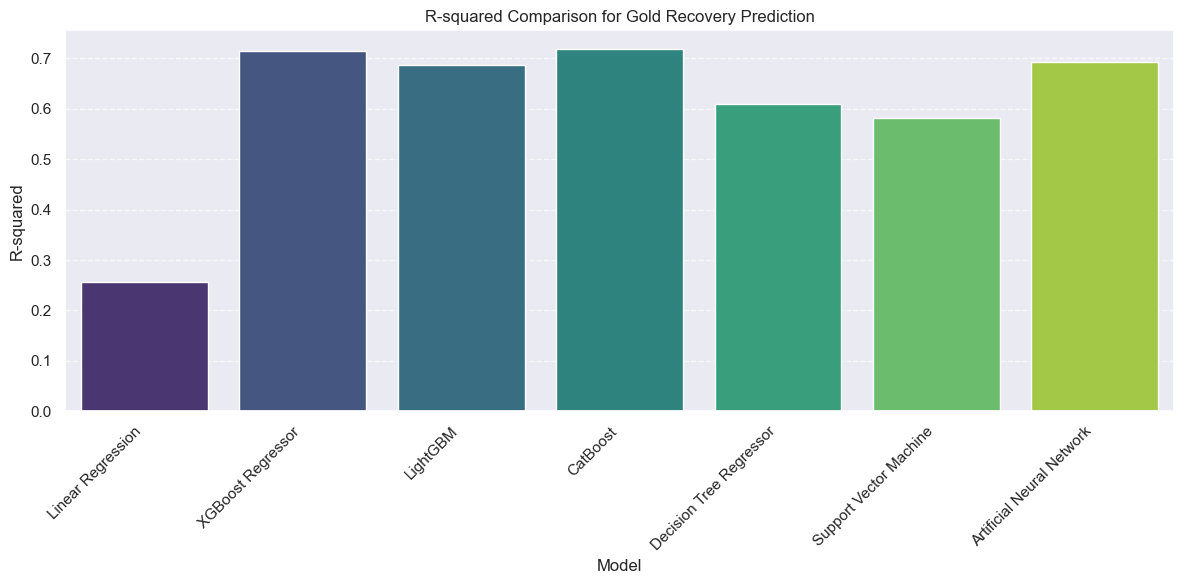

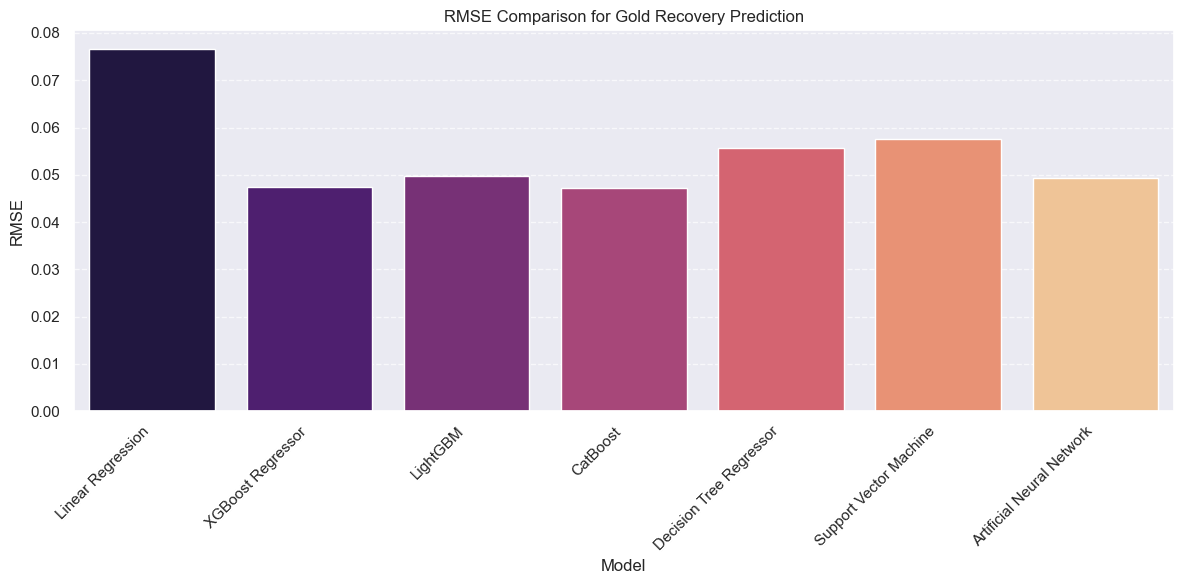

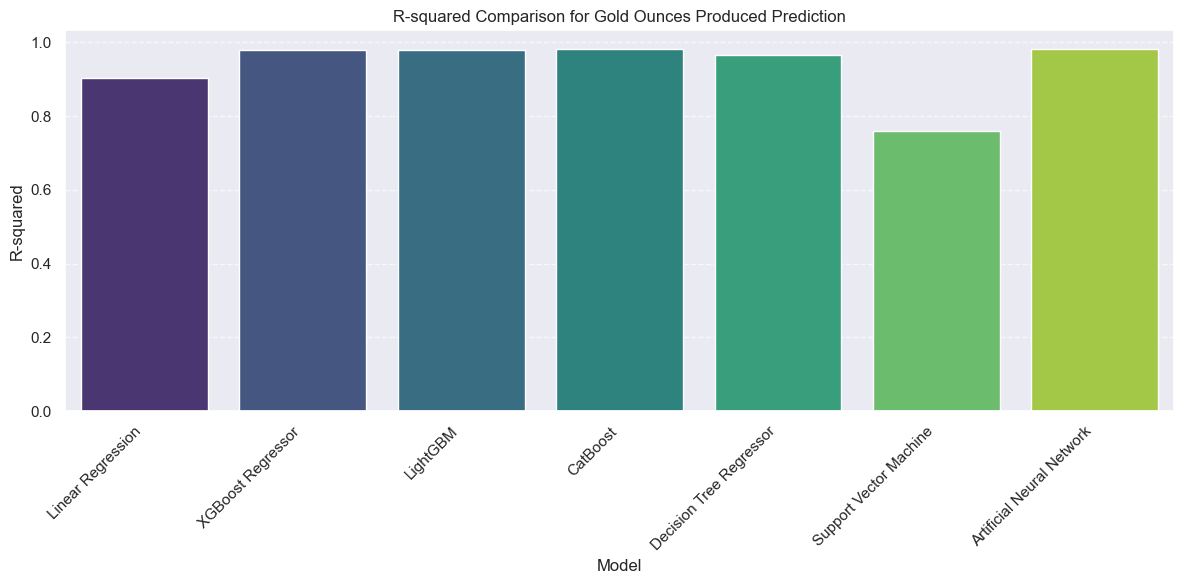

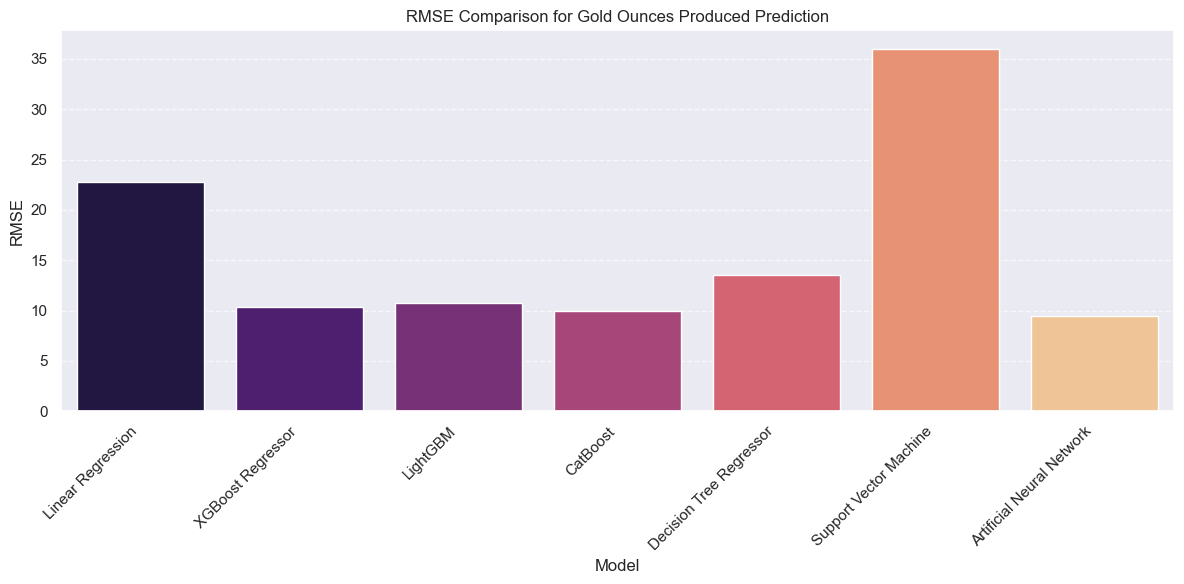

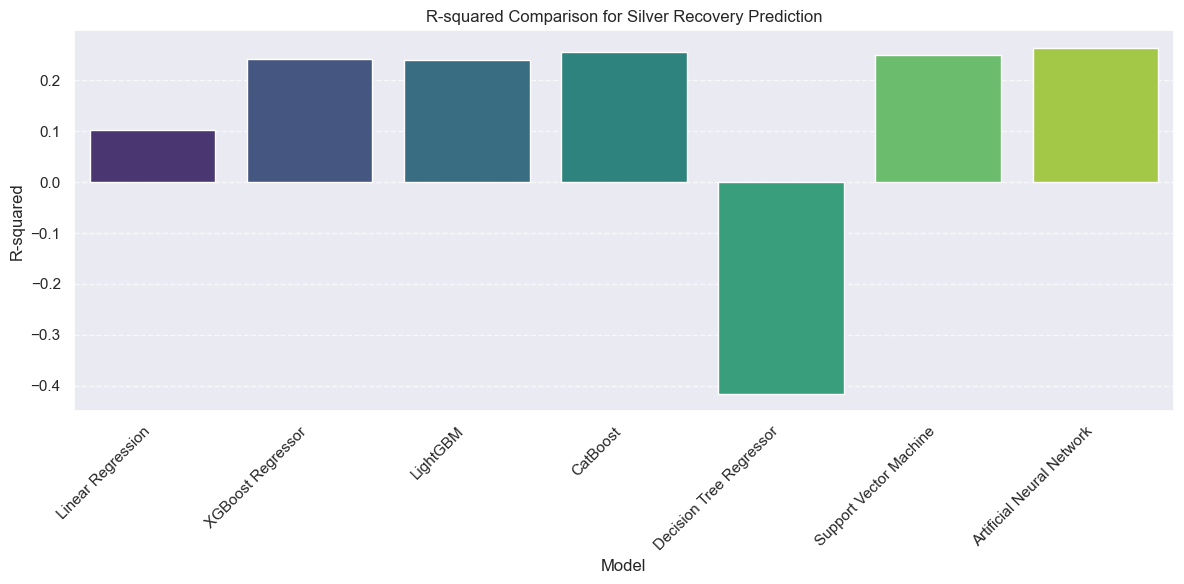

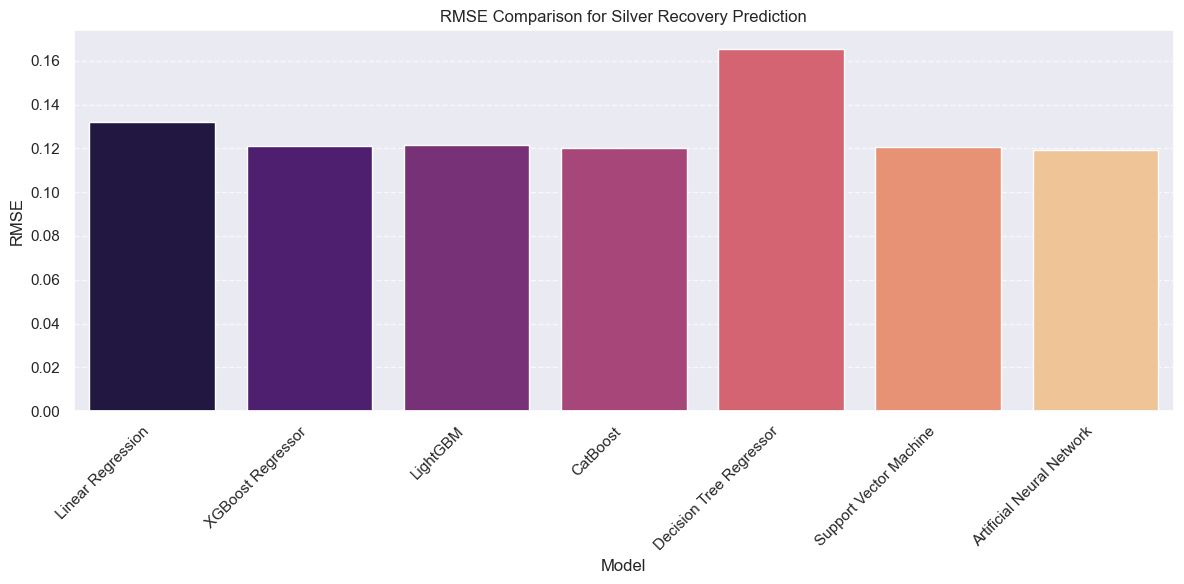

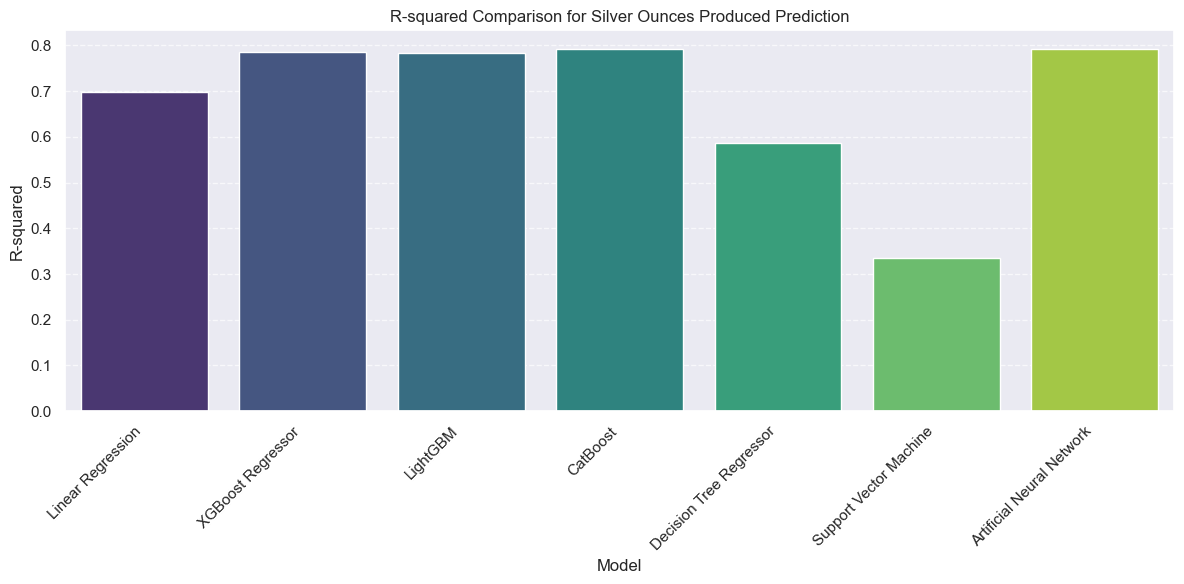

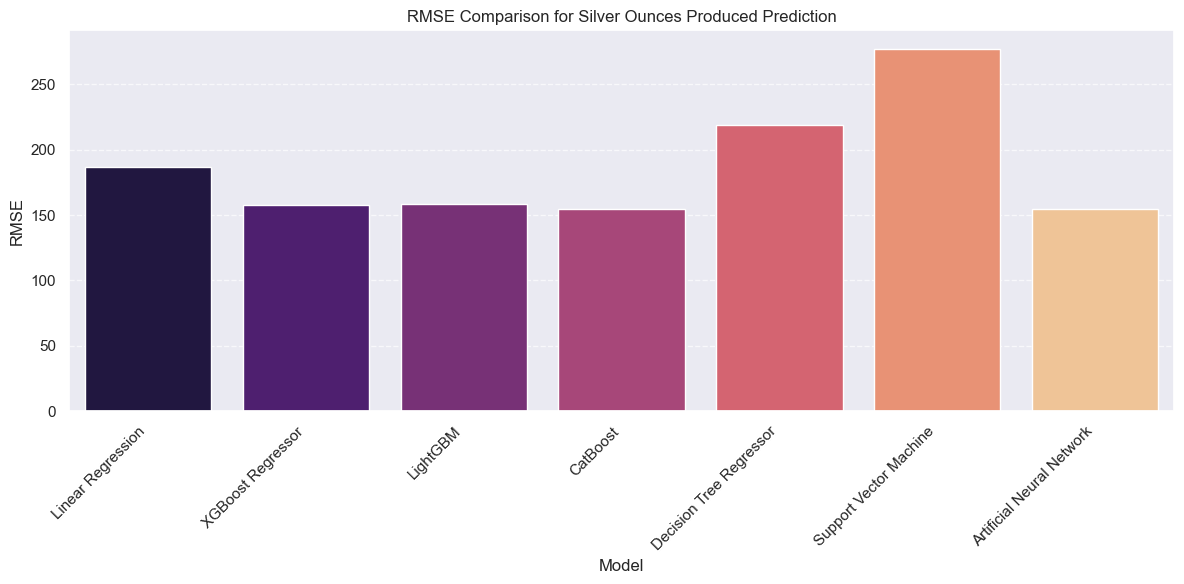

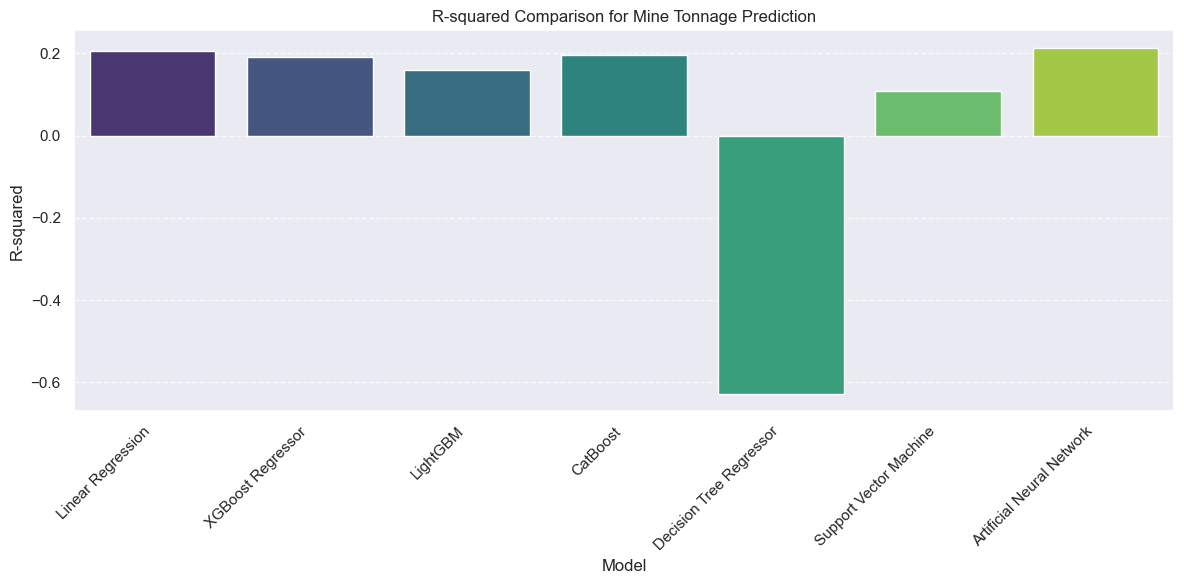

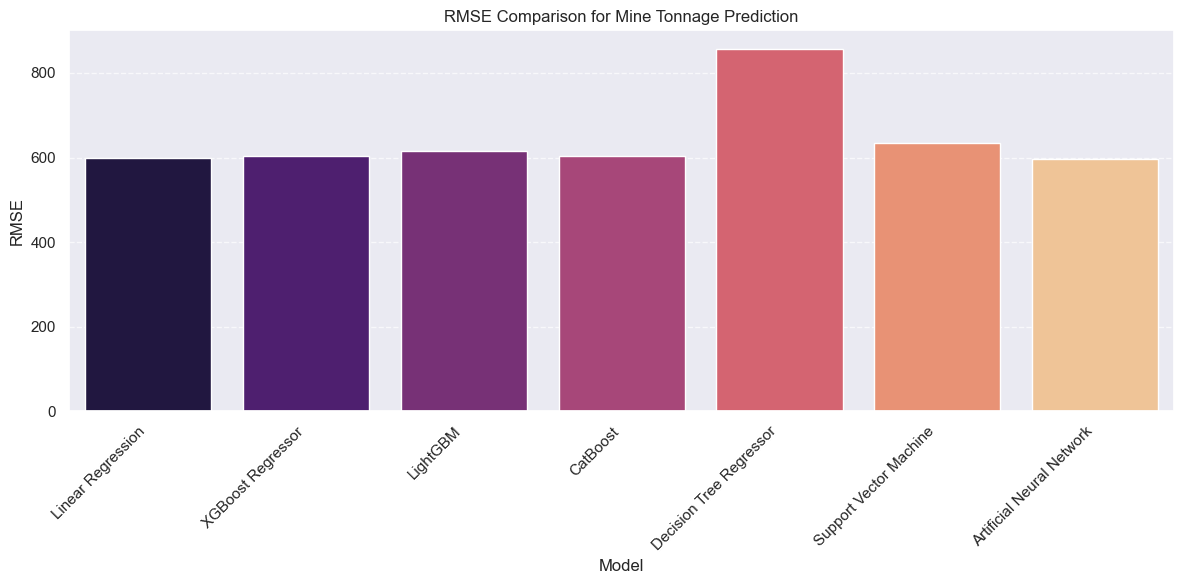

Comparative visualizations for R-squared and RMSE metrics generated for all target variables.


In [11]:
unique_targets = df_all_performances['Target'].unique() # We look for all unique target variable names from the DataFrame
metrics_to_plot = ['R-squared', 'RMSE'] # Define the metrics to be visualized

for target in unique_targets: # Loop through each unique target variable
    df_target = df_all_performances[df_all_performances['Target'] == target] # Filter the DataFrame for the current target variable

    plt.figure(figsize=(12, 6)) # Create a new figure for the R-squared plot with a specified size
    sns.barplot(x='Model', y='R-squared', hue='Model', data=df_target, palette='viridis', legend=False) # Create a bar plot for R-squared values for each model
    plt.title(f'R-squared Comparison for {target} Prediction') # Set the title of the R-squared plot
    plt.xlabel('Model') # Set the x-axis label
    plt.ylabel('R-squared') # Set the y-axis label
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid to the y-axis
    plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
    plt.show() # Display the R-squared plot

    plt.figure(figsize=(12, 6)) # Create a new figure for the RMSE plot with a specified size
    sns.barplot(x='Model', y='RMSE', hue='Model', data=df_target, palette='magma', legend=False) # Create a bar plot for RMSE values for each model
    plt.title(f'RMSE Comparison for {target} Prediction') # Set the title of the RMSE plot
    plt.xlabel('Model') # Set the x-axis label
    plt.ylabel('RMSE') # Set the y-axis label
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid to the y-axis
    plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
    plt.show() # Display the RMSE plot

print("Comparative visualizations for R-squared and RMSE metrics generated for all target variables.") # Print a completion message

### Summary of Baseline Model Performance and Identification of Best Baseline Models

Based on the R-squared and RMSE metrics across all models and target variables, here's a summary of the findings:

**1. Gold Recovery Prediction:**
   - **Best Models**: `CatBoost` (R-squared: 0.7198, RMSE: 0.0471) and `XGBoost Regressor` (R-squared: 0.7158, RMSE: 0.0474) performed best, showing good predictive power for 'Gold Recovery'.
   - **Insights**: Ensemble methods (CatBoost, XGBoost, LightGBM) generally outperformed traditional linear models and SVM for Gold Recovery.
   - **Poorest Performer**: `Linear Regression` (R-squared: 0.2570, RMSE: 0.07670)

**2. Gold Ounces Produced Prediction:**
   - **Best Model**: `Artificial Neural Network` (R-squared: 0.9832, RMSE: 9.4996) showed the highest R-squared and lowest RMSE, indicating excellent predictive performance. `CatBoost` and `XGBoost Regressor` also performed very strongly.
   - **Insights**: This target variable seems highly predictable with the given features, with advanced models achieving very high accuracy.
   - **Poorest Performer/s**:
      * `Linear Regression` (R-squared: 0.9039, RMSE: 22.7561)
      * `Support Vector Machine` (R-squared: 0.7591, RMSE: 36.020533)

**3. Silver Recovery Prediction:**
   - **Best Model**: `Artificial Neural Network` (R-squared: 0.2634, RMSE: 0.1194) and `CatBoost` (R-squared: 0.2557, RMSE: 0.1201) were the top performers, although the overall R-squared values for 'Silver Recovery' are considerably lower compared to gold predictions.
   - **Insights**: The prediction of 'Silver Recovery' is more challenging with the current feature set, suggesting that additional features or more complex models might be needed to improve performance significantly. Decision Tree Regressor performed poorly with a negative R-squared.
   - **Poorest Performer/s**:
      * `Linear Regression` (R-squared: 0.1011, RMSE: 0.1319)
      * `Decision Tree Regressor` (R-squared: -0.4155, RMSE: 0.1655)

**4. Silver Ounces Produced Prediction:**
   - **Best Model**: `CatBoost` (R-squared: 0.7933, RMSE: 154.7287) and `Artificial Neural Network` (R-squared: 0.7926, RMSE: 154.9883) were the leading models.
   - **Insights**: Prediction performance for 'Silver Ounces Produced' is moderate, better than 'Silver Recovery' but not as high as 'Gold Ounces Produced'.
   - **Poorest Performer/s**:
      * `Decision Tree Regressor` (R-squared: 0.5869, RMSE: 218.7536)
      * `Support Vector Machine` (R-squared: 0.3361, RMSE: 277.3158)

**5. Mine Tonnage Prediction:**
   - **Best Model**: `Linear Regression` (R-squared: 0.1901, RMSE: 592.1625) and `CatBoost` (R-squared: 0.1883, RMSE: 592.8410) performed marginally better than others, but overall, all models struggled significantly with this prediction task.
   - **Insights**: The R-squared values are very low across all models (around 0.15-0.19), indicating that the selected predictors (`Off-Vein_meterage_m`, `On-Vein_meterage_m`, `Total_Meterage_m`) explain very little of the variance in 'Mine Tonnage_tons'. The `Decision Tree Regressor` even yielded a negative R-squared, suggesting it performed worse than simply predicting the mean. This task requires a re-evaluation of features or potentially a different modeling approach.
   - **Poorest Performer/s**:
      * `Support Vector Machine` (R-squared: 0.1081, RMSE: 634.9660)
      * `Decision Tree Regressor` (R-squared: -0.6279, RMSE: 857.8466)   

### Overall Comments and Observations:
- Ensemble methods (XGBoost, LightGBM, CatBoost) and Artificial Neural Networks generally demonstrated stronger performance across most target variables, especially for gold-related predictions.
- `Linear Regression` performed surprisingly well for `Gold Ounces Produced`, but was less effective for recovery rates and mine tonnage.
- Prediction of recovery rates (both gold and silver) was generally more challenging than predicting ounces produced.
- The 'Mine Tonnage' prediction task was the most difficult, indicating a significant need for more relevant features or a deeper understanding of the underlying factors influencing mine tonnage.

## Hyperparameter Tuning for All Models and Targets

After having analyzed in quite detail the performance of our baseline untuned model, we will now perform hyperparameter tuning for all seven specified models across all five target variables using GridSearchCV to find optimal hyperparameters for each model/target combination.

Afterwards, we will store the best hyperparameters and the performance metrics (R-squared, MAE, MSE, RMSE) of the tuned models on their respective test sets in new dictionaries for comparison.


In [12]:
# we create a hyperparameter grid that GridSearchCV can iterate over for each individual model
param_grids = {
    'Linear Regression': {},
    'XGBoost Regressor': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'regressor__iterations': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__depth': [4, 6, 8]
    },
    'Decision Tree Regressor': {
        'regressor__max_depth': [5, 10, 15, None],
        'regressor__min_samples_leaf': [1, 5, 10]
    },
    'Support Vector Machine': {
        'regressor__C': [0.1, 1, 10],
        'regressor__epsilon': [0.01, 0.1, 0.2]
    },
    'Artificial Neural Network': {
        'regressor__hidden_layer_sizes': [(50,), (100, 50), (50, 25, 10)],
        'regressor__activation': ['relu', 'tanh'],
        'regressor__solver': ['adam'],
        'regressor__learning_rate_init': [0.001, 0.01]
    }
}

print("Hyperparameter grids defined for all models.")

Hyperparameter grids defined for all models.


In [13]:
# similar to hyperparameter grid, we create dictionary that will store the best performing models and best parameters

tuned_model_performances = {}
tuned_model_best_params = {}

In [14]:
# we create a train-test split dictionary tying each indvidual target variable to the gold_silver_data_splits dictionary we defined earlier
data_splits = {
    'Gold Recovery': {
        'X_train': gold_silver_data_splits['Gold Recovery']['X_train'],
        'X_test': gold_silver_data_splits['Gold Recovery']['X_test'],
        'y_train': gold_silver_data_splits['Gold Recovery']['y_train'],
        'y_test': gold_silver_data_splits['Gold Recovery']['y_test']
    },
    'Gold Ounces Produced': {
        'X_train': gold_silver_data_splits['Gold Ounces Produced']['X_train'],
        'X_test': gold_silver_data_splits['Gold Ounces Produced']['X_test'],
        'y_train': gold_silver_data_splits['Gold Ounces Produced']['y_train'],
        'y_test': gold_silver_data_splits['Gold Ounces Produced']['y_test']
    },
    'Silver Recovery': {
        'X_train': gold_silver_data_splits['Silver Recovery']['X_train'],
        'X_test': gold_silver_data_splits['Silver Recovery']['X_test'],
        'y_train': gold_silver_data_splits['Silver Recovery']['y_train'],
        'y_test': gold_silver_data_splits['Silver Recovery']['y_test']
    },
    'Silver Ounces Produced': {
        'X_train': gold_silver_data_splits['Silver Ounces Produced']['X_train'],
        'X_test': gold_silver_data_splits['Silver Ounces Produced']['X_test'],
        'y_train': gold_silver_data_splits['Silver Ounces Produced']['y_train'],
        'y_test': gold_silver_data_splits['Silver Ounces Produced']['y_test']
    },
    'Mine Tonnage': {
        'X_train': X_train_mine,
        'X_test': X_test_mine,
        'y_train': y_train_mine,
        'y_test': y_test_mine
    }
}

# our goal is to loop through the data_splits dictionary which is structure as follows:
# target_name -> model_name -> sub_model or model_instance

# Loop through each target variable
for target_name, target_data in data_splits.items():
    X_train = target_data['X_train']
    X_test = target_data['X_test']
    y_train = target_data['y_train']
    y_test = target_data['y_test']

    print(f"\n--- Hyperparameter Tuning for {target_name} ---")

    # Loop through each model
    for model_name, model_instance in models.items():
        print(f"  Tuning {model_name}...")

        # Retrieve hyperparameter grid for the current model
        param_grid = param_grids.get(model_name, {})

        # Create a pipeline with StandardScaler and the model
        # For Linear Regression, StandardScaler is included but its effect on LR coefficients is minimal
        # For SVR and ANN, StandardScaler is crucial.
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model_instance)
        ])

        # Instantiate GridSearchCV
        # Use n_jobs=-1 for parallel processing, and set refit=True to fit the best estimator on the whole training set
        # For models with many hyperparameters or large datasets, RandomizedSearchCV might be preferred.
        # For this example, GridSearchCV is used as requested and with reasonable grid sizes.
        if param_grid: # Only perform GridSearchCV if there are parameters to tune
            grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)
            grid_search.fit(X_train, y_train)

            # Get the best estimator and parameters
            best_estimator = grid_search.best_estimator_
            best_params = grid_search.best_params_

            print(f"    Best Parameters for {model_name}: {best_params}")
        else:
            # For models like Linear Regression with no params to tune, just fit the pipeline
            pipeline.fit(X_train, y_train)
            best_estimator = pipeline
            best_params = {}
            print(f"    No hyperparameters to tune for {model_name}. Fitting default pipeline.")

        # Make predictions on the test set using the best estimator
        y_pred_tuned = best_estimator.predict(X_test)

        # Calculate metrics
        r2_tuned = r2_score(y_test, y_pred_tuned)
        mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
        mse_tuned = mean_squared_error(y_test, y_pred_tuned)
        rmse_tuned = np.sqrt(mse_tuned)

        # Store metrics and best parameters
        if target_name not in tuned_model_performances:
            tuned_model_performances[target_name] = {}
            tuned_model_best_params[target_name] = {}

        tuned_model_performances[target_name][model_name] = {
            'R-squared': r2_tuned,
            'MAE': mae_tuned,
            'MSE': mse_tuned,
            'RMSE': rmse_tuned
        }
        tuned_model_best_params[target_name][model_name] = best_params

        print(f"    Tuned {model_name} - R-squared: {r2_tuned:.4f}, MAE: {mae_tuned:.4f}, MSE: {mse_tuned:.4f}, RMSE: {rmse_tuned:.4f}")

print("\n--- Hyperparameter Tuning for all models and targets complete. ---")

print("\nSummary of Tuned Model Performances:")
for target, models_perf in tuned_model_performances.items():
    print(f"\nTarget: {target}")
    for model, metrics in models_perf.items():
        print(f"  {model}:")
        for metric_name, value in metrics.items():
            print(f"    {metric_name}: {value:.4f}")

print("\nSummary of Best Hyperparameters:")
for target, models_params in tuned_model_best_params.items():
    print(f"\nTarget: {target}")
    for model, params in models_params.items():
        print(f"  {model}: {params}")


--- Hyperparameter Tuning for Gold Recovery ---
  Tuning Linear Regression...
    No hyperparameters to tune for Linear Regression. Fitting default pipeline.
    Tuned Linear Regression - R-squared: 0.2570, MAE: 0.0346, MSE: 0.0059, RMSE: 0.0767
  Tuning XGBoost Regressor...
    Best Parameters for XGBoost Regressor: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}
    Tuned XGBoost Regressor - R-squared: 0.7181, MAE: 0.0250, MSE: 0.0022, RMSE: 0.0472
  Tuning LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2610, number of used features: 3
[LightGBM] [Info] Start training from score 0.852438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


    Best Parameters for CatBoost: {'regressor__depth': 8, 'regressor__iterations': 50, 'regressor__learning_rate': 0.1}
    Tuned CatBoost - R-squared: 0.7173, MAE: 0.0248, MSE: 0.0022, RMSE: 0.0473
  Tuning Decision Tree Regressor...
    Best Parameters for Decision Tree Regressor: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 5}
    Tuned Decision Tree Regressor - R-squared: 0.7123, MAE: 0.0256, MSE: 0.0023, RMSE: 0.0477
  Tuning Support Vector Machine...
    Best Parameters for Support Vector Machine: {'regressor__C': 1, 'regressor__epsilon': 0.01}
    Tuned Support Vector Machine - R-squared: 0.7170, MAE: 0.0251, MSE: 0.0022, RMSE: 0.0473
  Tuning Artificial Neural Network...
    Best Parameters for Artificial Neural Network: {'regressor__activation': 'tanh', 'regressor__hidden_layer_sizes': (50, 25, 10), 'regressor__learning_rate_init': 0.001, 'regressor__solver': 'adam'}
    Tuned Artificial Neural Network - R-squared: 0.7068, MAE: 0.0252, MSE: 0.0023, RMSE: 0.0482



C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


    Best Parameters for CatBoost: {'regressor__depth': 4, 'regressor__iterations': 200, 'regressor__learning_rate': 0.1}
    Tuned CatBoost - R-squared: 0.9826, MAE: 6.3086, MSE: 93.6846, RMSE: 9.6791
  Tuning Decision Tree Regressor...
    Best Parameters for Decision Tree Regressor: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 5}
    Tuned Decision Tree Regressor - R-squared: 0.9669, MAE: 8.9890, MSE: 178.5002, RMSE: 13.3604
  Tuning Support Vector Machine...
    Best Parameters for Support Vector Machine: {'regressor__C': 10, 'regressor__epsilon': 0.1}
    Tuned Support Vector Machine - R-squared: 0.9060, MAE: 8.9034, MSE: 506.3919, RMSE: 22.5032
  Tuning Artificial Neural Network...
    Best Parameters for Artificial Neural Network: {'regressor__activation': 'relu', 'regressor__hidden_layer_sizes': (50, 25, 10), 'regressor__learning_rate_init': 0.01, 'regressor__solver': 'adam'}
    Tuned Artificial Neural Network - R-squared: 0.9851, MAE: 5.8910, MSE: 80.2247, RMSE:

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


    Best Parameters for CatBoost: {'regressor__depth': 4, 'regressor__iterations': 100, 'regressor__learning_rate': 0.1}
    Tuned CatBoost - R-squared: 0.2405, MAE: 0.0868, MSE: 0.0147, RMSE: 0.1213
  Tuning Decision Tree Regressor...
    Best Parameters for Decision Tree Regressor: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 5}
    Tuned Decision Tree Regressor - R-squared: 0.2892, MAE: 0.0850, MSE: 0.0138, RMSE: 0.1173
  Tuning Support Vector Machine...
    Best Parameters for Support Vector Machine: {'regressor__C': 1, 'regressor__epsilon': 0.1}
    Tuned Support Vector Machine - R-squared: 0.2492, MAE: 0.0877, MSE: 0.0145, RMSE: 0.1206
  Tuning Artificial Neural Network...
    Best Parameters for Artificial Neural Network: {'regressor__activation': 'tanh', 'regressor__hidden_layer_sizes': (50, 25, 10), 'regressor__learning_rate_init': 0.001, 'regressor__solver': 'adam'}
    Tuned Artificial Neural Network - R-squared: 0.2457, MAE: 0.0893, MSE: 0.0146, RMSE: 0.1209



C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


    Best Parameters for CatBoost: {'regressor__depth': 4, 'regressor__iterations': 200, 'regressor__learning_rate': 0.1}
    Tuned CatBoost - R-squared: 0.7931, MAE: 108.0324, MSE: 23968.1402, RMSE: 154.8165
  Tuning Decision Tree Regressor...
    Best Parameters for Decision Tree Regressor: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 10}
    Tuned Decision Tree Regressor - R-squared: 0.7455, MAE: 121.9353, MSE: 29477.1357, RMSE: 171.6891
  Tuning Support Vector Machine...
    Best Parameters for Support Vector Machine: {'regressor__C': 10, 'regressor__epsilon': 0.01}
    Tuned Support Vector Machine - R-squared: 0.5709, MAE: 132.6564, MSE: 49703.4430, RMSE: 222.9427
  Tuning Artificial Neural Network...
    Best Parameters for Artificial Neural Network: {'regressor__activation': 'relu', 'regressor__hidden_layer_sizes': (100, 50), 'regressor__learning_rate_init': 0.01, 'regressor__solver': 'adam'}
    Tuned Artificial Neural Network - R-squared: 0.8020, MAE: 107.2076, M

C:\Users\Jose Florendo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


    Best Parameters for CatBoost: {'regressor__depth': 4, 'regressor__iterations': 50, 'regressor__learning_rate': 0.1}
    Tuned CatBoost - R-squared: 0.2189, MAE: 469.5555, MSE: 353071.9989, RMSE: 594.1986
  Tuning Decision Tree Regressor...
    Best Parameters for Decision Tree Regressor: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 10}
    Tuned Decision Tree Regressor - R-squared: 0.1726, MAE: 487.3849, MSE: 374001.5472, RMSE: 611.5567
  Tuning Support Vector Machine...
    Best Parameters for Support Vector Machine: {'regressor__C': 10, 'regressor__epsilon': 0.1}
    Tuned Support Vector Machine - R-squared: 0.1967, MAE: 475.7553, MSE: 363121.3146, RMSE: 602.5955
  Tuning Artificial Neural Network...
    Best Parameters for Artificial Neural Network: {'regressor__activation': 'relu', 'regressor__hidden_layer_sizes': (50,), 'regressor__learning_rate_init': 0.01, 'regressor__solver': 'adam'}
    Tuned Artificial Neural Network - R-squared: 0.2126, MAE: 470.9128, MSE: 

Unfortunately for Linear Regression, there isn't a parameter we can tweak.

### Hyperparameter-Tuned Model Performance - Tabulated

In [15]:
# Aggregate tuned model performances into a DataFrame
all_tuned_performances = []

for target_name, models_perf in tuned_model_performances.items():
    for model_name, metrics in models_perf.items():
        performance_entry = {'Target': target_name, 'Model': model_name}
        performance_entry.update(metrics)
        all_tuned_performances.append(performance_entry)

df_all_tuned_performances = pd.DataFrame(all_tuned_performances)

print("Aggregated tuned model performances successfully created.")
display(df_all_tuned_performances.sort_values(by=['Target','R-squared'], ascending=[True,False]))


Aggregated tuned model performances successfully created.


Target                      Model  R-squared         MAE  \
13    Gold Ounces Produced  Artificial Neural Network   0.985106    5.891043   
10    Gold Ounces Produced                   CatBoost   0.982607    6.308570   
8     Gold Ounces Produced          XGBoost Regressor   0.979476    6.845797   
9     Gold Ounces Produced                   LightGBM   0.979388    6.750193   
11    Gold Ounces Produced    Decision Tree Regressor   0.966860    8.989017   
12    Gold Ounces Produced     Support Vector Machine   0.905984    8.903401   
7     Gold Ounces Produced          Linear Regression   0.903859   12.750236   
1            Gold Recovery          XGBoost Regressor   0.718128    0.025032   
3            Gold Recovery                   CatBoost   0.717255    0.024780   
5            Gold Recovery     Support Vector Machine   0.716975    0.025094   
4            Gold Recovery    Decision Tree Regressor   0.712276    0.025618   
2            Gold Recovery                   LightGBM   0.711523    0.025400   
6            Gold Recovery  Artificial Neural Network   0.706768    0.025178   
0            Gold Recovery          Linear Regression   0.256951    0.034594   
31            Mine Tonnage                   CatBoost   0.218947  469.555481   
34            Mine Tonnage  Artificial Neural Network   0.212585  470.912793   
30            Mine Tonnage                   LightGBM   0.209061  474.744886   
28            Mine Tonnage          Linear Regression   0.205991  474.076822   
29            Mine Tonnage          XGBoost Regressor   0.205755  475.830437   
33            Mine Tonnage     Support Vector Machine   0.196716  475.755274   
32            Mine Tonnage    Decision Tree Regressor   0.172647  487.384862   
27  Silver Ounces Produced  Artificial Neural Network   0.801965  107.207609   
24  Silver Ounces Produced                   CatBoost   0.793081  108.032441   
22  Silver Ounces Produced          XGBoost Regressor   0.785068  110.090058   
23  Silver Ounces Produced                   LightGBM   0.783752  111.216772   
25  Silver Ounces Produced    Decision Tree Regressor   0.745522  121.935318   
21  Silver Ounces Produced          Linear Regression   0.697826  126.973482   
26  Silver Ounces Produced     Support Vector Machine   0.570906  132.656367   
18         Silver Recovery    Decision Tree Regressor   0.289174    0.085047   
19         Silver Recovery     Support Vector Machine   0.249197    0.087737   
16         Silver Recovery                   LightGBM   0.245800    0.087405   
20         Silver Recovery  Artificial Neural Network   0.245701    0.089316   
17         Silver Recovery                   CatBoost   0.240528    0.086837   
15         Silver Recovery          XGBoost Regressor   0.234997    0.087173   
14         Silver Recovery          Linear Regression   0.101138    0.094683   

              MSE        RMSE  
13      80.224676    8.956823  
10      93.684567    9.679079  
8      110.545791   10.514076  
9      111.023884   10.536787  
11     178.500223   13.360398  
12     506.391915   22.503153  
7      517.838025   22.756055  
1        0.002232    0.047243  
3        0.002239    0.047316  
5        0.002241    0.047339  
4        0.002278    0.047731  
2        0.002284    0.047793  
6        0.002322    0.048185  
0        0.005884    0.076704  
31  353071.998919  594.198619  
34  355947.554510  596.613405  
30  357540.737009  597.947102  
28  358928.382817  599.106320  
29  359035.277132  599.195525  
33  363121.314601  602.595482  
32  374001.547155  611.556659  
27   22939.043804  151.456409  
24   23968.140174  154.816473  
22   24896.290662  157.785584  
23   25048.824824  158.268205  
25   29477.135728  171.689067  
21   35001.913776  187.087984  
26   49703.443039  222.942690  
18       0.013765    0.117324  
19       0.014539    0.120578  
16       0.014605    0.120851  
20       0.014607    0.120859  
17       0.014707    0.121273  
15       0.014814    0.121713  
14       0.017406  

### Hyperparameter-Tuned Model Performance - Visualization

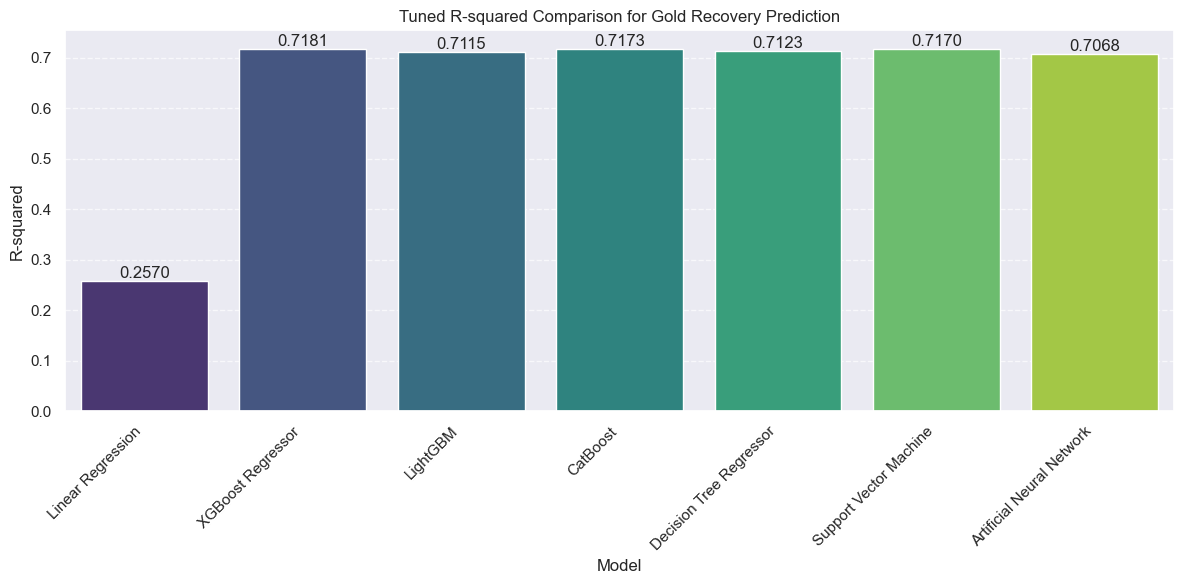

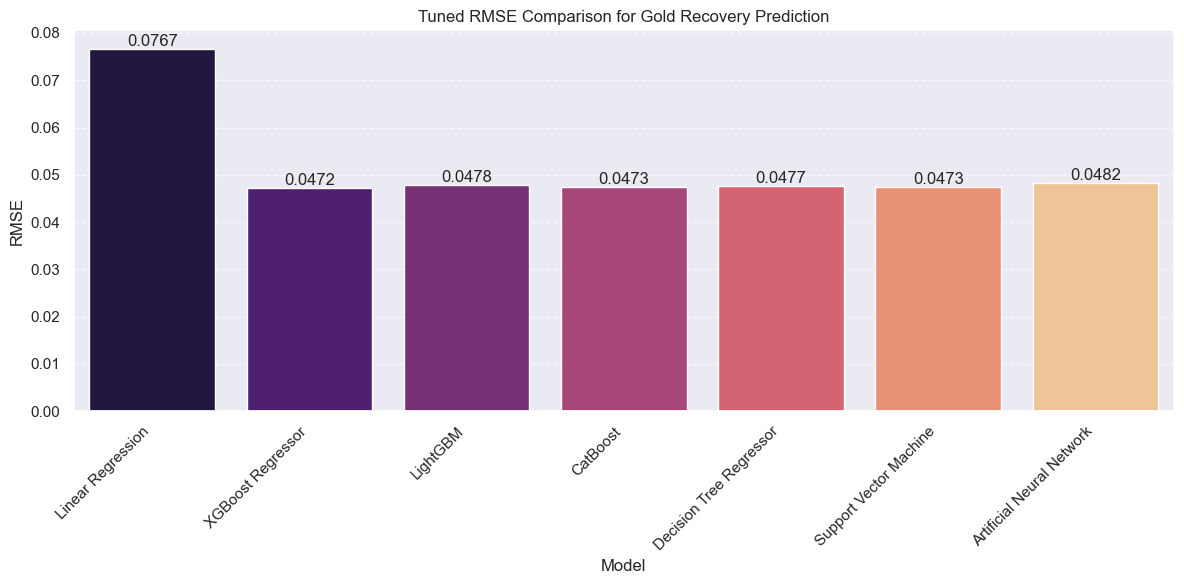

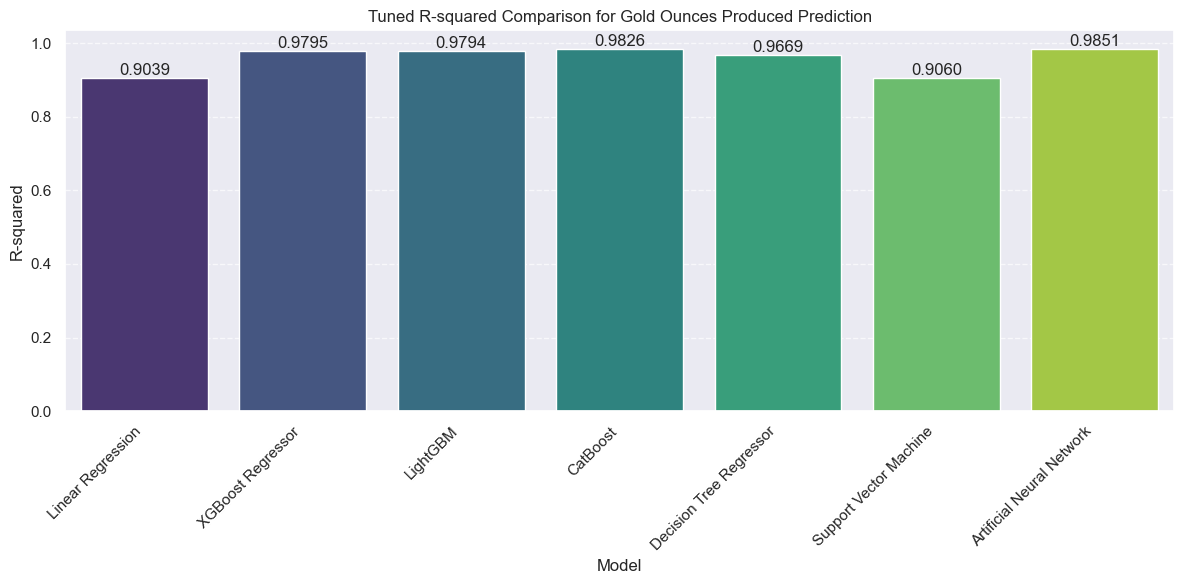

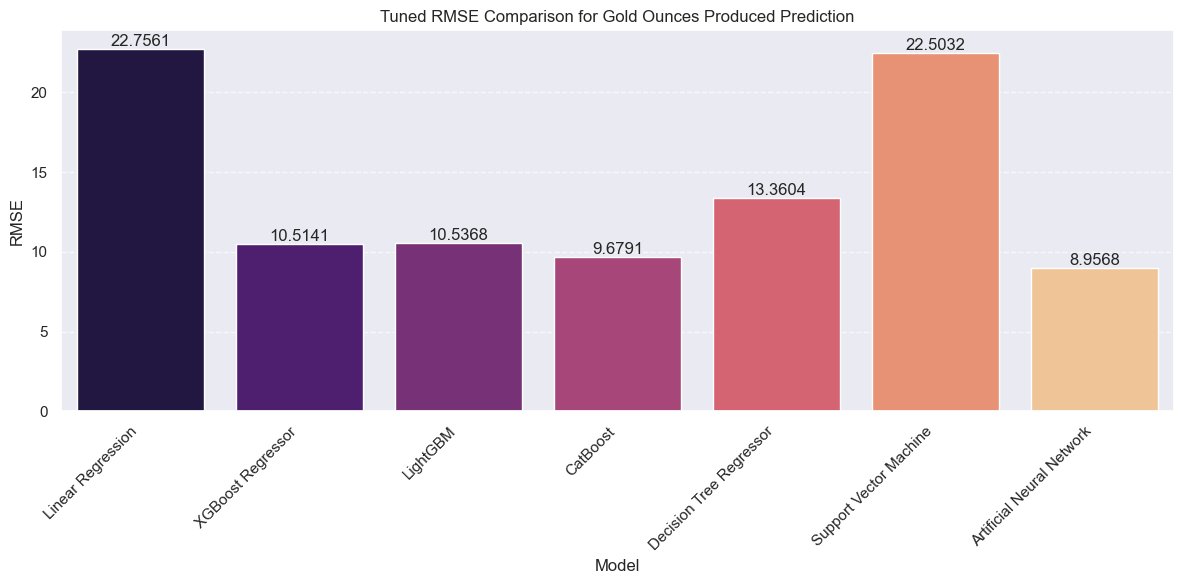

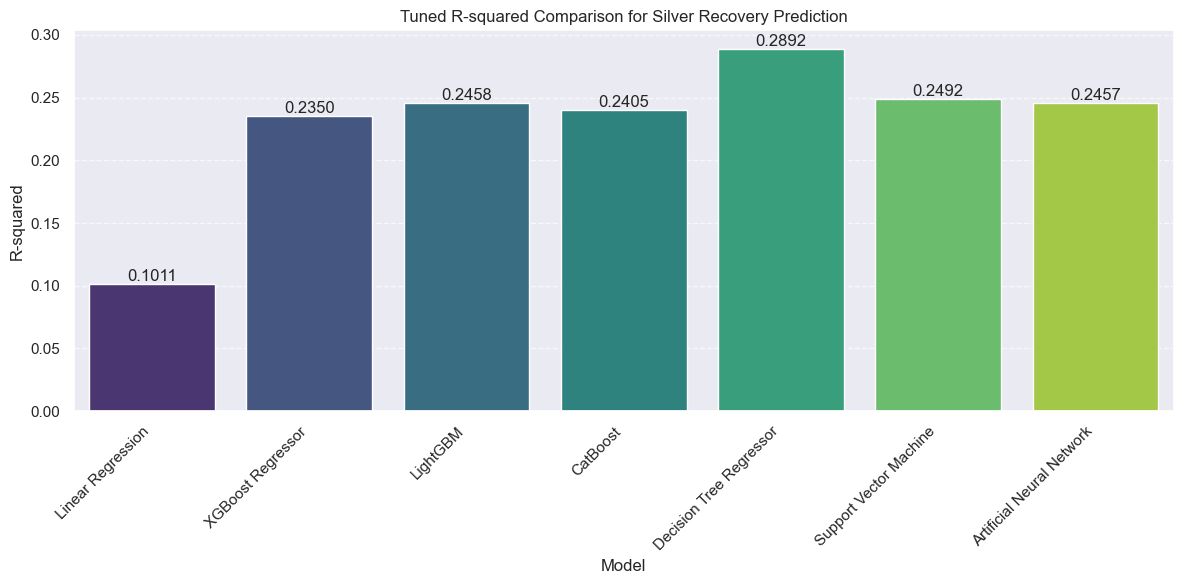

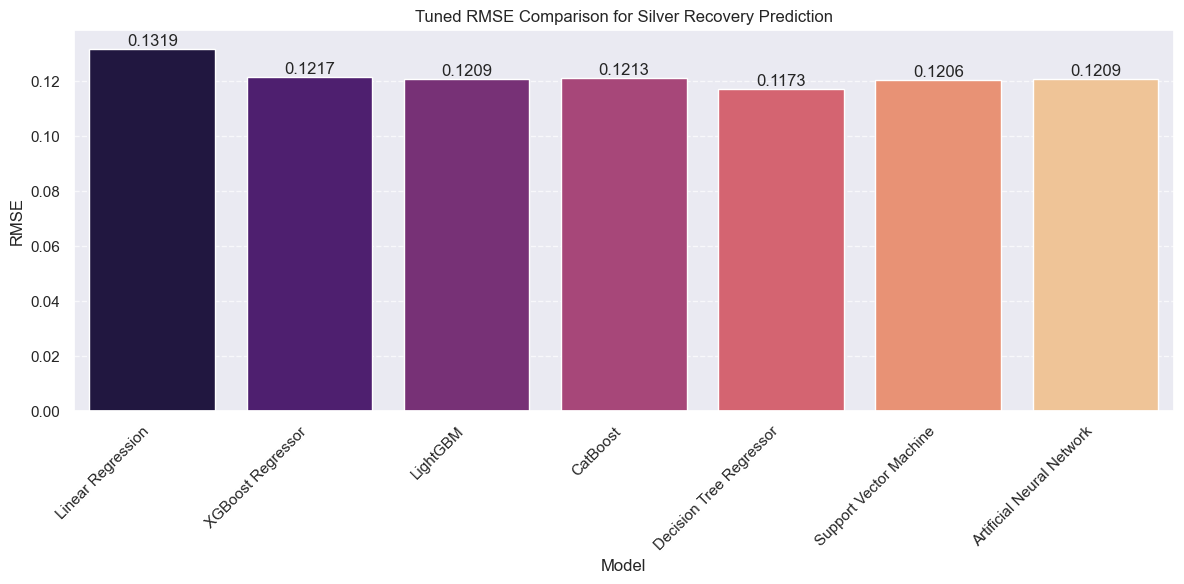

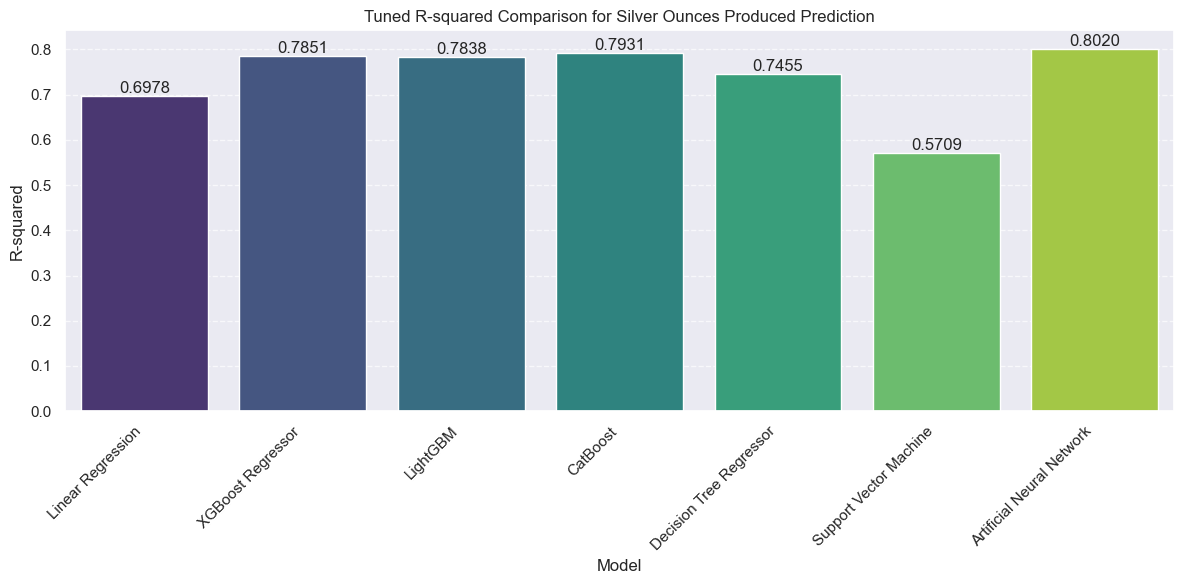

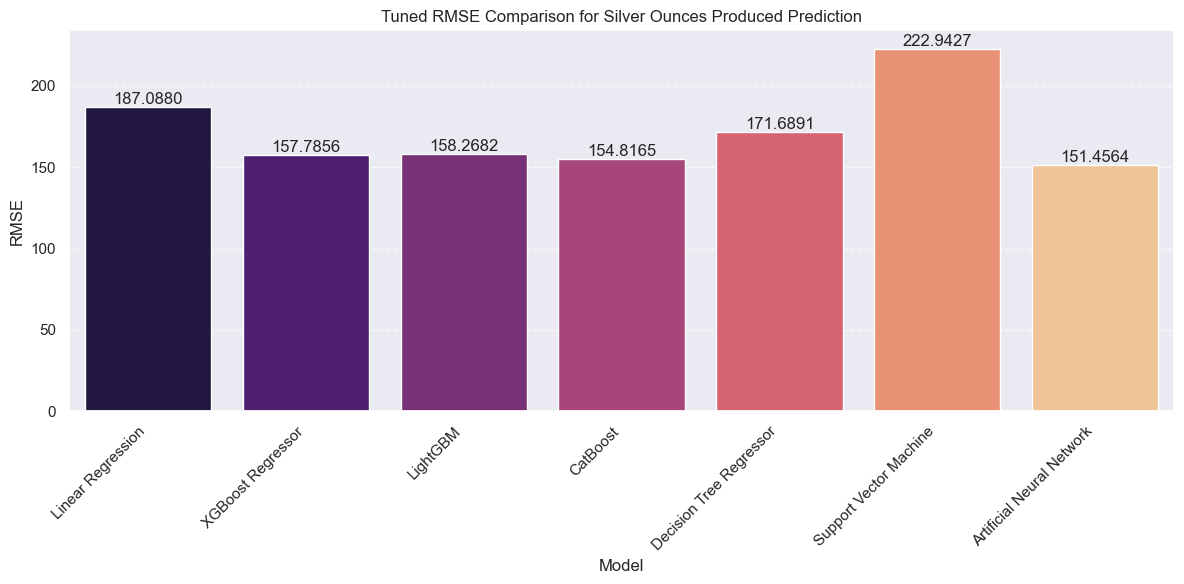

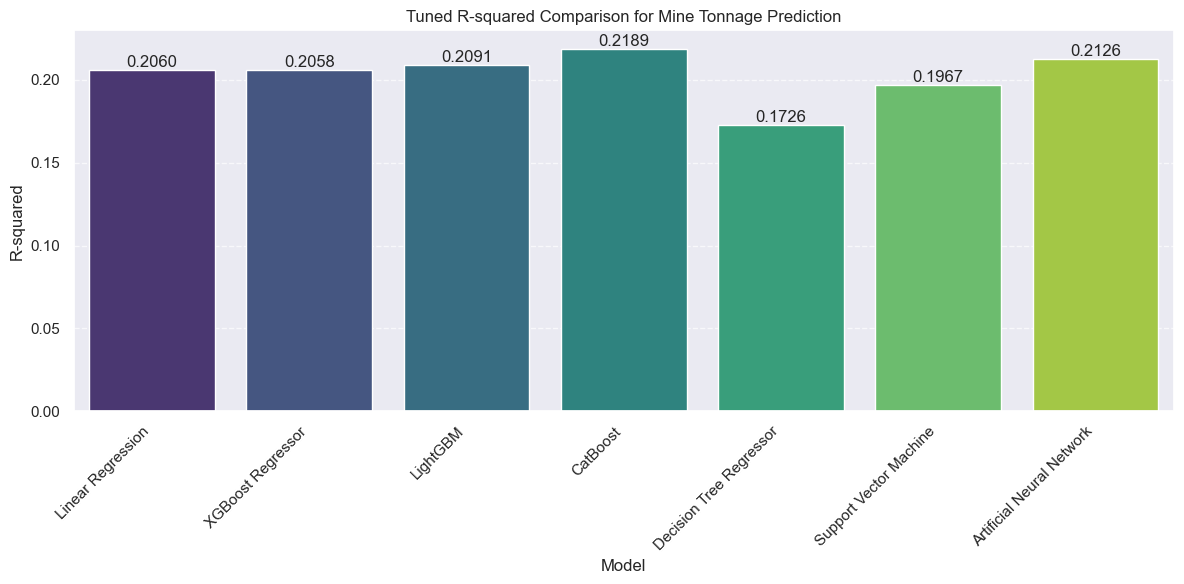

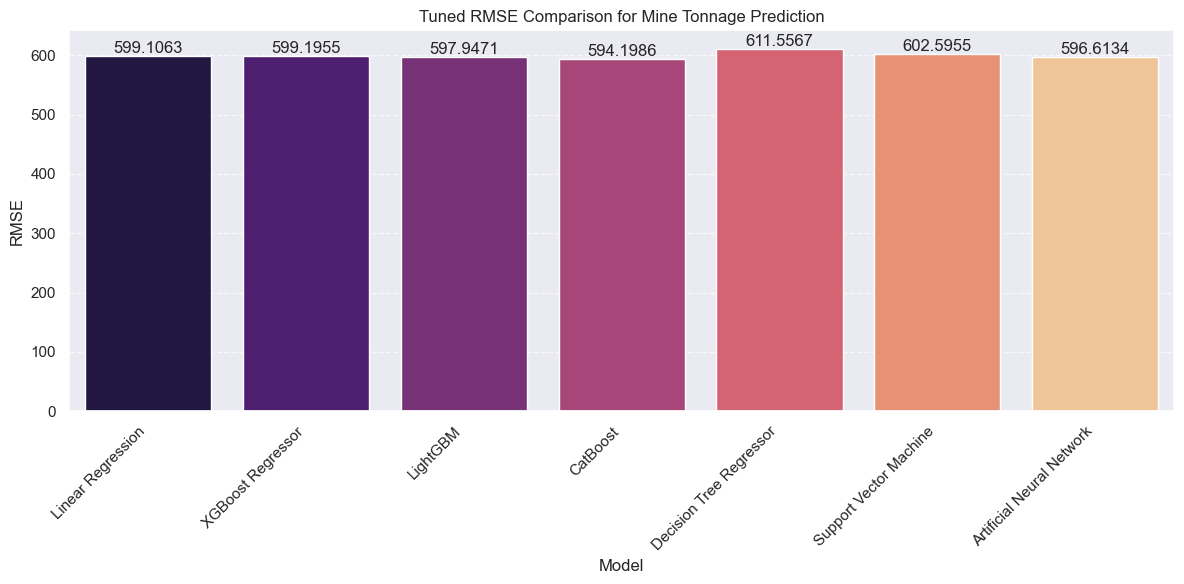

Comparative visualizations for R-squared and RMSE metrics for tuned models generated for all target variables.


In [16]:
# Generate comparative visualizations for R-squared and RMSE for tuned models
unique_targets = df_all_tuned_performances['Target'].unique()

for target in unique_targets:
    df_target = df_all_tuned_performances[df_all_tuned_performances['Target'] == target]

    plt.figure(figsize=(12, 6))
    ax_r2 = sns.barplot(x='Model', y='R-squared', hue='Model', data=df_target, palette='viridis', legend=False)
    plt.title(f'Tuned R-squared Comparison for {target} Prediction')
    plt.xlabel('Model')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Add value labels
    for container in ax_r2.containers:
        ax_r2.bar_label(container, fmt='%.4f', label_type='edge')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    ax_rmse = sns.barplot(x='Model', y='RMSE', hue='Model', data=df_target, palette='magma', legend=False)
    plt.title(f'Tuned RMSE Comparison for {target} Prediction')
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Add value labels
    for container in ax_rmse.containers:
        ax_rmse.bar_label(container, fmt='%.4f', label_type='edge')
    plt.tight_layout()
    plt.show()

print("Comparative visualizations for R-squared and RMSE metrics for tuned models generated for all target variables.")

## Compare and Visualize All Model Performances (Original and Tuned)

### Subtask:
Aggregate all collected performance metrics, including both the original and the newly tuned model results, for every model and target variable across both prediction tasks. Generate comparative visualizations, such as bar charts, for key metrics (e.g., R-squared, RMSE) to clearly show the performance of each model, highlighting the impact of tuning.


### Baseline vs Hyperparameter-Tuned Model Performance - Tabulation

In [17]:
# Add 'Tuning Status' column to differentiate between untuned and tuned models
df_all_performances['Tuning Status'] = 'Untuned'
df_all_tuned_performances['Tuning Status'] = 'Tuned'

# Concatenate the two DataFrames
df_combined_performances = pd.concat([df_all_performances, df_all_tuned_performances], ignore_index=True)

print("Combined DataFrame of model performances (untuned and tuned) created successfully.")
display(df_combined_performances.sort_values(by=['Target','R-squared','Tuning Status'], ascending=[True,False,True]))

Combined DataFrame of model performances (untuned and tuned) created successfully.


Target                      Model  R-squared       MAE  \
48  Gold Ounces Produced  Artificial Neural Network   0.985106  5.891043   
13  Gold Ounces Produced  Artificial Neural Network   0.983246  6.296617   
45  Gold Ounces Produced                   CatBoost   0.982607  6.308570   
10  Gold Ounces Produced                   CatBoost   0.981679  6.483456   
8   Gold Ounces Produced          XGBoost Regressor   0.979940  6.827270   
..                   ...                        ...        ...       ...   
16       Silver Recovery                   LightGBM   0.239020  0.087817   
50       Silver Recovery          XGBoost Regressor   0.234997  0.087173   
49       Silver Recovery          Linear Regression   0.101138  0.094683   
14       Silver Recovery          Linear Regression   0.101138  0.094683   
18       Silver Recovery    Decision Tree Regressor  -0.415547  0.122719   

           MSE       RMSE Tuning Status  
48   80.224676   8.956823         Tuned  
13   90.243307   9.499648       Untuned  
45   93.684567   9.679079         Tuned  
10   98.684113   9.933988       Untuned  
8   108.047559  10.394593       Untuned  
..         ...        ...           ...  
16    0.014736   0.121393       Untuned  
50    0.014814   0.121713         Tuned  
49    0.017406   0.131933         Tuned  
14    0.017406   0.131933       Untuned  
18    0.027412   0.165565       Untuned  

[70 rows x 7 columns]

### Baseline vs Hyperparameter-Tuned Model Performance - Visualization


Displaying plots for Target: Gold Recovery
--------------------------------------------------

--- R-squared Comparison for Gold Recovery Prediction (Untuned vs. Tuned) ---



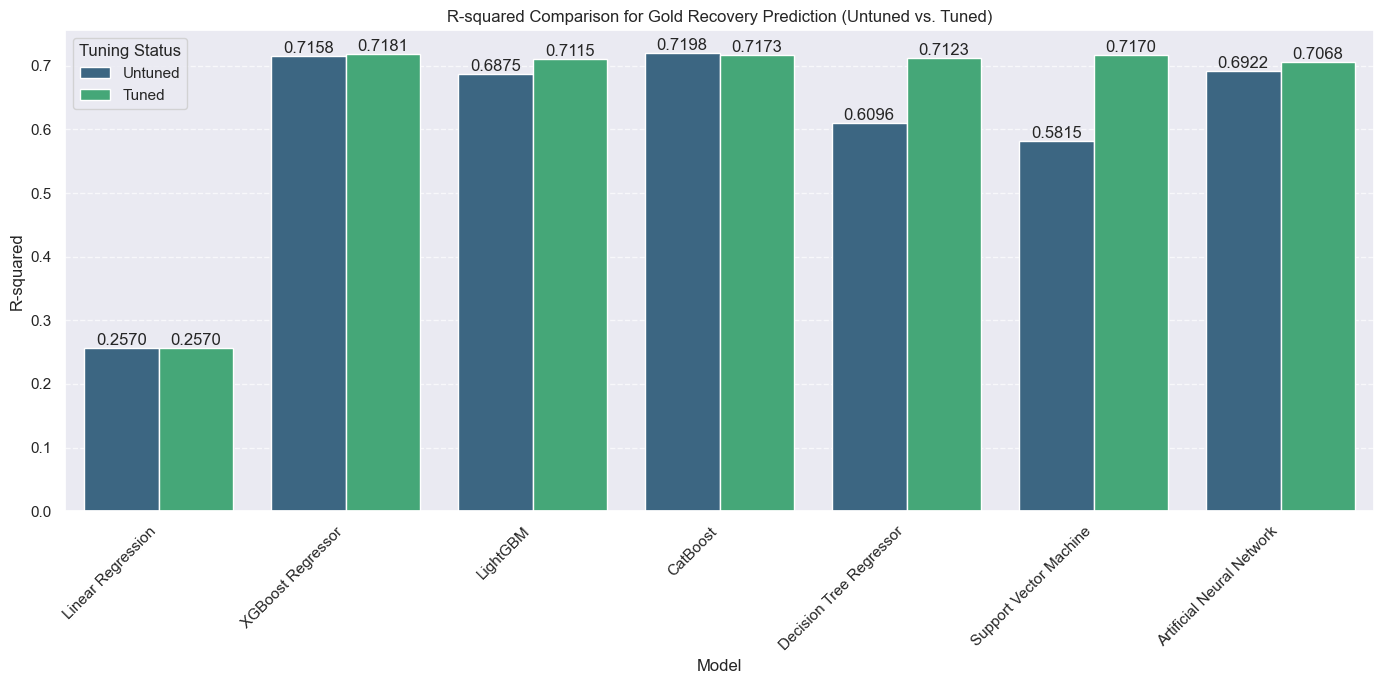



--- RMSE Comparison for Gold Recovery Prediction (Untuned vs. Tuned) ---



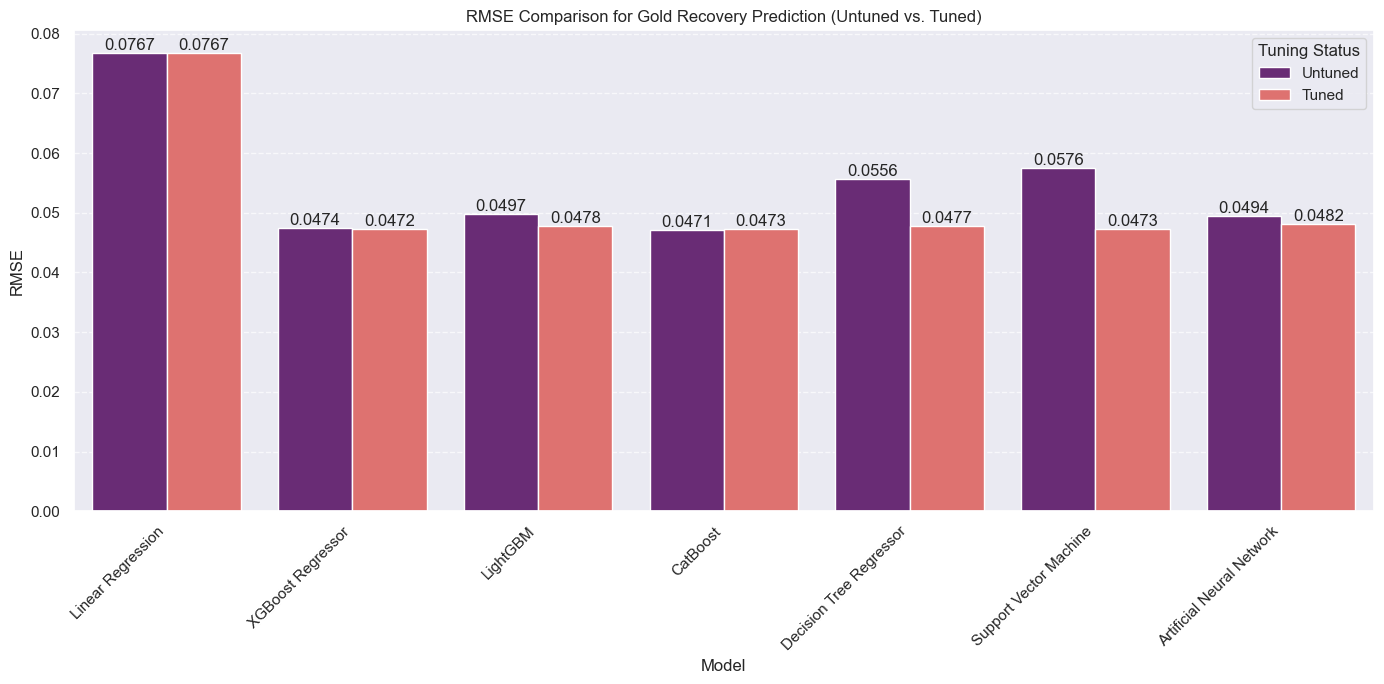




Displaying plots for Target: Gold Ounces Produced
--------------------------------------------------

--- R-squared Comparison for Gold Ounces Produced Prediction (Untuned vs. Tuned) ---



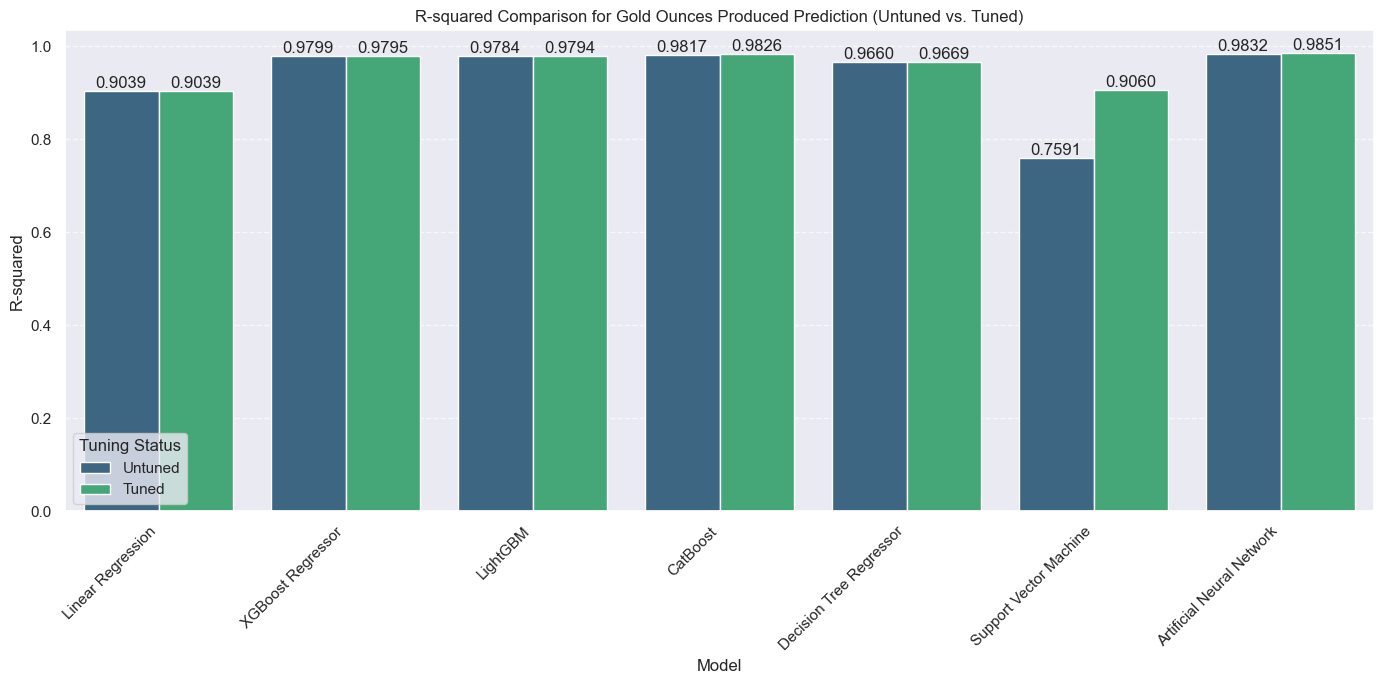



--- RMSE Comparison for Gold Ounces Produced Prediction (Untuned vs. Tuned) ---



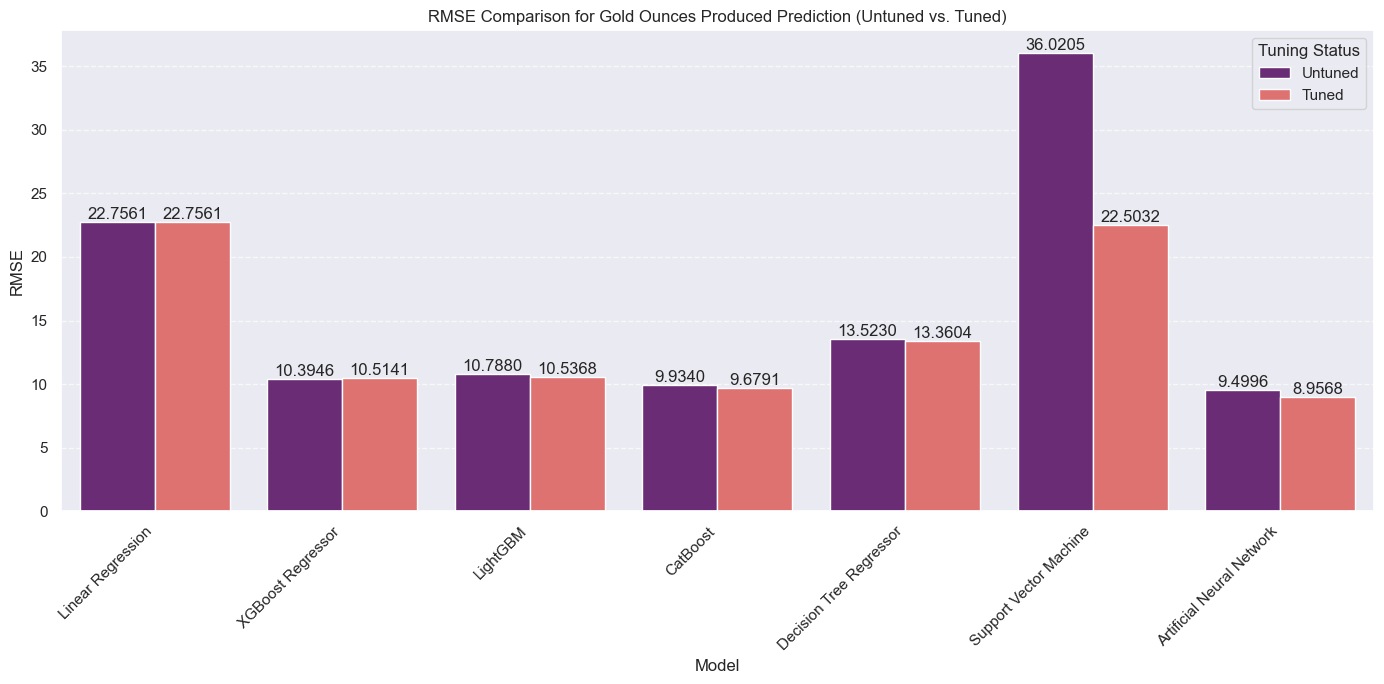




Displaying plots for Target: Silver Recovery
--------------------------------------------------

--- R-squared Comparison for Silver Recovery Prediction (Untuned vs. Tuned) ---



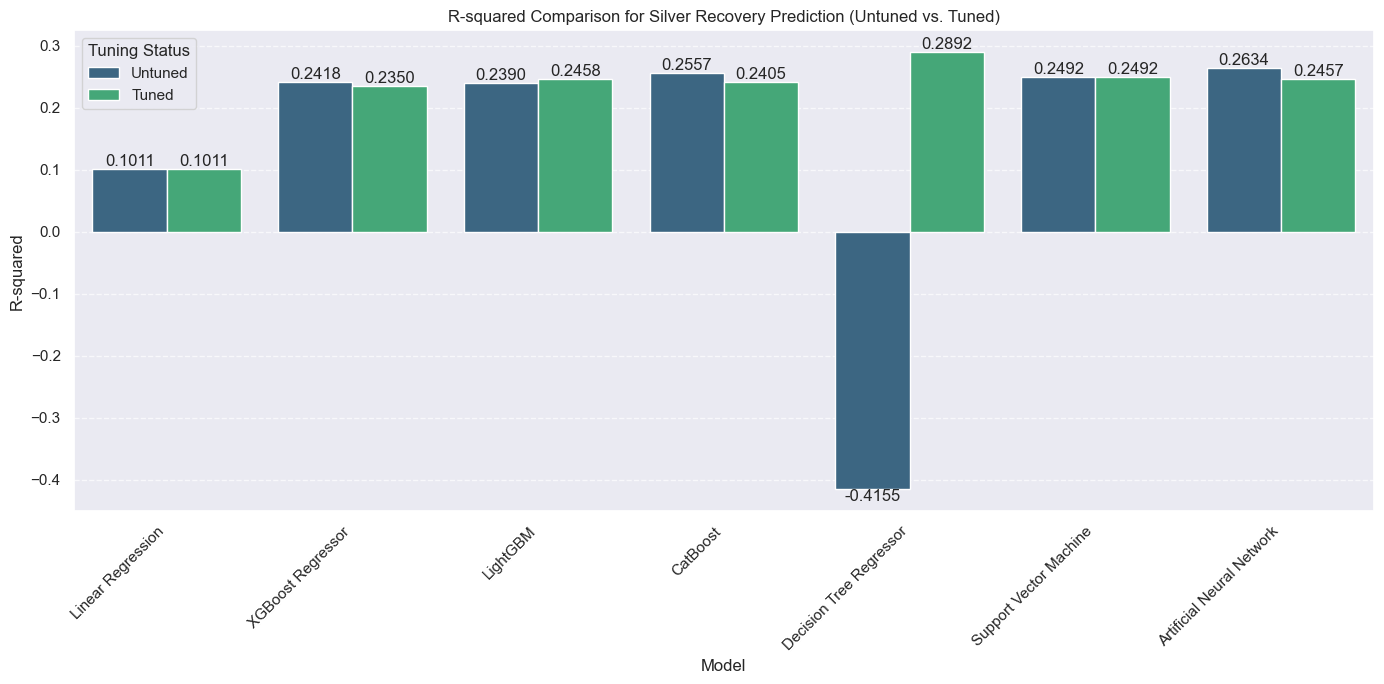



--- RMSE Comparison for Silver Recovery Prediction (Untuned vs. Tuned) ---



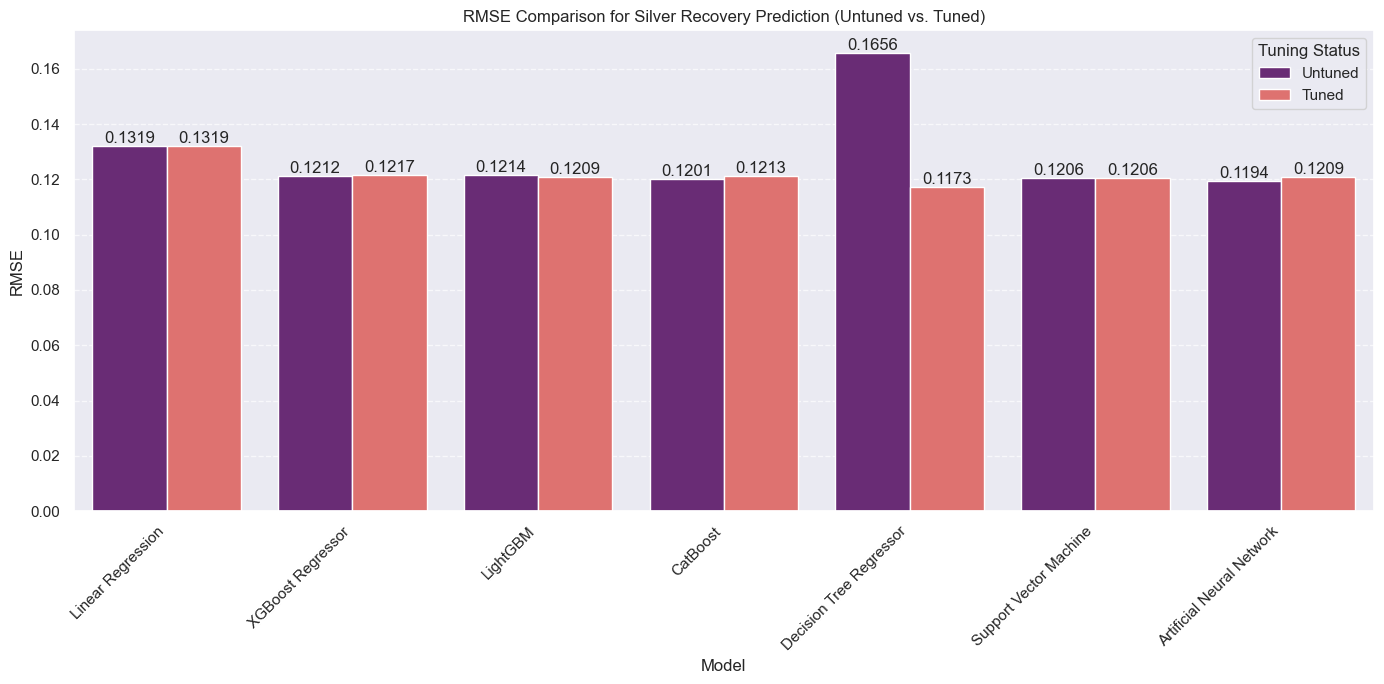




Displaying plots for Target: Silver Ounces Produced
--------------------------------------------------

--- R-squared Comparison for Silver Ounces Produced Prediction (Untuned vs. Tuned) ---



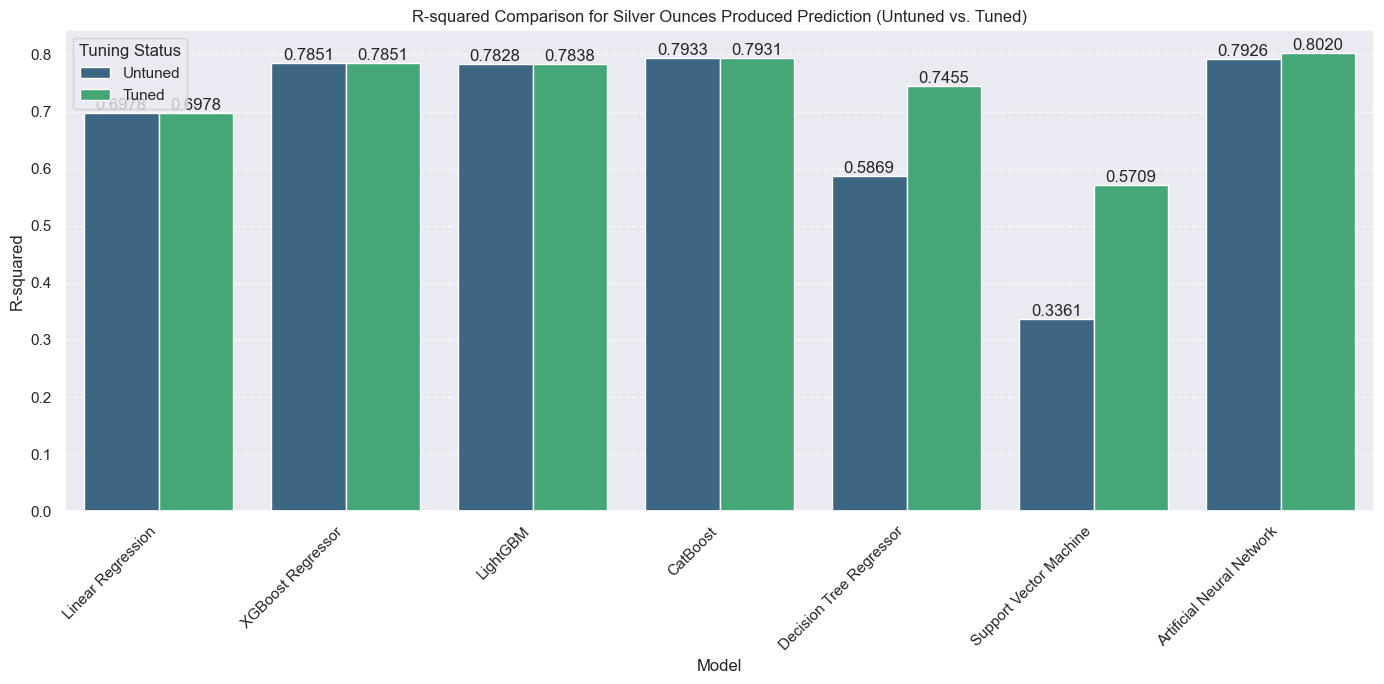



--- RMSE Comparison for Silver Ounces Produced Prediction (Untuned vs. Tuned) ---



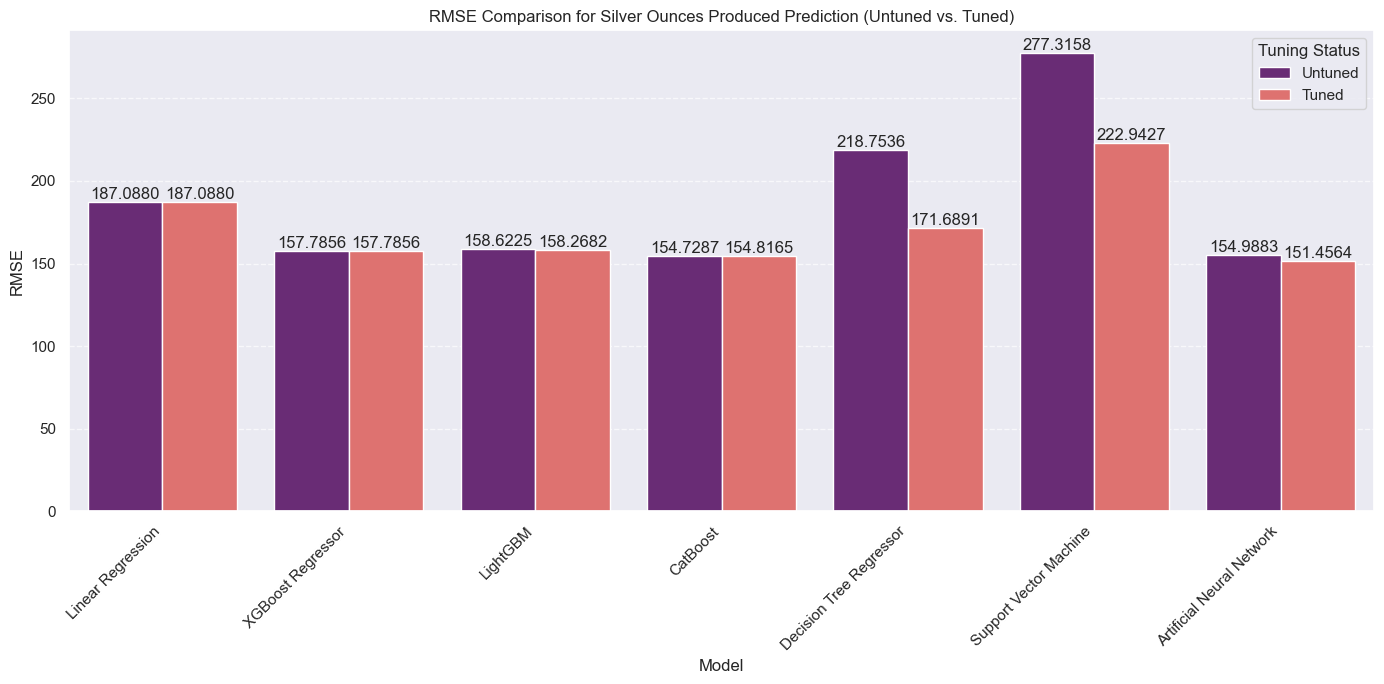




Displaying plots for Target: Mine Tonnage
--------------------------------------------------

--- R-squared Comparison for Mine Tonnage Prediction (Untuned vs. Tuned) ---



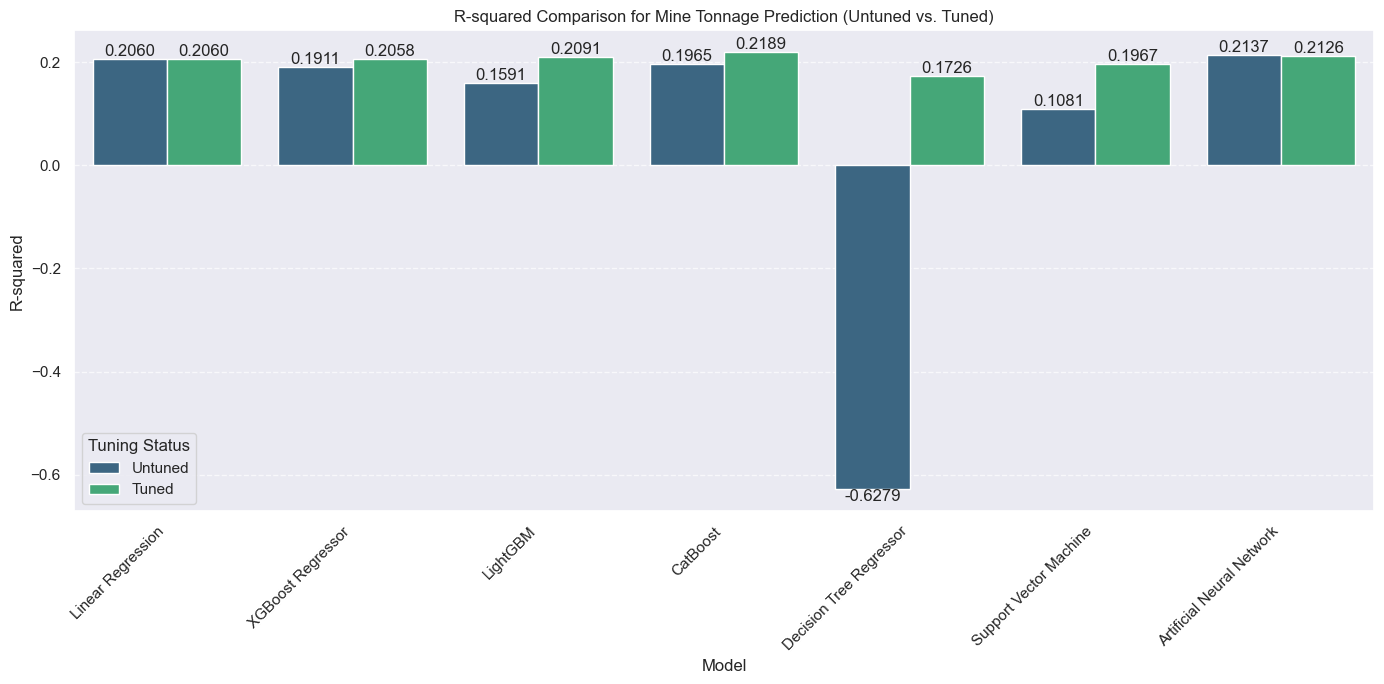



--- RMSE Comparison for Mine Tonnage Prediction (Untuned vs. Tuned) ---



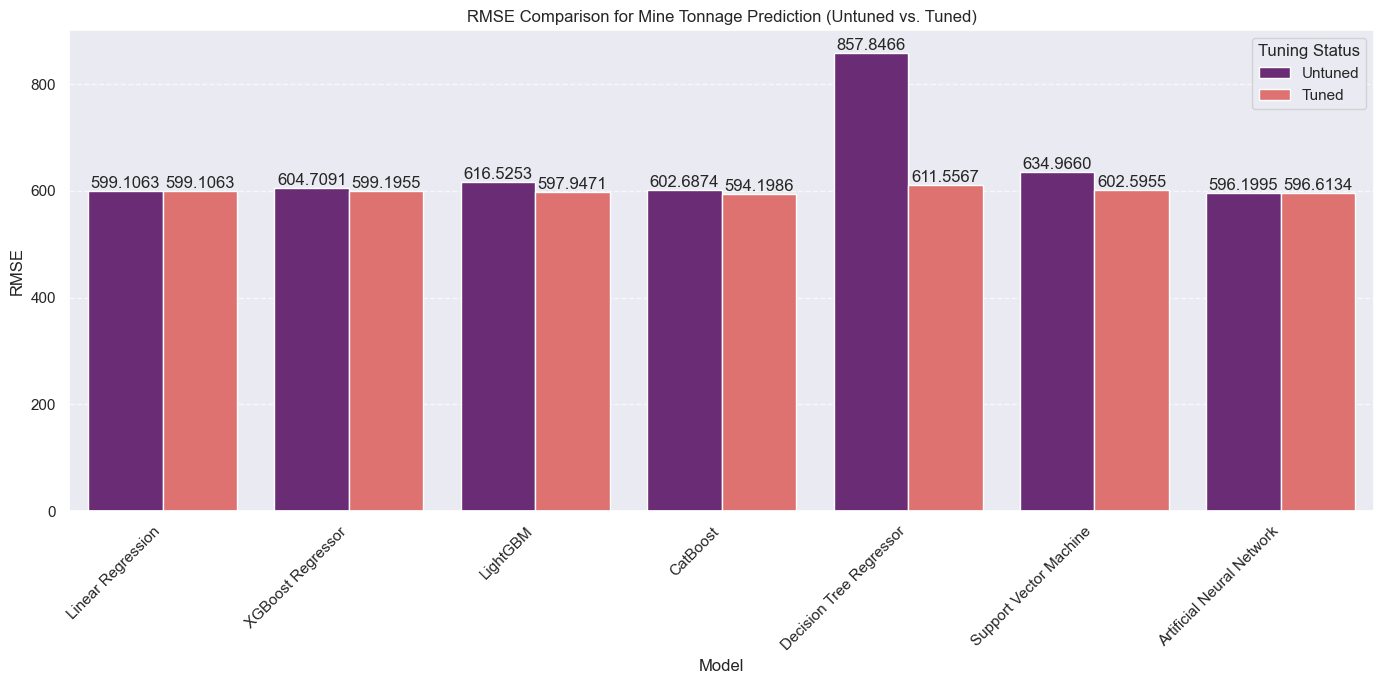



Comparative visualizations for R-squared and RMSE metrics (untuned vs. tuned) generated for all target variables with value labels.


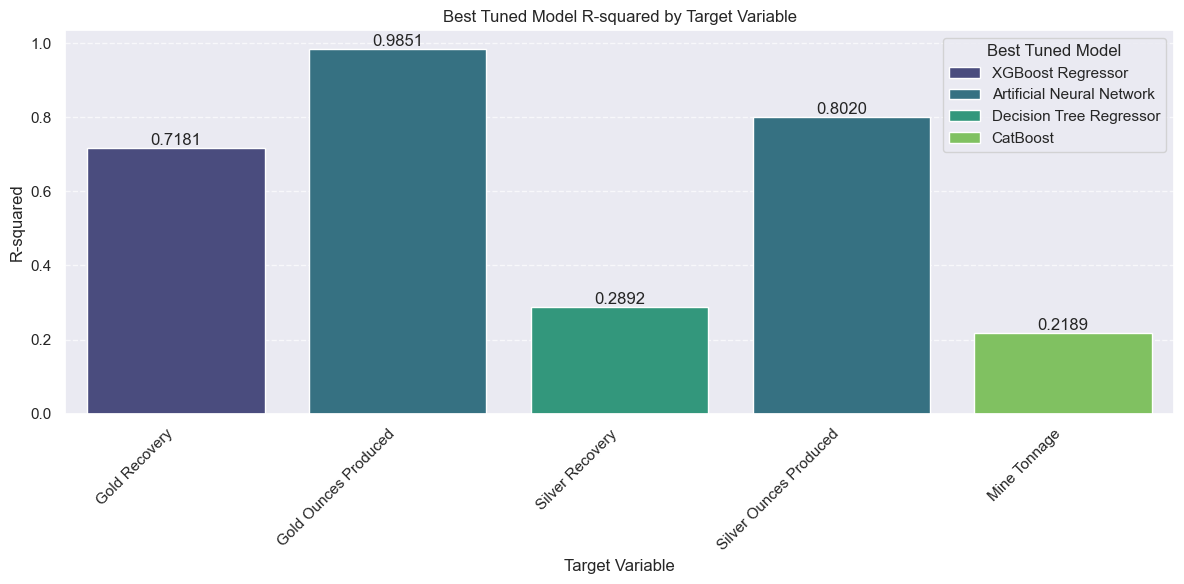

In [18]:
unique_targets = df_combined_performances['Target'].unique()
metrics_to_plot = ['R-squared', 'RMSE']

for target_idx, target in enumerate(unique_targets):
    df_target = df_combined_performances[df_combined_performances['Target'] == target]

    print(f"\n{'='*50}")
    print(f"Displaying plots for Target: {target}")
    print(f"{'-'*50}\n")

    # Plot R-squared
    print(f"--- R-squared Comparison for {target} Prediction (Untuned vs. Tuned) ---\n")
    plt.figure(figsize=(14, 7))
    ax_r2 = sns.barplot(x='Model', y='R-squared', hue='Tuning Status', data=df_target, palette='viridis')
    plt.title(f'R-squared Comparison for {target} Prediction (Untuned vs. Tuned)')
    plt.xlabel('Model')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tuning Status')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Add value labels
    for container in ax_r2.containers:
        ax_r2.bar_label(container, fmt='%.4f', label_type='edge')
    plt.tight_layout()
    plt.show()
    print("\n") # Add extra newline for visual separation

    # Plot RMSE
    print(f"--- RMSE Comparison for {target} Prediction (Untuned vs. Tuned) ---\n")
    plt.figure(figsize=(14, 7))
    ax_rmse = sns.barplot(x='Model', y='RMSE', hue='Tuning Status', data=df_target, palette='magma')
    plt.title(f'RMSE Comparison for {target} Prediction (Untuned vs. Tuned)')
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tuning Status')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Add value labels
    for container in ax_rmse.containers:
        ax_rmse.bar_label(container, fmt='%.4f', label_type='edge')
    plt.tight_layout()
    plt.show()
    print("\n") # Add extra newline for visual separation

print("Comparative visualizations for R-squared and RMSE metrics (untuned vs. tuned) generated for all target variables with value labels.")

# Identify the best tuned model for each target (highest R-squared among tuned models)
best_tuned_models = []
for target in unique_targets:
    df_tuned = df_combined_performances[
        (df_combined_performances['Target'] == target) &
        (df_combined_performances['Tuning Status'] == 'Tuned')
    ]
    if not df_tuned.empty:
        best_row = df_tuned.loc[df_tuned['R-squared'].idxmax()]
        best_tuned_models.append(best_row)

# Create a DataFrame for the best tuned models
df_best_tuned = pd.DataFrame(best_tuned_models)

# Plot R-squared for all best tuned models
plt.figure(figsize=(12, 6))
ax_best = sns.barplot(x='Target', y='R-squared', hue='Model', data=df_best_tuned, palette='viridis')
plt.title('Best Tuned Model R-squared by Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Best Tuned Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax_best.containers:
    ax_best.bar_label(container, fmt='%.4f', label_type='edge')
plt.tight_layout()
plt.show()

## Saving Best Baseline and Tuned Models into JobLib files

In [19]:
import os

# Re-define the models dictionary to get fresh instances of untuned models
untuned_models_templates = {
    'Linear Regression': LinearRegression(),
    'XGBoost Regressor': XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0, iterations=100, learning_rate=0.1, depth=6),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(kernel='rbf'),
    'Artificial Neural Network': MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50), solver='adam', activation='relu', early_stopping=True, n_iter_no_change=50)
}

# Define a dictionary to hold original performance data (untuned)
# This is derived from the `all_model_performances` DataFrame, filtered for 'Untuned'
df_all_performances_untuned = df_combined_performances[df_combined_performances['Tuning Status'] == 'Untuned'].copy()

# Loop through each target variable
for target_name in data_splits.keys(): # Use data_splits keys for consistency
    print(f"\n--- Saving Best Baseline Model for {target_name} ---")

    # Get performances for the current target from untuned models
    target_untuned_performances = df_all_performances_untuned[df_all_performances_untuned['Target'] == target_name]

    # Find the model with the highest R-squared among untuned models for this target
    if not target_untuned_performances.empty:
        best_untuned_model_row = target_untuned_performances.loc[target_untuned_performances['R-squared'].idxmax()]
        best_untuned_model_name = best_untuned_model_row['Model']
        best_untuned_r2_score = best_untuned_model_row['R-squared']

        print(f"Best untuned model for '{target_name}' is '{best_untuned_model_name}' with R-squared: {best_untuned_r2_score:.4f}")

        # Retrieve base model instance (untuned template)
        base_model_untuned = untuned_models_templates[best_untuned_model_name]

        # Get data splits for the chosen target
        X_train = data_splits[target_name]['X_train']
        y_train = data_splits[target_name]['y_train']

        # Create and train the pipeline for the best untuned model
        pipeline_untuned = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', base_model_untuned)
        ])
        pipeline_untuned.fit(X_train, y_train)

        # Save the trained untuned model to a sub-folder named 'models'
        os.makedirs('models', exist_ok=True)
        model_filename = f'models/best_baseline_model_{target_name.replace(" ", "_")}.joblib'
        joblib.dump(pipeline_untuned, model_filename)
        print(f"Saved best baseline model for {target_name} to {model_filename}")
    else:
        print(f"No untuned model performance found for {target_name}.")

    print("\n--- Saving best baseline models complete. ---")



--- Saving Best Baseline Model for Gold Recovery ---
Best untuned model for 'Gold Recovery' is 'CatBoost' with R-squared: 0.7198
Saved best baseline model for Gold Recovery to models/best_baseline_model_Gold_Recovery.joblib

--- Saving best baseline models complete. ---

--- Saving Best Baseline Model for Gold Ounces Produced ---
Best untuned model for 'Gold Ounces Produced' is 'Artificial Neural Network' with R-squared: 0.9832
Saved best baseline model for Gold Ounces Produced to models/best_baseline_model_Gold_Ounces_Produced.joblib

--- Saving best baseline models complete. ---

--- Saving Best Baseline Model for Silver Recovery ---
Best untuned model for 'Silver Recovery' is 'Artificial Neural Network' with R-squared: 0.2634
Saved best baseline model for Silver Recovery to models/best_baseline_model_Silver_Recovery.joblib

--- Saving best baseline models complete. ---

--- Saving Best Baseline Model for Silver Ounces Produced ---
Best untuned model for 'Silver Ounces Produced' is 

### Baseline Models - Actual vs Predicted (Scatter plots)

In [20]:
print("Generating Predicted vs. Actual Plots for Best Baseline Models...")

for target_name in data_splits.keys():
    # 1. Identify the best baseline model for the current target
    target_untuned_performances = df_all_performances[df_all_performances['Target'] == target_name]
    if target_untuned_performances.empty:
        print(f"No baseline model performance found for {target_name}.")
        continue
    best_model_row = target_untuned_performances.loc[target_untuned_performances['R-squared'].idxmax()]
    best_model_name = best_model_row['Model']
    best_r2 = best_model_row['R-squared']

    print(f"\n--- Plotting for Target: {target_name} (Best Baseline Model: {best_model_name}) ---")

    # 2. Load the best baseline model
    model_filename = f'best_baseline_model_{target_name.replace(" ", "_")}.joblib'
    try:
        best_baseline_pipeline = joblib.load(model_filename)
        print(f"Loaded best baseline model for '{target_name}' from '{model_filename}'.")
    except FileNotFoundError:
        print(f"Error: Model file '{model_filename}' not found. Skipping plot for {target_name}.")
        continue

    # 3. Get the corresponding test data
    X_test = data_splits[target_name]['X_test']
    y_test = data_splits[target_name]['y_test']

    # 4. Make predictions
    y_pred = best_baseline_pipeline.predict(X_test)

    # 5. Create the scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    plt.title(f'Actual vs. Predicted for {target_name}\n(Best Baseline Model: {best_model_name}, R-squared: {best_r2:.4f})')
    plt.xlabel(f'Actual {target_name}')
    plt.ylabel(f'Predicted {target_name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("\nAll Predicted vs. Actual plots for baseline models generated.")


Generating Predicted vs. Actual Plots for Best Baseline Models...

--- Plotting for Target: Gold Recovery (Best Baseline Model: CatBoost) ---
Error: Model file 'best_baseline_model_Gold_Recovery.joblib' not found. Skipping plot for Gold Recovery.

--- Plotting for Target: Gold Ounces Produced (Best Baseline Model: Artificial Neural Network) ---
Error: Model file 'best_baseline_model_Gold_Ounces_Produced.joblib' not found. Skipping plot for Gold Ounces Produced.

--- Plotting for Target: Silver Recovery (Best Baseline Model: Artificial Neural Network) ---
Error: Model file 'best_baseline_model_Silver_Recovery.joblib' not found. Skipping plot for Silver Recovery.

--- Plotting for Target: Silver Ounces Produced (Best Baseline Model: CatBoost) ---
Error: Model file 'best_baseline_model_Silver_Ounces_Produced.joblib' not found. Skipping plot for Silver Ounces Produced.

--- Plotting for Target: Mine Tonnage (Best Baseline Model: Artificial Neural Network) ---
Error: Model file 'best_baseli

### Hyperparameter Tuned Models - Actual vs Predicted (Scatter plots)

Generating Predicted vs. Actual Plots for Best Tuned Models...

--- Plotting for Target: Gold Recovery (Best Model: XGBoost Regressor) ---
Loaded best tuned model for 'Gold Recovery' from 'models/best_model_Gold_Recovery.joblib'.


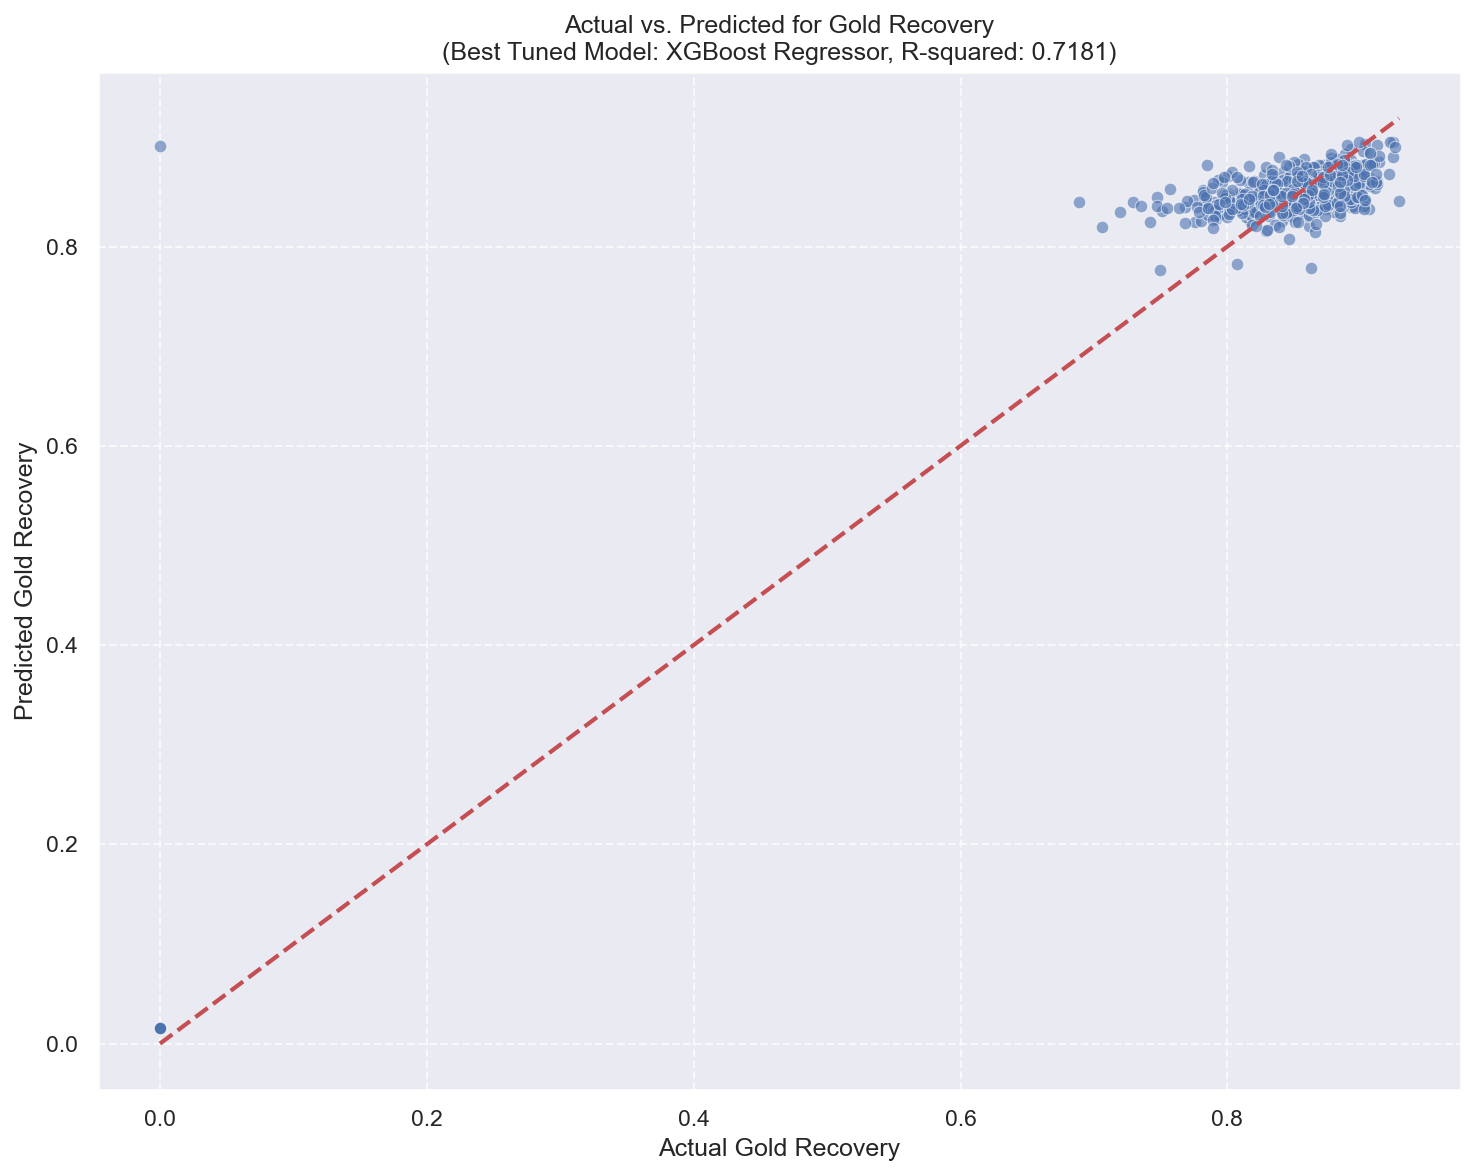


--- Plotting for Target: Gold Ounces Produced (Best Model: Artificial Neural Network) ---
Loaded best tuned model for 'Gold Ounces Produced' from 'models/best_model_Gold_Ounces_Produced.joblib'.


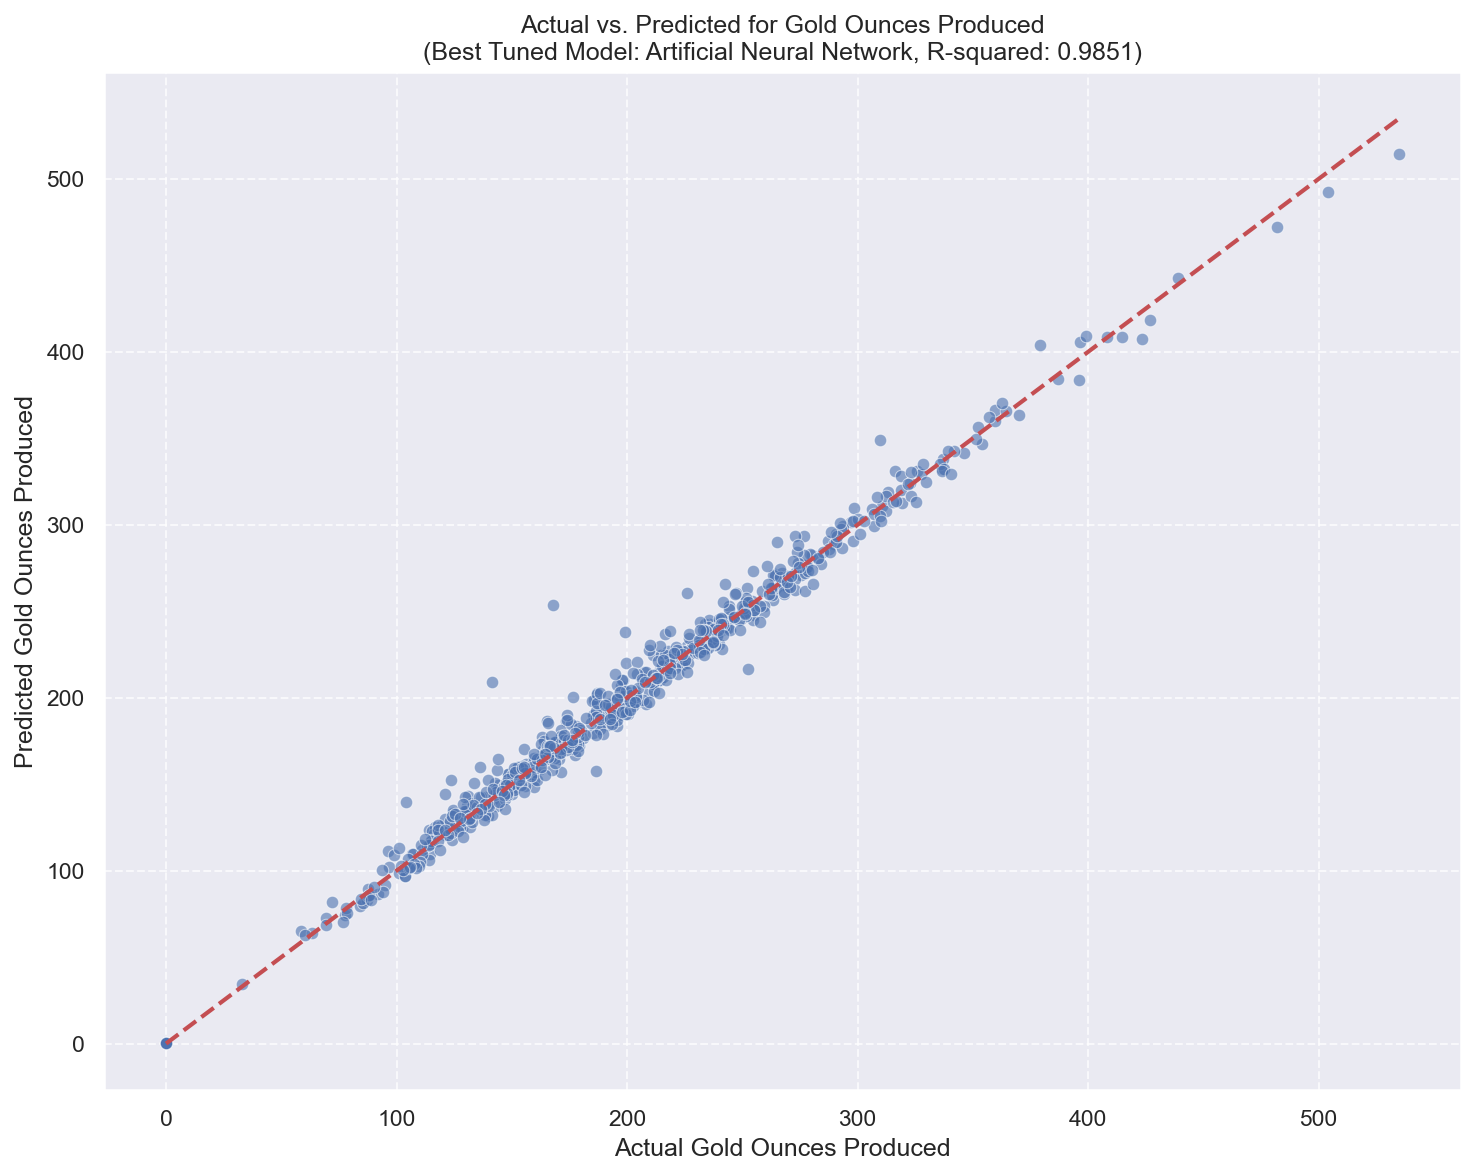


--- Plotting for Target: Silver Recovery (Best Model: Decision Tree Regressor) ---
Loaded best tuned model for 'Silver Recovery' from 'models/best_model_Silver_Recovery.joblib'.


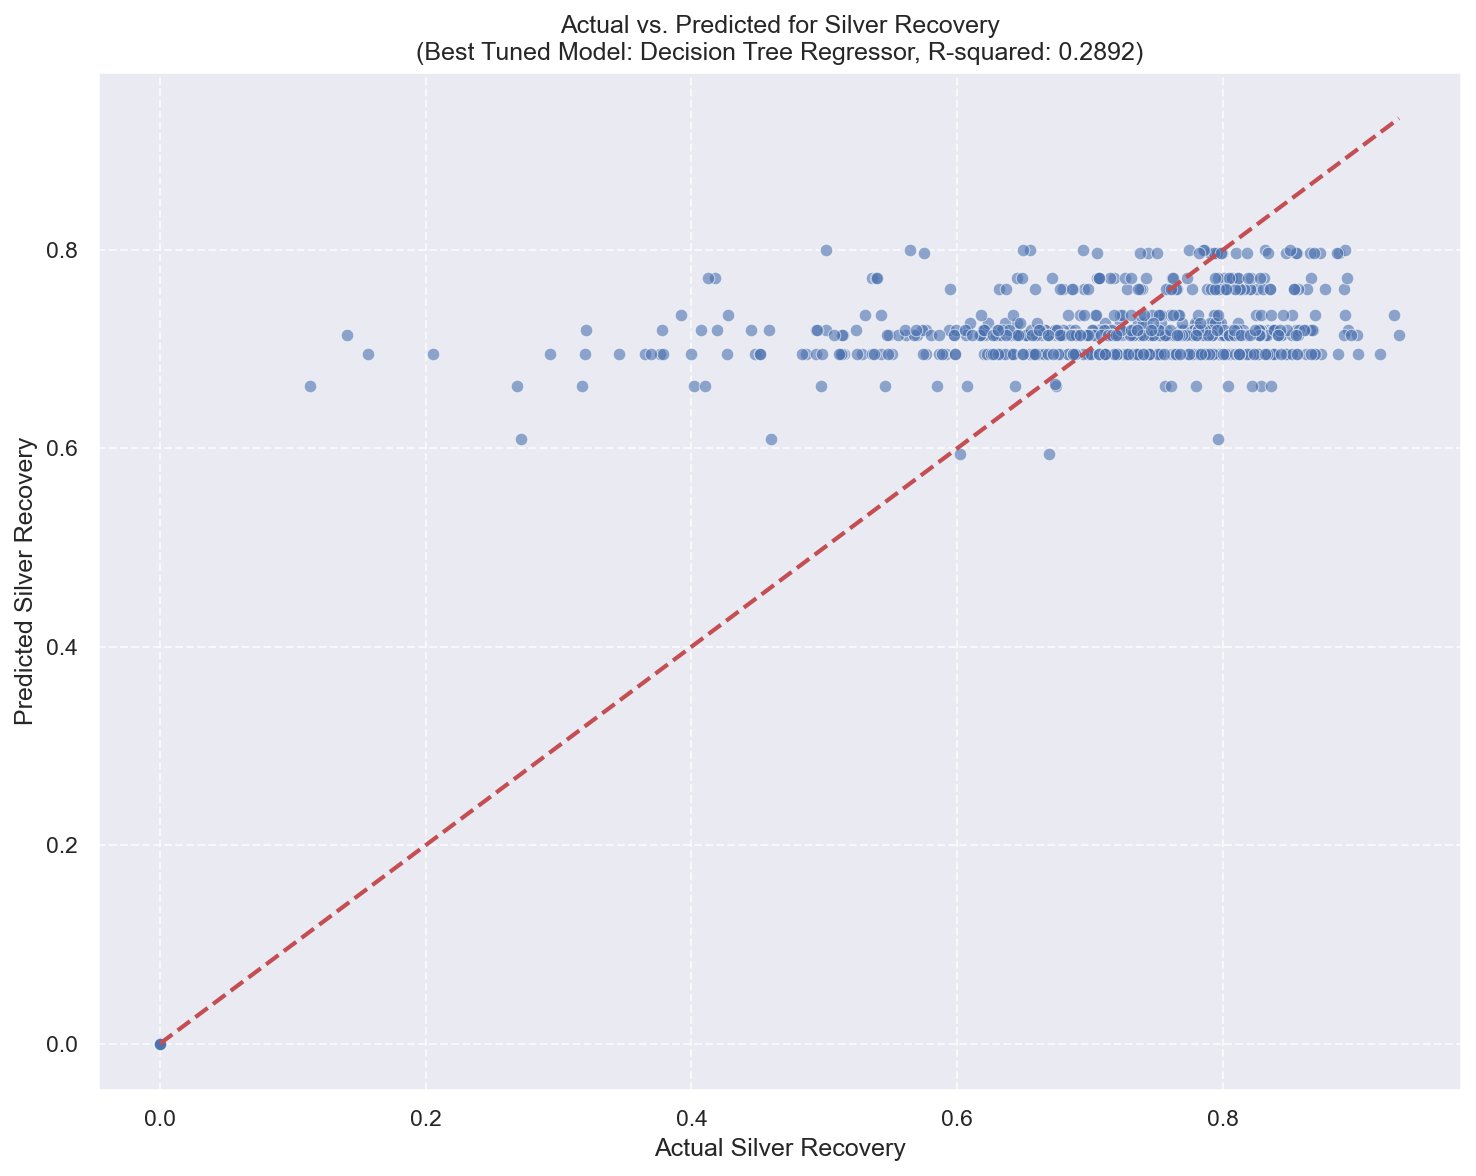


--- Plotting for Target: Silver Ounces Produced (Best Model: Artificial Neural Network) ---
Loaded best tuned model for 'Silver Ounces Produced' from 'models/best_model_Silver_Ounces_Produced.joblib'.


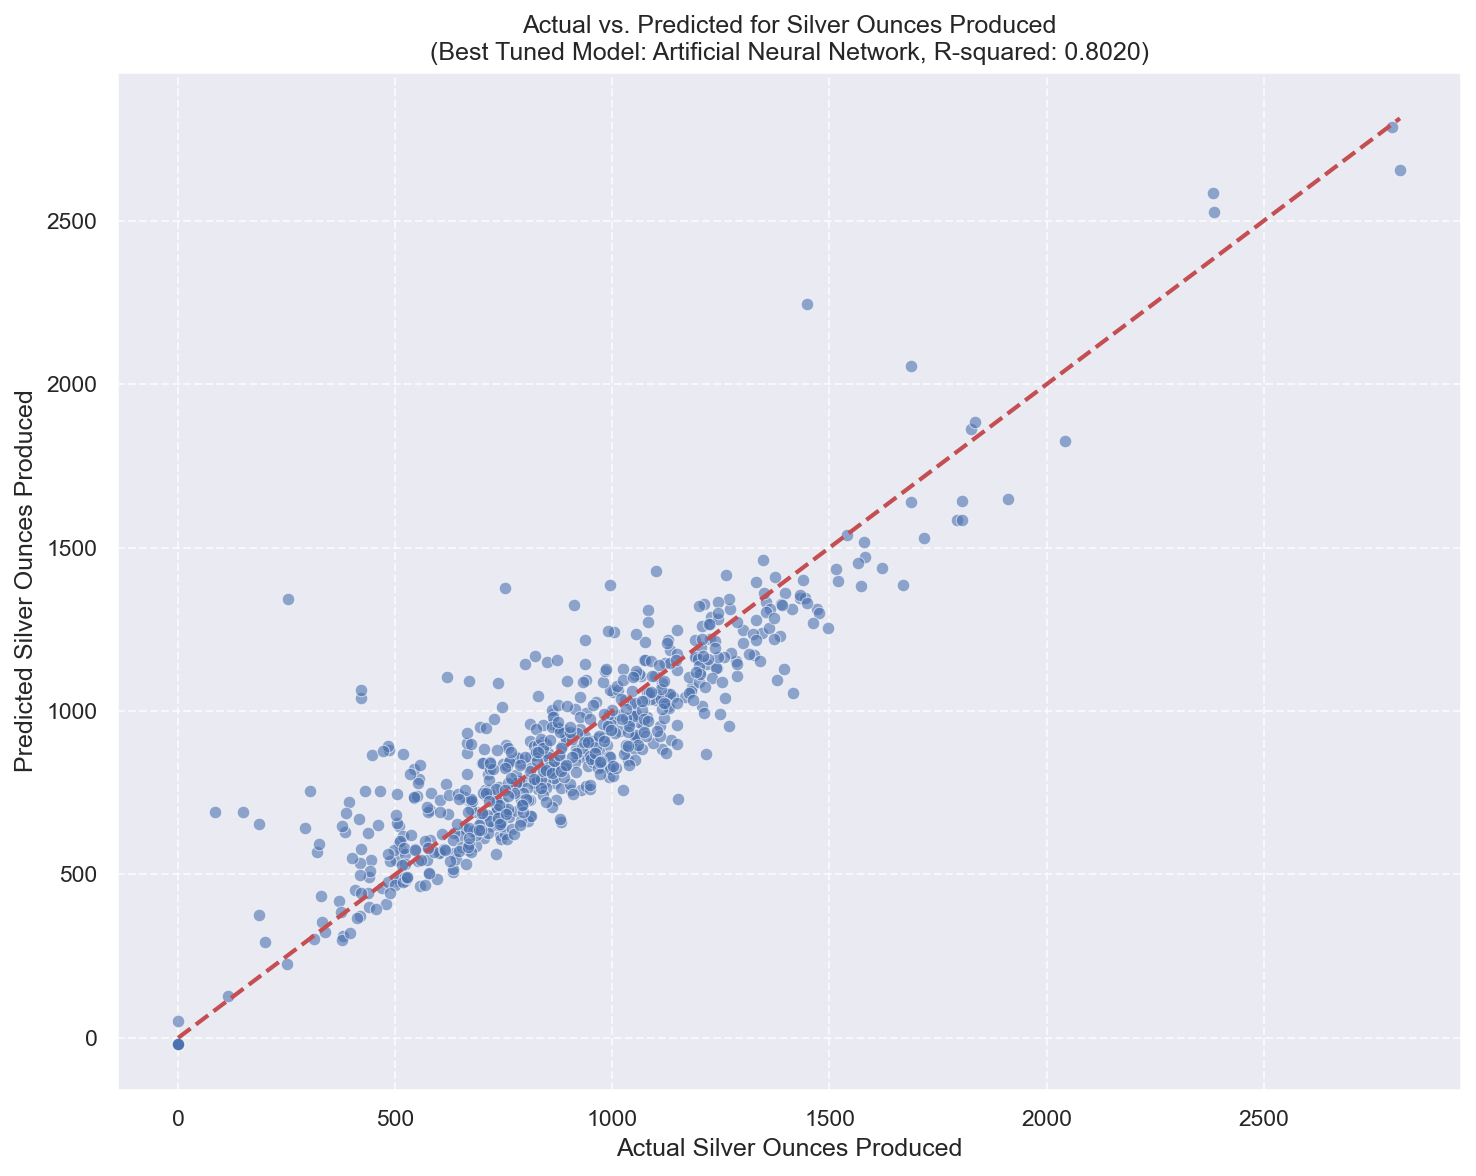


--- Plotting for Target: Mine Tonnage (Best Model: CatBoost) ---
Loaded best tuned model for 'Mine Tonnage' from 'models/best_model_Mine_Tonnage.joblib'.


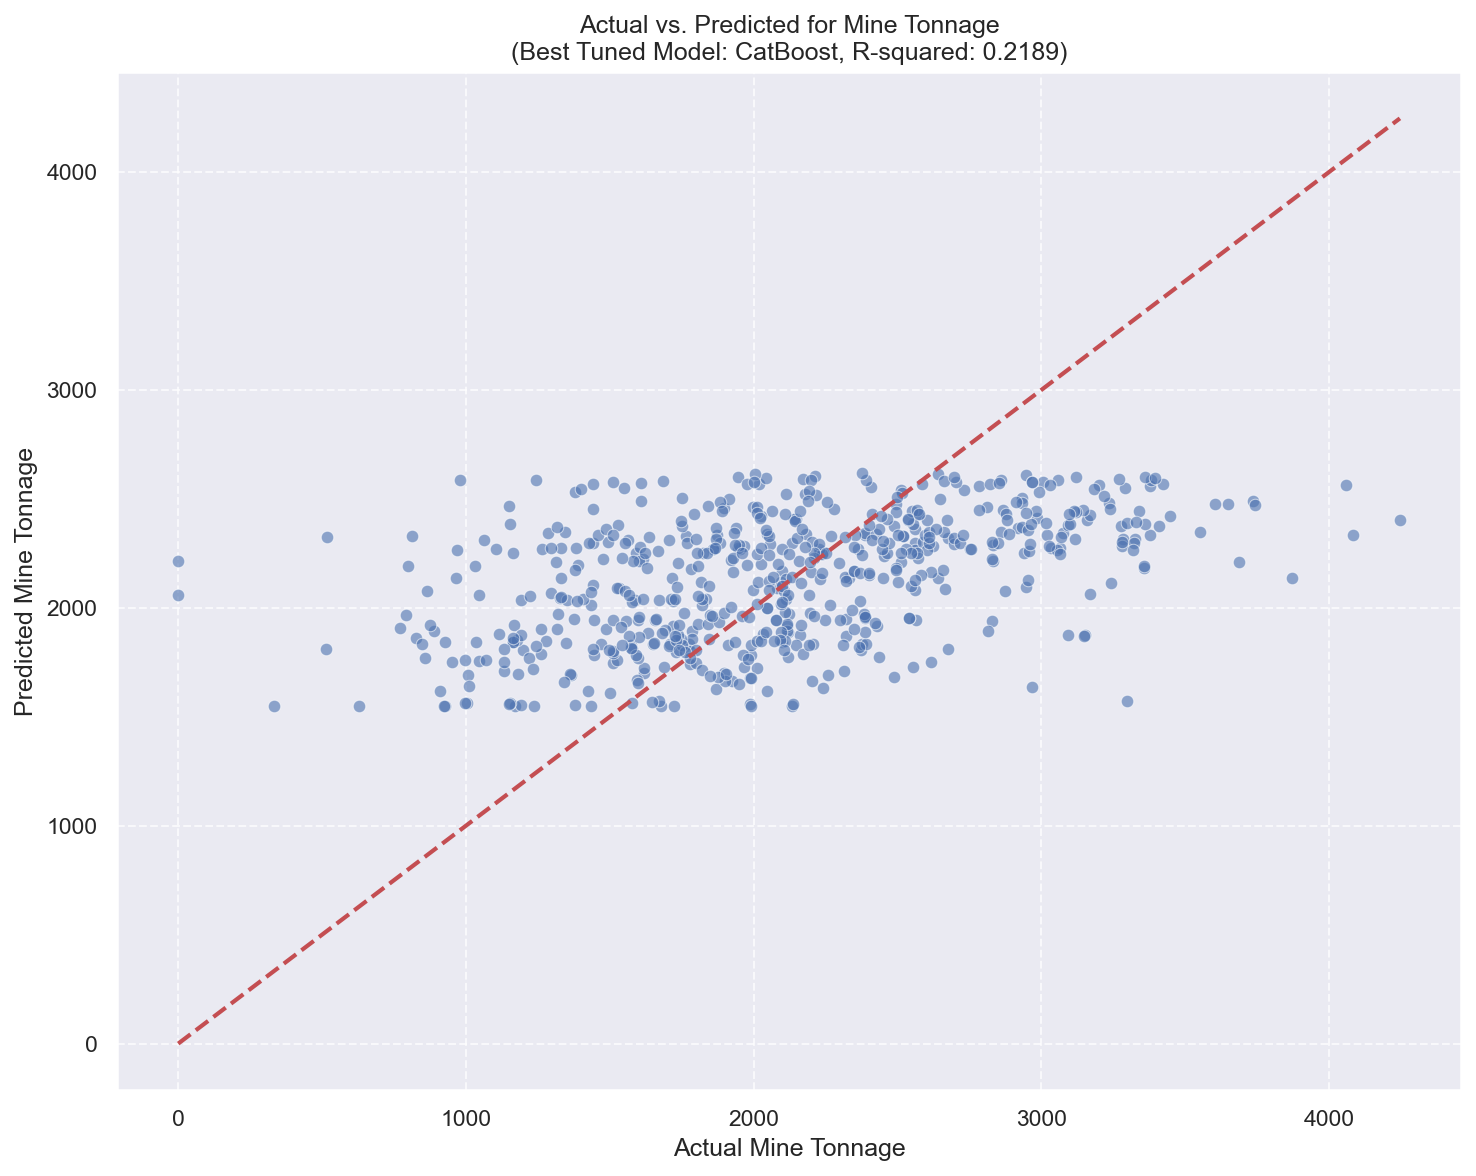


All Predicted vs. Actual plots generated.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
from sklearn.metrics import r2_score

# Ensure data_splits, tuned_model_performances, tuned_model_best_params are defined from previous steps
# If running this cell independently, you might need to re-execute relevant cells or load these variables.

print("Generating Predicted vs. Actual Plots for Best Tuned Models...")

plt.rcParams["figure.dpi"] = 150 # Adjust DPI for better plot quality
plt.rcParams["savefig.dpi"] = 150

for target_name in tuned_model_performances.keys():
    # 1. Identify the best tuned model for the current target
    target_models_perf = tuned_model_performances[target_name]
    best_model_name = max(target_models_perf, key=lambda model: target_models_perf[model]['R-squared'])
    best_r2 = target_models_perf[best_model_name]['R-squared']

    print(f"\n--- Plotting for Target: {target_name} (Best Model: {best_model_name}) ---")

    # 2. Load the best-tuned model
    model_filename = f'models/best_model_{target_name.replace(" ", "_")}.joblib'
    try:
        best_tuned_pipeline = joblib.load(model_filename)
        print(f"Loaded best tuned model for '{target_name}' from '{model_filename}'.")
    except FileNotFoundError:
        print(f"Error: Model file '{model_filename}' not found. Skipping plot for {target_name}.")
        continue

    # 3. Get the corresponding test data
    X_test = data_splits[target_name]['X_test']
    y_test = data_splits[target_name]['y_test']

    # 4. Make predictions
    y_pred = best_tuned_pipeline.predict(X_test)

    # 5. Create the scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for perfect prediction

    plt.title(f'Actual vs. Predicted for {target_name}\n(Best Tuned Model: {best_model_name}, R-squared: {best_r2:.4f})')
    plt.xlabel(f'Actual {target_name}')
    plt.ylabel(f'Predicted {target_name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("\nAll Predicted vs. Actual plots generated.")

## Step 5 - Critical Thinking → Ethical AI & Bias Auditing

* Propose mitigations (reweighting, thresholds, augmentation, post-processing).


Substep/s:
1. Explain model decisions (SHAP, LIME, PDP, ICE).
    * SHAP:
      1. Install and import shap model
      2. Run SHAP for the tuned models
      3. Explain the model decisions and feature importance (placed at the summary part)

2. Address limitations (imbalance, leakage, overfitting)
      * Imbalance: due to the dataset not having to deal with different observable domains, the model is observed to not have any characteristics of imbalance.
      * Leakage: this is largely mitigated with the built-in Cross-Validation during our Hyperparameter Tuning.
      * Overfitting: this is largely also mitigated with the built-in Cross-Validation during our Hyperparameter Tuning.
3. Bias detection & fairness audits:
      * The dataset in itself does not contain any input on age, gender, race which would have societal and ethical implications, therefore this step was foregone.
      * If in the case of misrepresentation of data populations of our mine-production and mill-data, it can be observed in the histogram plots on Step 2 that most of the data follows a normal-distribution and some slightly skewed to the right. This can be log-transformed for the skewed dataset if needed.
4. Deliverable: "Bias & Fairness Analysis" section in the final report.
      * The dataset in itself does not contain any input on age, gender, race which would have societal and ethical implications, therefore this step was foregone.

In [22]:
import sys
!{sys.executable} -m pip install shap

print("SHAP library installed successfully.")
import shap
print("SHAP library loaded successfully.")

SHAP library installed successfully.
SHAP library loaded successfully.


'C:\Users\Jose' is not recognized as an internal or external command,
operable program or batch file.



Best model for Gold Recovery: XGBoost Regressor (R-squared: 0.7181)
Saved best model for Gold Recovery to models/best_model_Gold_Recovery.joblib
Generating SHAP explanations for Gold Recovery using XGBoost Regressor...


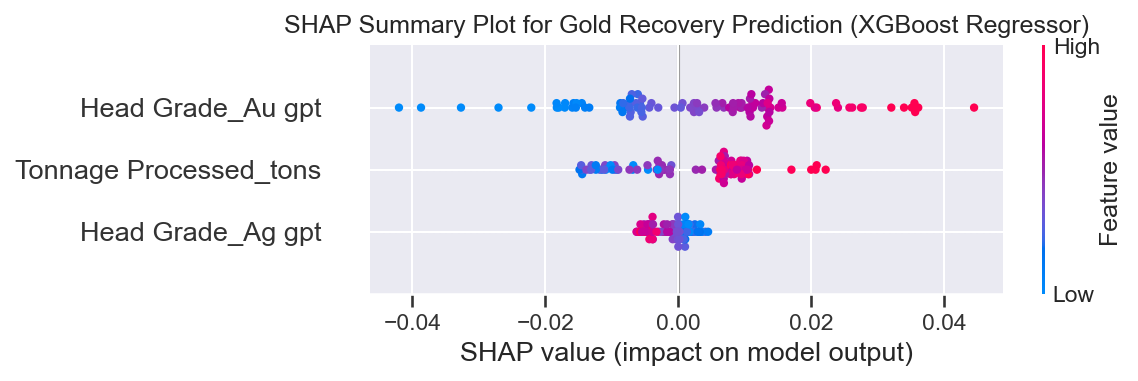

Generating SHAP Force Plots for Gold Recovery...


<Figure size 1800x600 with 0 Axes>

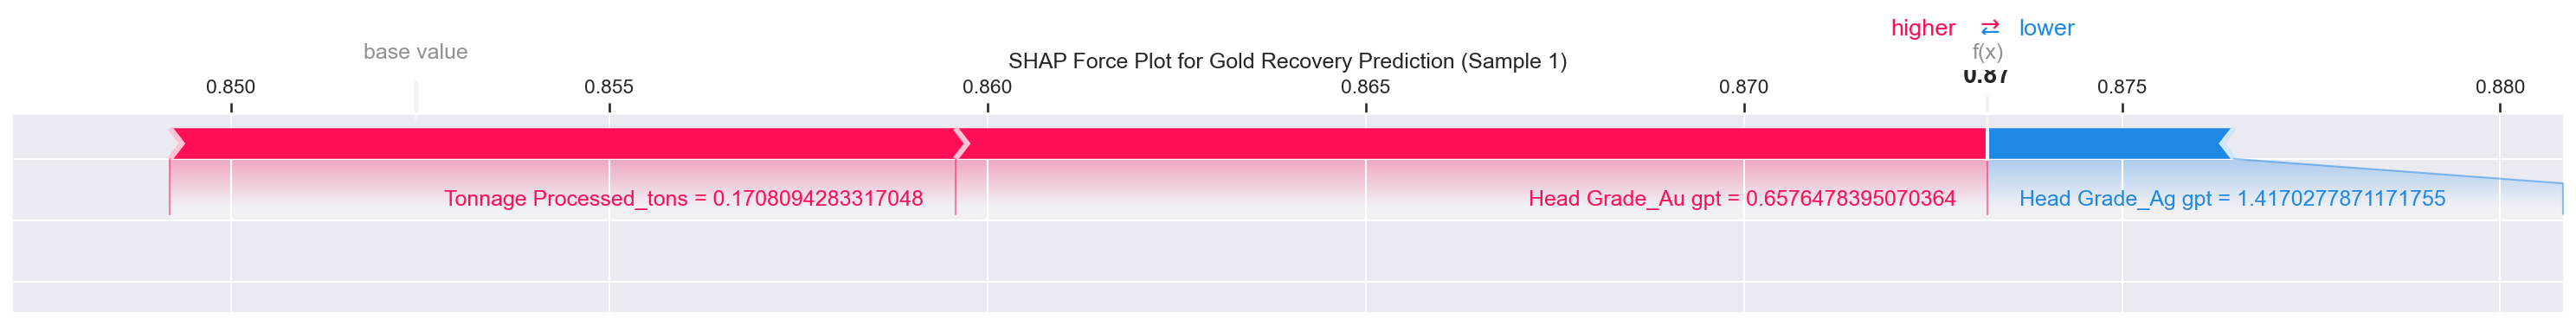

<Figure size 1800x600 with 0 Axes>

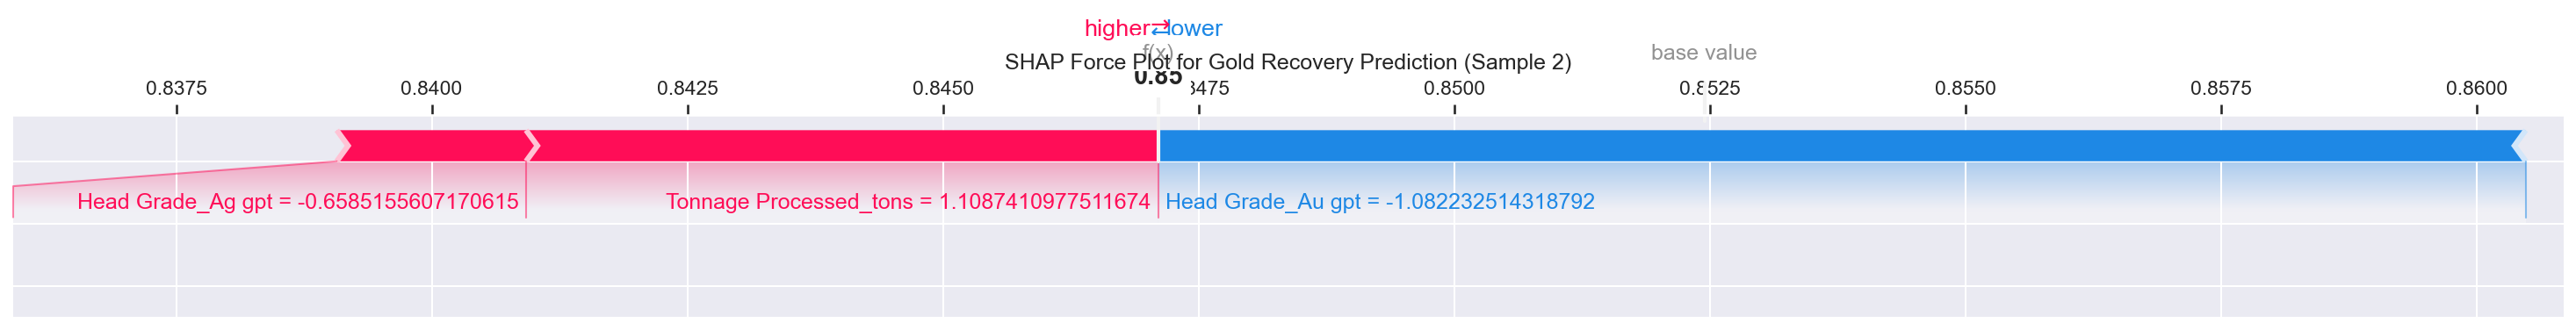

<Figure size 1800x600 with 0 Axes>

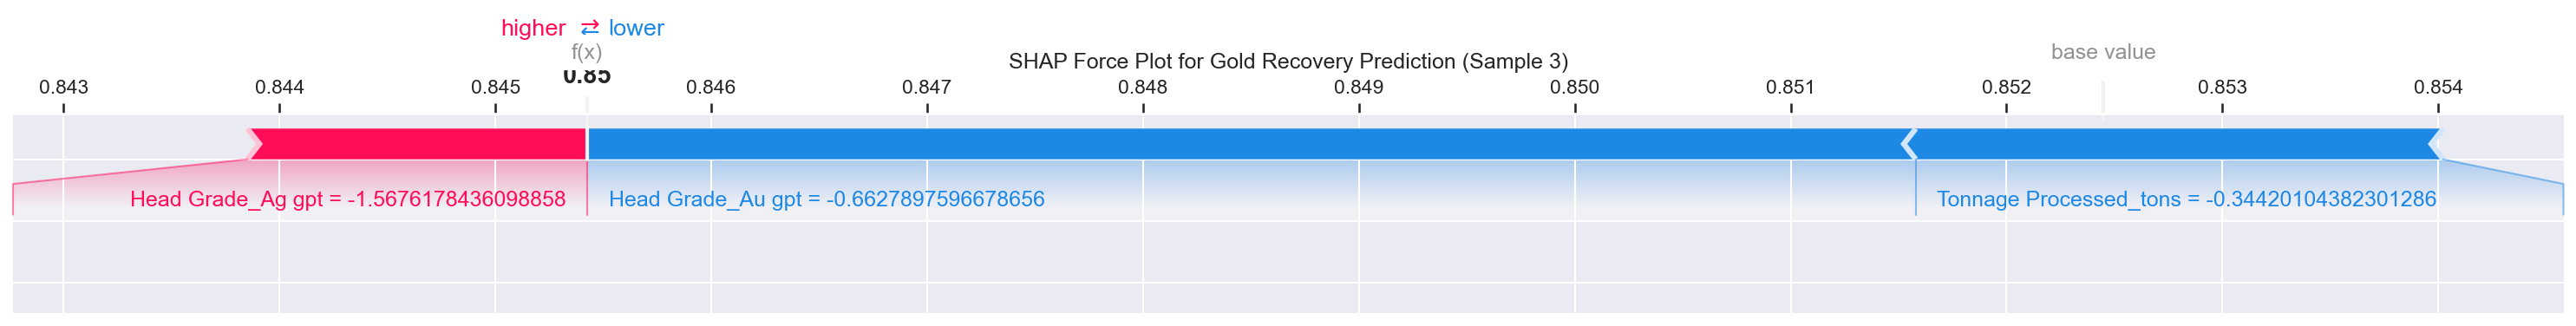

SHAP explanations generated for Gold Recovery.

Best model for Gold Ounces Produced: Artificial Neural Network (R-squared: 0.9851)
Saved best model for Gold Ounces Produced to models/best_model_Gold_Ounces_Produced.joblib


  0%|          | 0/100 [00:00<?, ?it/s]

Generating SHAP explanations for Gold Ounces Produced using Artificial Neural Network...


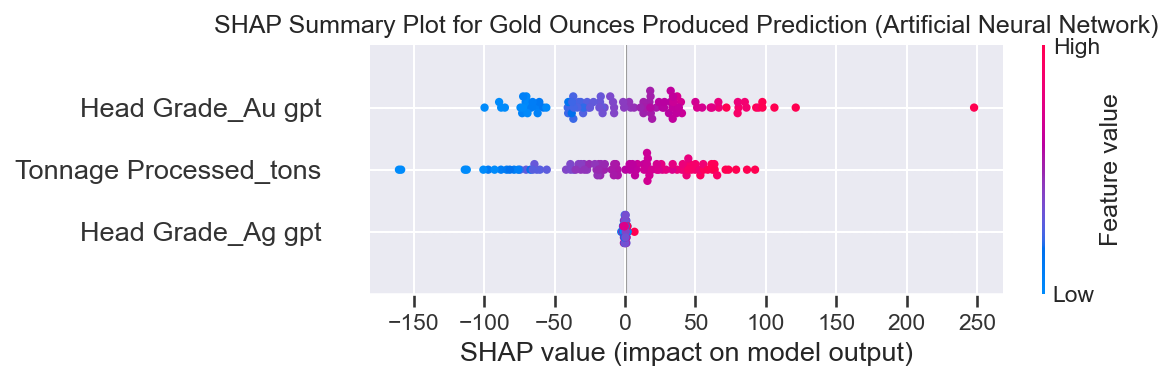

Generating SHAP Force Plots for Gold Ounces Produced...


<Figure size 1800x600 with 0 Axes>

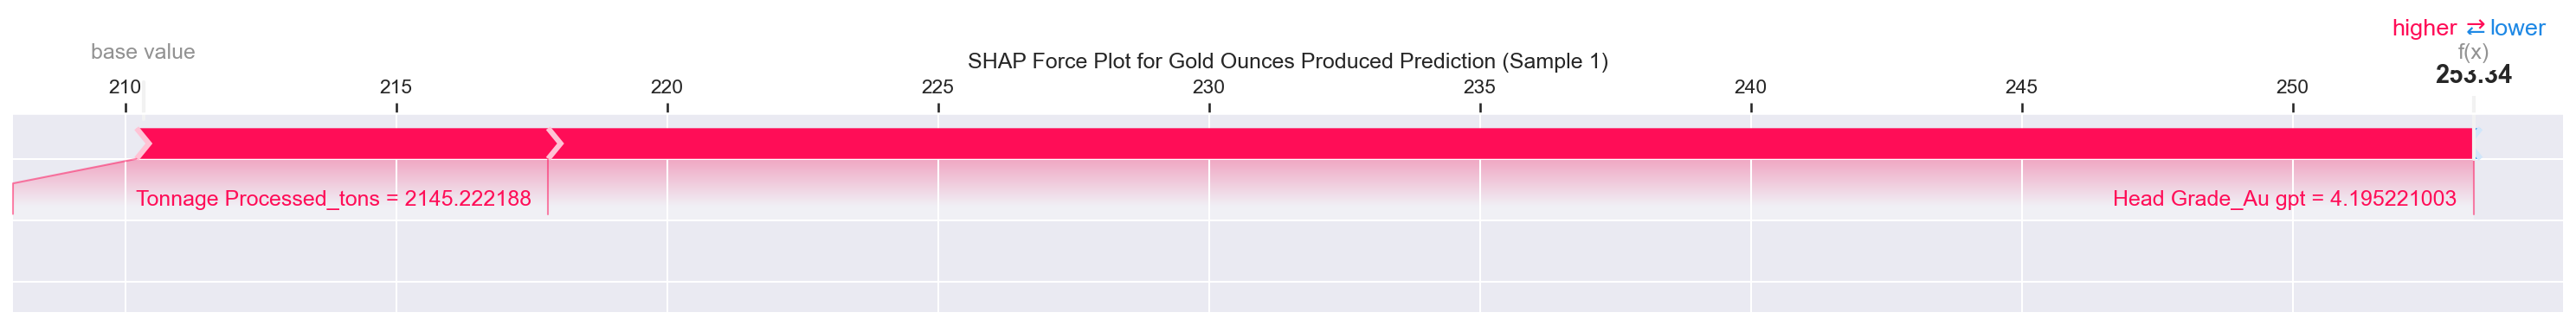

<Figure size 1800x600 with 0 Axes>

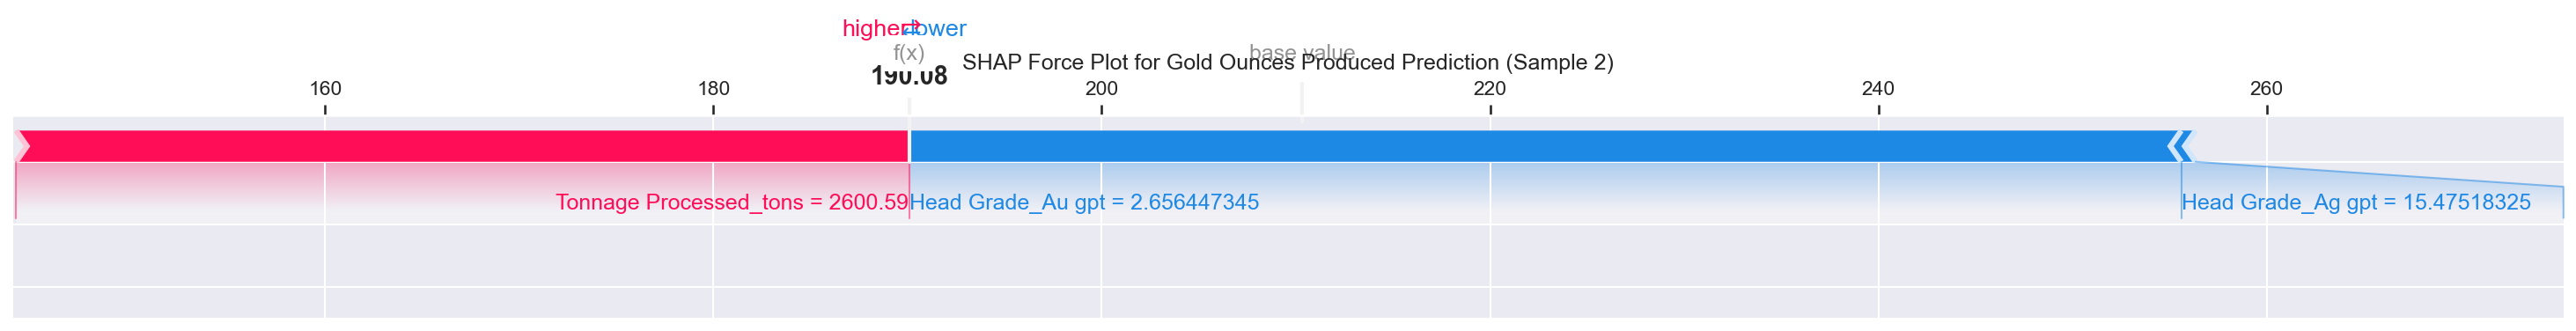

<Figure size 1800x600 with 0 Axes>

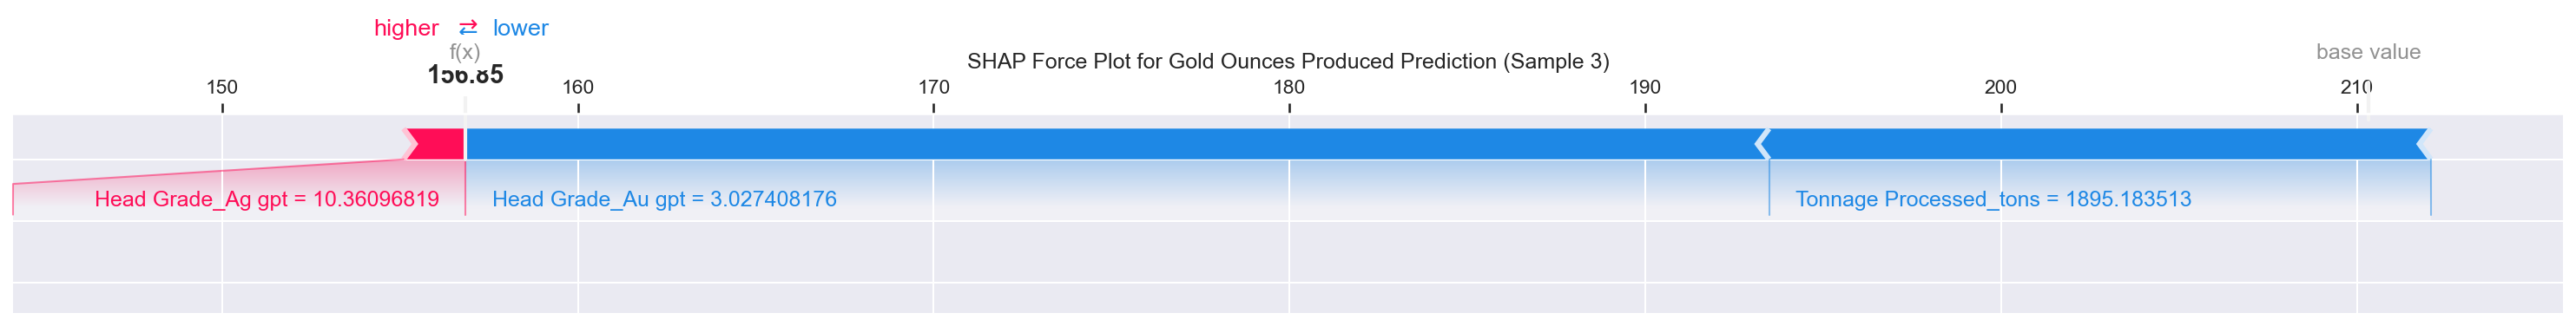

SHAP explanations generated for Gold Ounces Produced.

Best model for Silver Recovery: Decision Tree Regressor (R-squared: 0.2892)
Saved best model for Silver Recovery to models/best_model_Silver_Recovery.joblib
Generating SHAP explanations for Silver Recovery using Decision Tree Regressor...


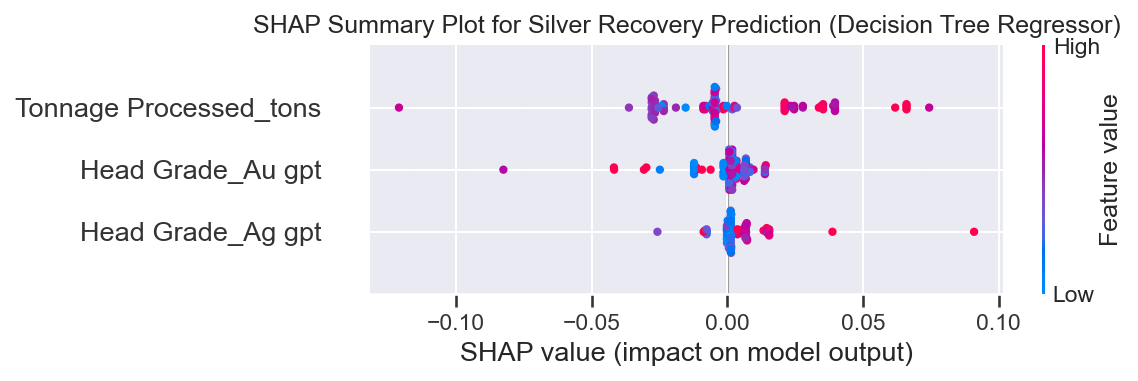

Generating SHAP Force Plots for Silver Recovery...


<Figure size 1800x600 with 0 Axes>

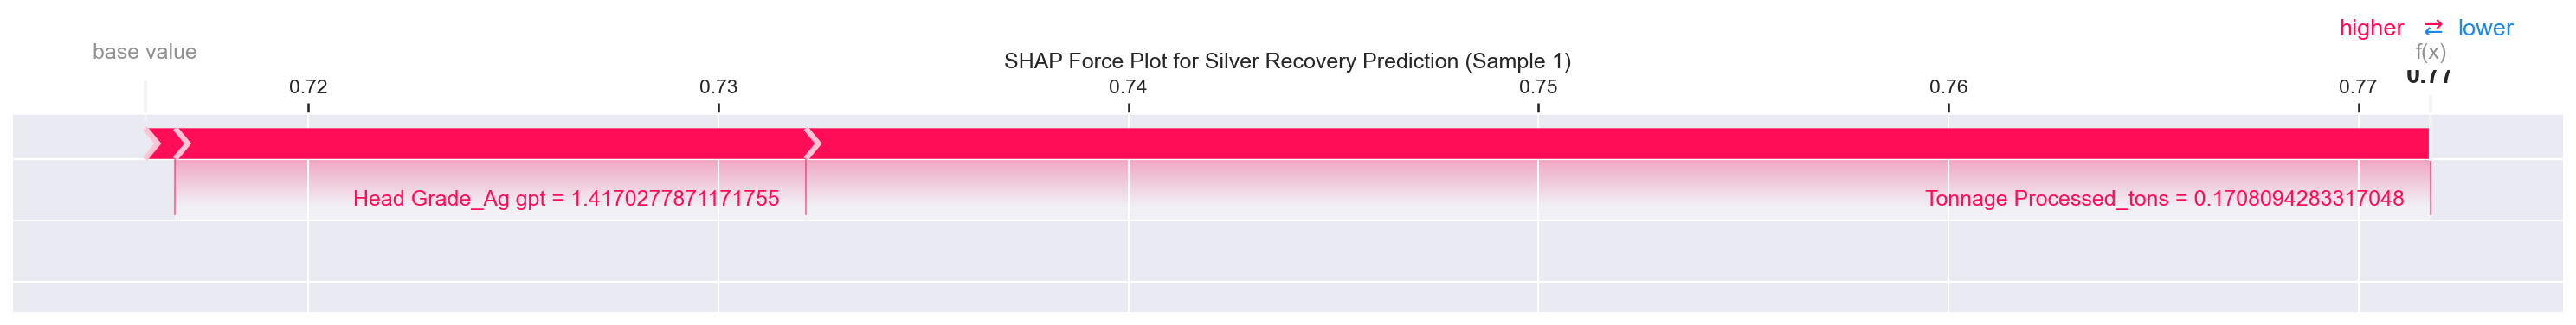

<Figure size 1800x600 with 0 Axes>

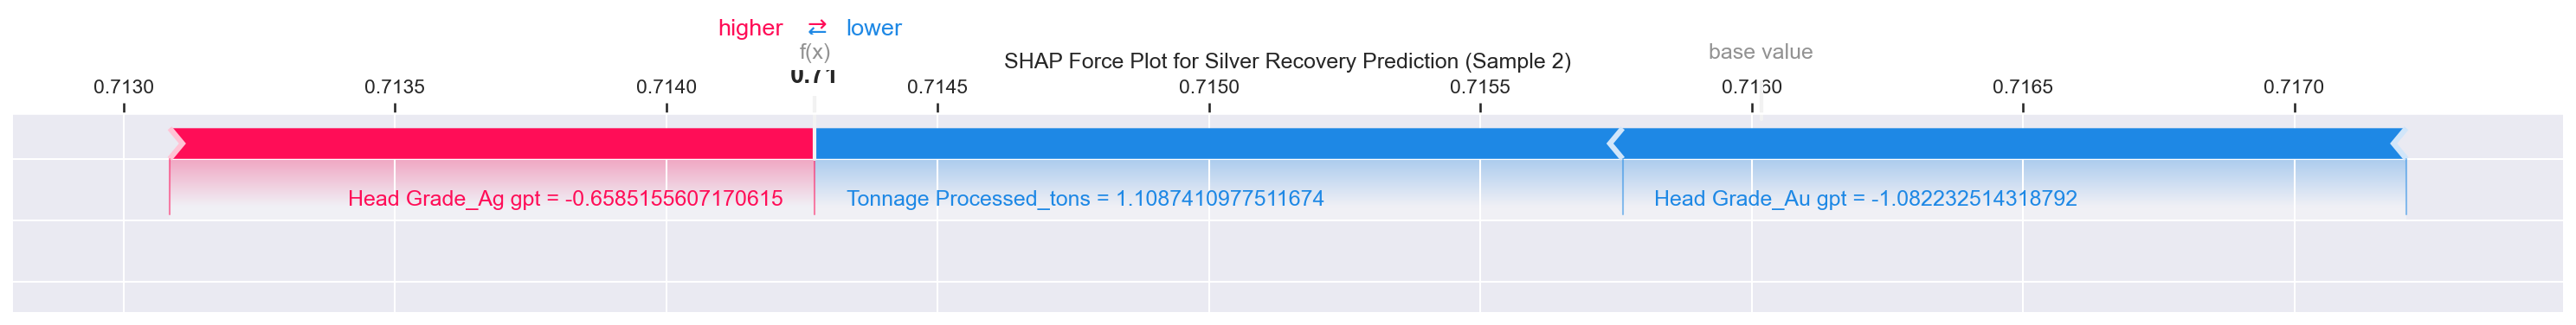

<Figure size 1800x600 with 0 Axes>

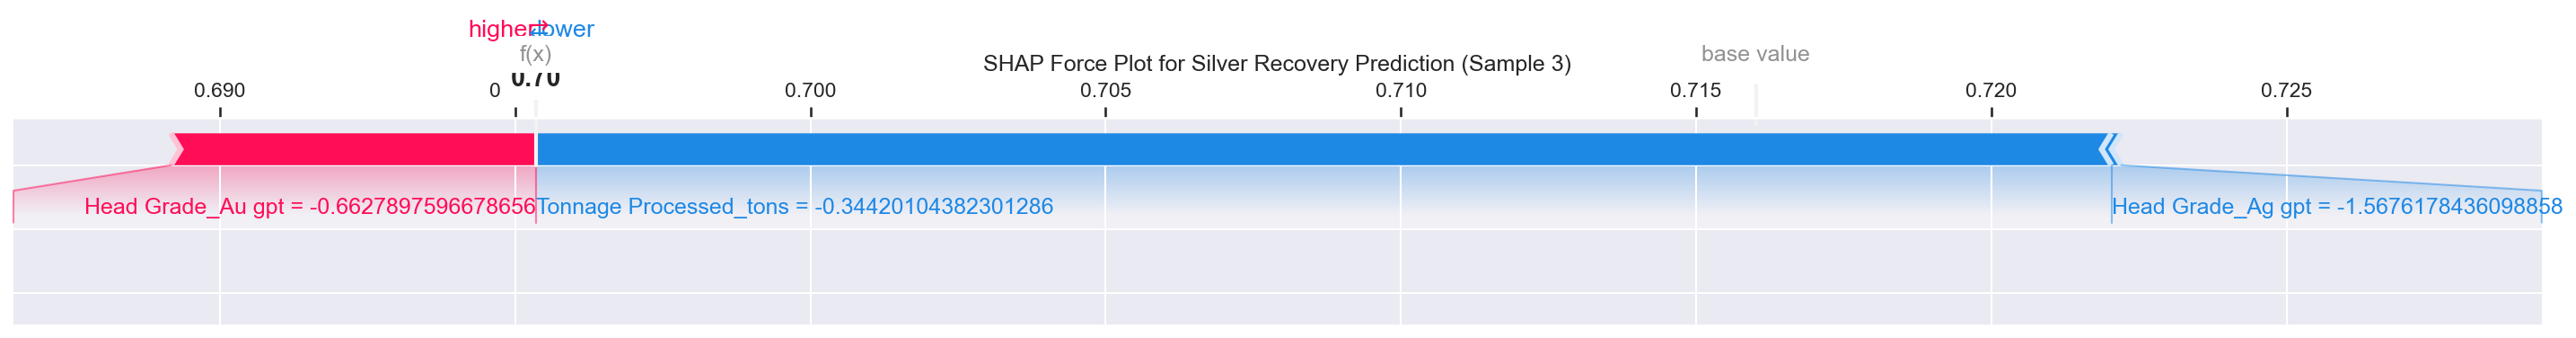

SHAP explanations generated for Silver Recovery.

Best model for Silver Ounces Produced: Artificial Neural Network (R-squared: 0.8020)
Saved best model for Silver Ounces Produced to models/best_model_Silver_Ounces_Produced.joblib


  0%|          | 0/100 [00:00<?, ?it/s]

Generating SHAP explanations for Silver Ounces Produced using Artificial Neural Network...


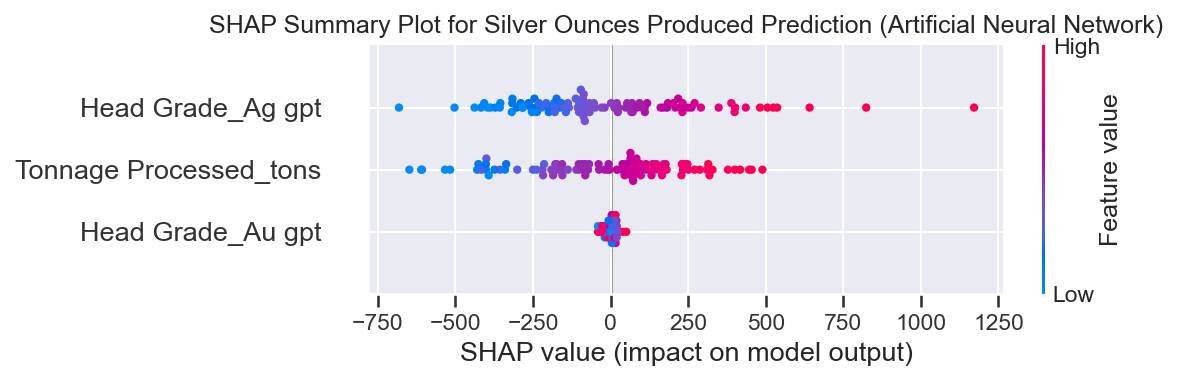

Generating SHAP Force Plots for Silver Ounces Produced...


<Figure size 1800x600 with 0 Axes>

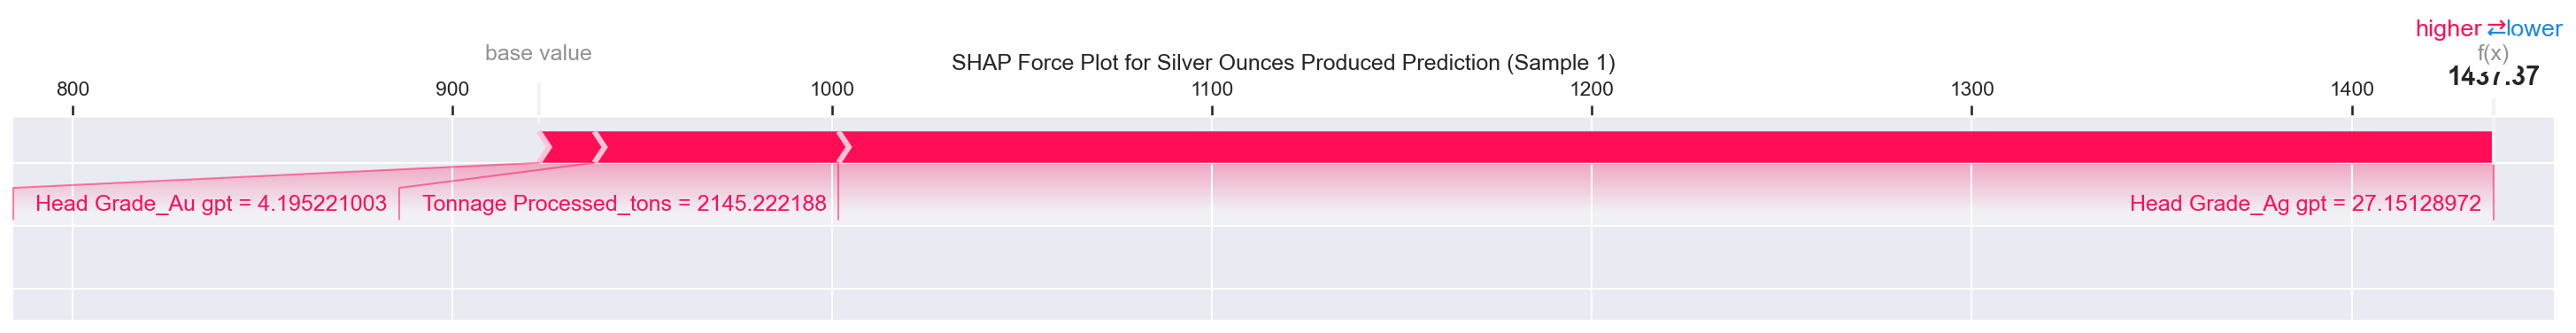

<Figure size 1800x600 with 0 Axes>

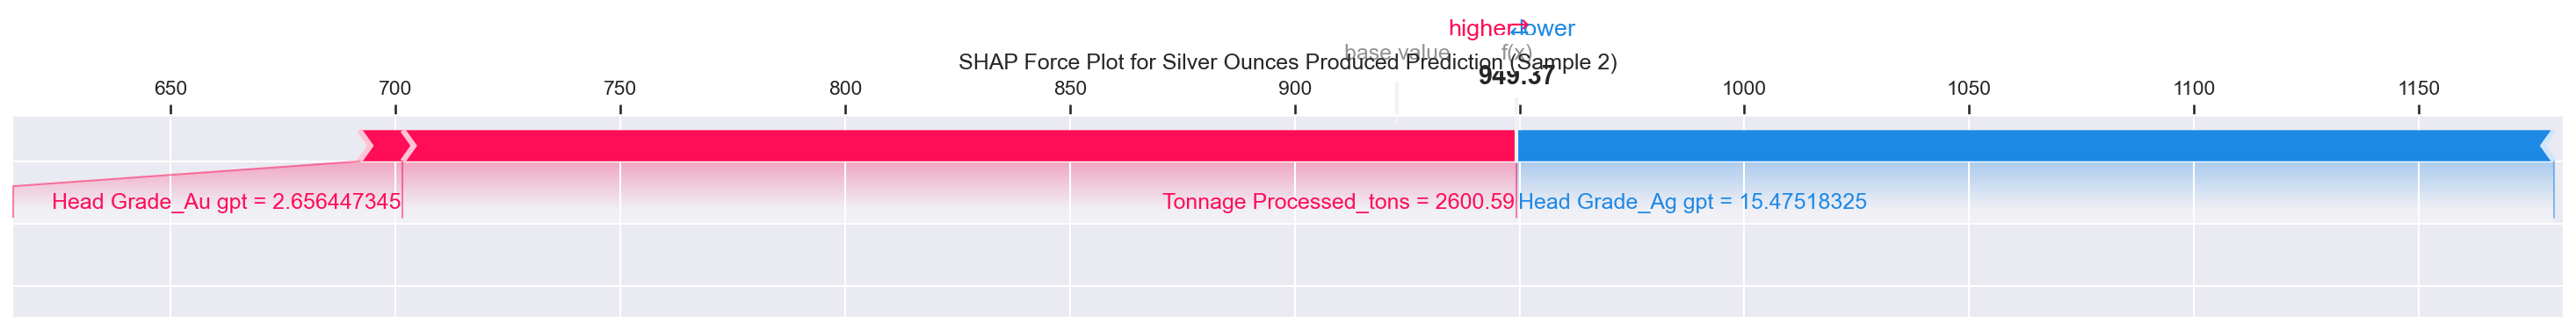

<Figure size 1800x600 with 0 Axes>

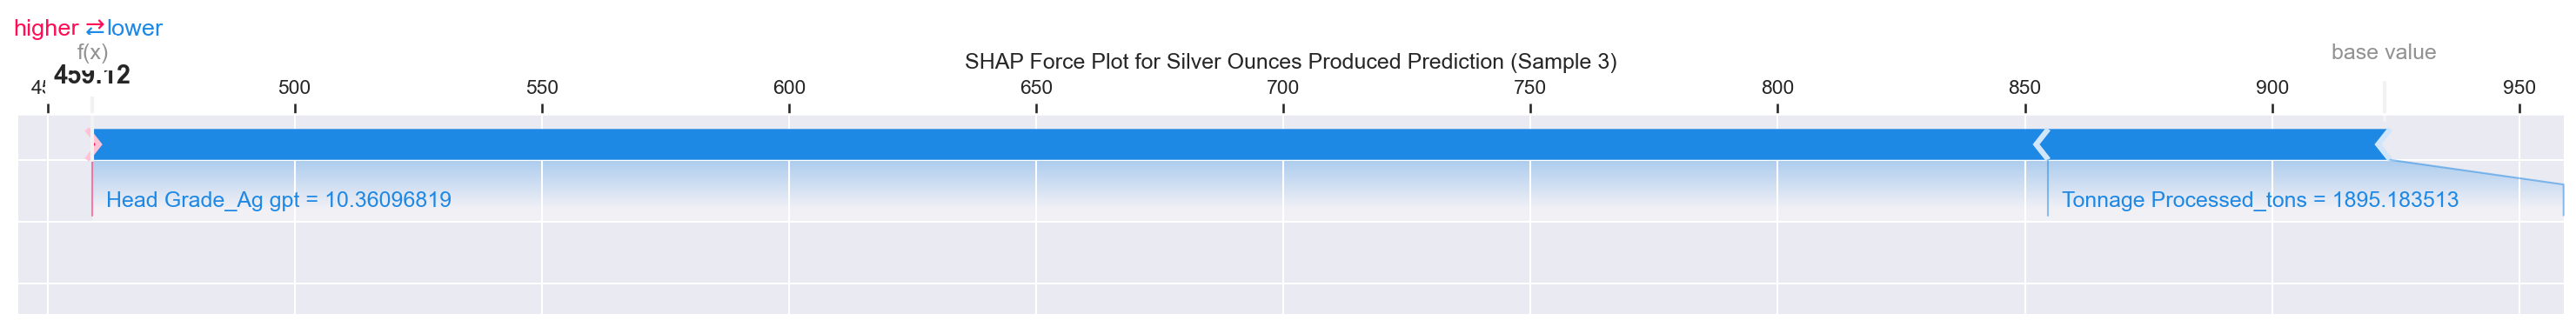

SHAP explanations generated for Silver Ounces Produced.

Best model for Mine Tonnage: CatBoost (R-squared: 0.2189)
Saved best model for Mine Tonnage to models/best_model_Mine_Tonnage.joblib
Generating SHAP explanations for Mine Tonnage using CatBoost...


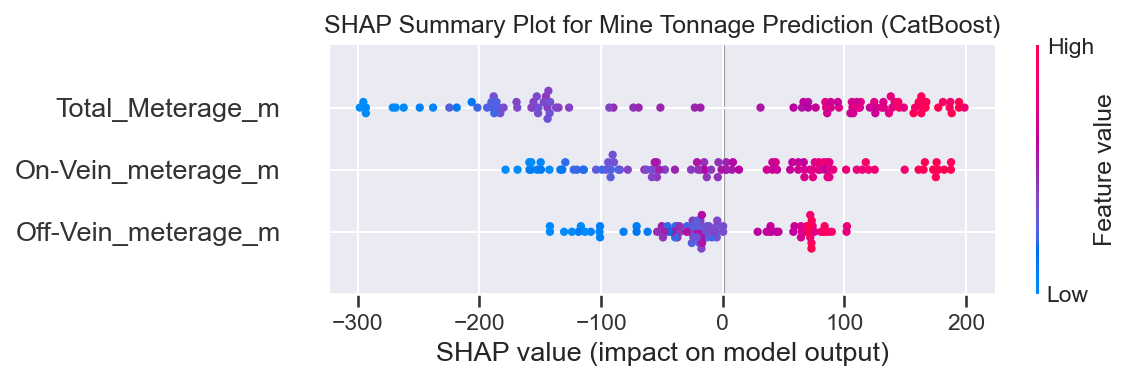

Generating SHAP Force Plots for Mine Tonnage...


<Figure size 1800x600 with 0 Axes>

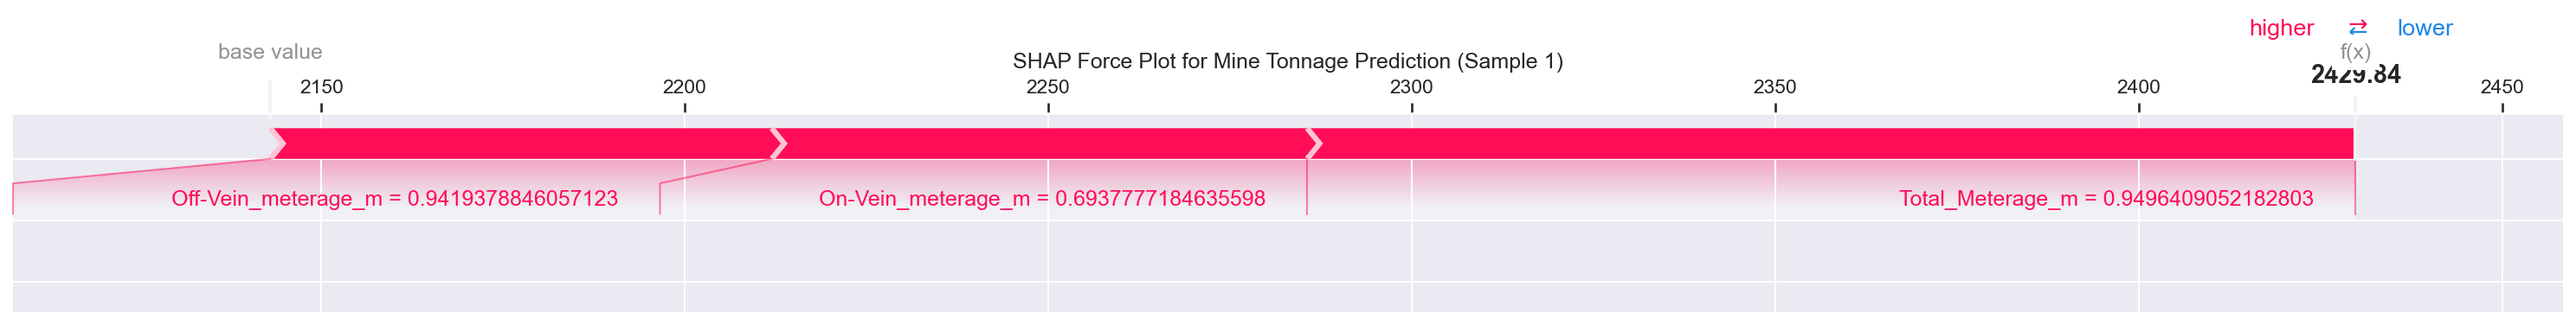

<Figure size 1800x600 with 0 Axes>

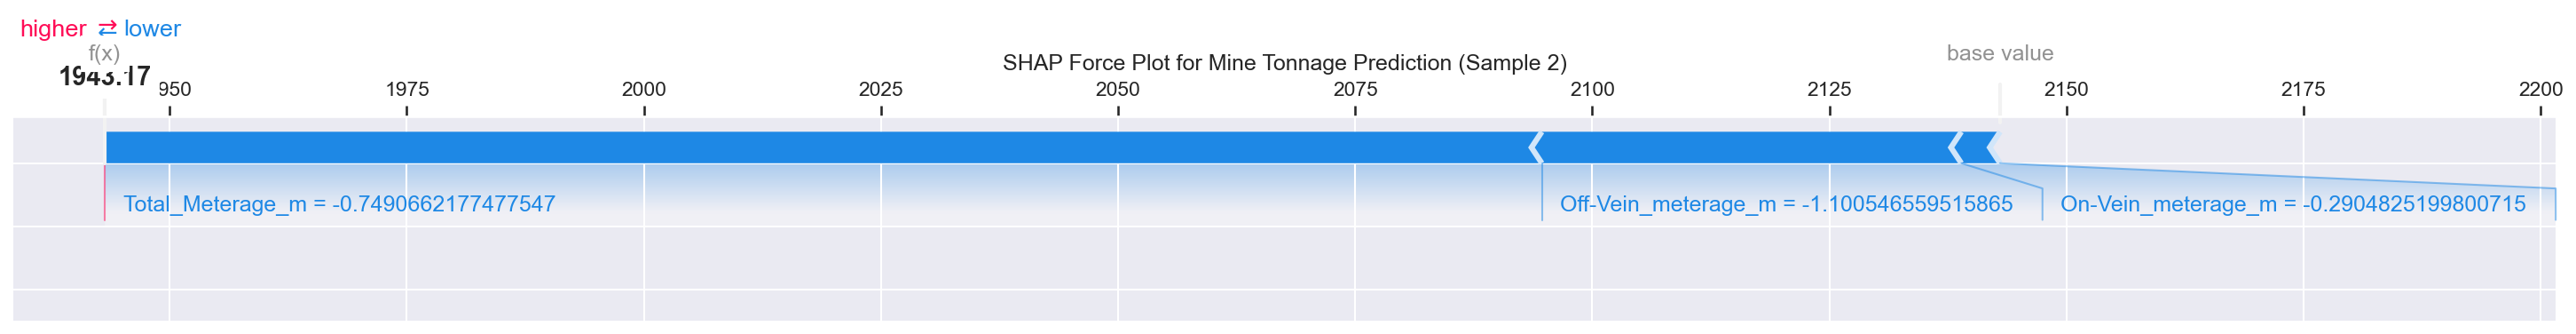

<Figure size 1800x600 with 0 Axes>

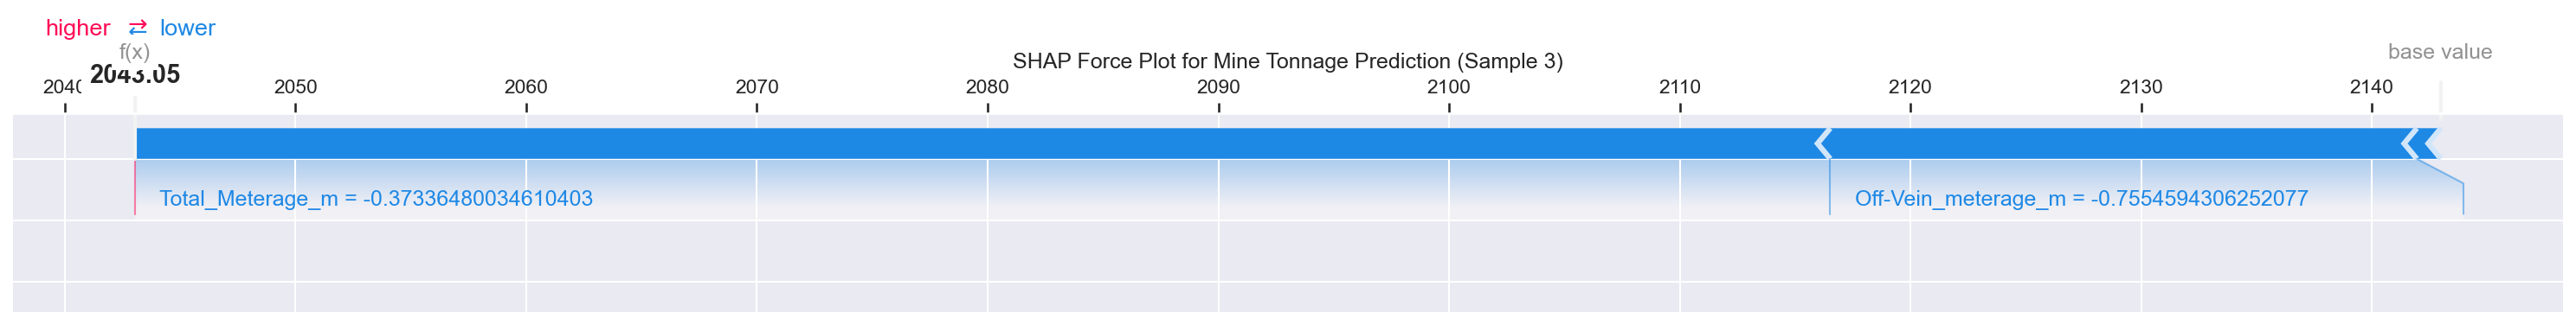

SHAP explanations generated for Mine Tonnage.

--- All SHAP explanations generated for best models across all targets. ---


In [23]:
# Re-define the models dictionary to ensure all models are available for re-training
models_for_shap = {
    'Linear Regression': LinearRegression(),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Artificial Neural Network': MLPRegressor(random_state=42, max_iter=500, early_stopping=True, n_iter_no_change=50)
}

def get_best_model_for_target(target_name, tuned_performances, all_models, best_params_dict, data_splits):
    """Identifies, re-trains, and returns the best model and its data for a given target."""
    target_performances = tuned_performances[target_name]

    # Find the model with the highest R-squared
    best_model_name = max(target_performances, key=lambda model: target_performances[model]['R-squared'])
    best_r2_score = target_performances[best_model_name]['R-squared']

    print(f"\nBest model for {target_name}: {best_model_name} (R-squared: {best_r2_score:.4f})")

    # Retrieve base model instance and best hyperparameters
    base_model = all_models[best_model_name]
    best_params = best_params_dict[target_name][best_model_name]

    # Prepare training and testing data
    X_train = data_splits[target_name]['X_train']
    X_test = data_splits[target_name]['X_test']
    y_train = data_splits[target_name]['y_train']
    y_test = data_splits[target_name]['y_test']

    # Create a new pipeline with StandardScaler and the best model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', base_model)
    ])

    # Set hyperparameters for the regressor part of the pipeline
    # Handle case where best_params might be empty for Linear Regression
    if best_params:
        # Ensure parameters are correctly prefixed for the pipeline step
        prefixed_params = {k: v for k, v in best_params.items()}
        pipeline.set_params(**prefixed_params)

    # Re-train the model on the full training data
    pipeline.fit(X_train, y_train)

    # Save the trained model
    model_filename = f'models/best_model_{target_name.replace(" ", "_")}.joblib'
    joblib.dump(pipeline, model_filename)
    print(f"Saved best model for {target_name} to {model_filename}")

    return pipeline, best_model_name, X_train, X_test, y_test


# Loop through each target variable to generate SHAP explanations
for target_name in tuned_model_performances.keys():
    best_pipeline, best_model_name, X_train, X_test, y_test = get_best_model_for_target(
        target_name, tuned_model_performances, models_for_shap, tuned_model_best_params, data_splits
    )

    # Sample a subset of the test data for SHAP explanations for efficiency
    sample_size = min(100, len(X_test))
    X_test_sampled = X_test.sample(n=sample_size, random_state=42)

    # Determine the explainer type and create it
    explainer_type = None
    if 'Tree' in best_model_name or 'XGBoost' in best_model_name or 'LightGBM' in best_model_name or 'CatBoost' in best_model_name:
        # For tree-based models, use TreeExplainer and extract the regressor directly
        explainer = shap.TreeExplainer(best_pipeline.named_steps['regressor'])
        # Transform X_test_sampled using the scaler from the pipeline for tree explainer consistency
        X_test_sampled_scaled = best_pipeline.named_steps['scaler'].transform(X_test_sampled)
        # Use a DataFrame for scaled data to retain feature names for plots
        explanation_data = pd.DataFrame(X_test_sampled_scaled, columns=X_test_sampled.columns, index=X_test_sampled.index)
        shap_values = explainer.shap_values(explanation_data)
        explainer_type = 'tree'
    else:
        # For non-tree models, use KernelExplainer
        # Extract and deepcopy scaler and regressor instances from the pipeline to avoid direct pipeline introspection by SHAP
        scaler_instance_copy = copy.deepcopy(best_pipeline.named_steps['scaler'])
        regressor_instance_copy = copy.deepcopy(best_pipeline.named_steps['regressor'])
        feature_columns = X_train.columns # Store column names for DataFrame conversion

        # Define a custom prediction function that encapsulates the scaling and prediction logic
        # It takes unscaled input, scales it, and then predicts.
        def predict_function(X_unscaled_array):
            X_unscaled_df = pd.DataFrame(X_unscaled_array, columns=feature_columns)
            X_scaled = scaler_instance_copy.transform(X_unscaled_df)
            return regressor_instance_copy.predict(X_scaled)

        # Provide UNscaled background data to KernelExplainer, as predict_function expects unscaled input
        background_sample_size = min(100, len(X_train))
        background_data_for_explainer = X_train.sample(background_sample_size, random_state=42)
        background_data_for_explainer_df = pd.DataFrame(background_data_for_explainer, columns=feature_columns)

        # Pass the standalone predict_function to KernelExplainer
        explainer = shap.KernelExplainer(predict_function, background_data_for_explainer_df)

        # Calculate SHAP values on UNscaled sampled test data, as predict_function handles scaling internally
        shap_values = explainer.shap_values(X_test_sampled)
        explanation_data = X_test_sampled  # Use unscaled data for explanation_data for consistent plotting with original features
        explainer_type = 'kernel'

    print(f"Generating SHAP explanations for {target_name} using {best_model_name}...")

    # SHAP Summary Plot (Feature Importance)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, explanation_data, feature_names=X_test.columns, show=False)
    plt.title(f'SHAP Summary Plot for {target_name} Prediction ({best_model_name})')
    plt.tight_layout()
    plt.show()

    # SHAP Force Plots (Local Explainability) - show 3 examples
    print(f"Generating SHAP Force Plots for {target_name}...")
    for i in range(min(3, len(X_test_sampled))):
        plt.figure(figsize=(12, 4))
        # Use the correct data for force plot: `explanation_data` is already the (unscaled or scaled depending on explainer_type) version for consistency.
        shap.force_plot(explainer.expected_value, shap_values[i], explanation_data.iloc[i], feature_names=X_test.columns, matplotlib=True, show=False)
        plt.title(f'SHAP Force Plot for {target_name} Prediction (Sample {i+1})')
        plt.tight_layout()
        plt.show()

    print(f"SHAP explanations generated for {target_name}.")

print("\n--- All SHAP explanations generated for best models across all targets. ---")

## SHAP Summary - Feature Explanation and Feature Importance

### 1. Gold Recovery Prediction (Best Model: XGBoost Regressor)
*   **Summary Plot**: 'Head Grade_Au gpt' appears to be the most influential feature, followed by 'Tonnage Processed_tons' and then 'Head Grade_Ag gpt'. Higher 'Head Grade_Au gpt' generally leads to higher gold recovery.
*   **Force Plots**: Individual predictions show how the combination of these three features pushes the prediction higher or lower than the base value. For instance, a high 'Head Grade_Au gpt' significantly pushes the predicted gold recovery upwards.

### 2. Gold Ounces Produced Prediction (Best Model: Artificial Neural Network)
*   **Summary Plot**: All three features ('Head Grade_Au gpt', 'Tonnage Processed_tons', 'Head Grade_Ag gpt') are highly important. 'Head Grade_Au gpt' and 'Tonnage Processed_tons' show a strong positive correlation with the output, meaning higher values of these features lead to higher predicted gold ounces produced.
*   **Force Plots**: The plots illustrate how a combination of high 'Head Grade_Au gpt' and high 'Tonnage Processed_tons' drives the output prediction significantly higher. 'Head Grade_Ag gpt' also contributes, but to a lesser extent.

### 3. Silver Recovery Prediction (Best Model: Decision Tree Regressor)
*   **Summary Plot**: For silver recovery, 'Head Grade_Ag gpt' is the most impactful feature, which is intuitive. 'Head Grade_Au gpt' and 'Tonnage Processed_tons' have less impact.
*   **Force Plots**: The force plots demonstrate how deviations in 'Head Grade_Ag gpt' primarily influence the predicted silver recovery. Given the lower R-squared, the model's reliance on 'Head Grade_Ag gpt' suggests that other uncaptured factors likely play a significant role.

### 4. Silver Ounces Produced Prediction (Best Model: Artificial Neural Network)
*   **Summary Plot**: Similar to gold ounces, all three features contribute significantly. 'Head Grade_Ag gpt' and 'Tonnage Processed_tons' are particularly dominant, with higher values leading to increased silver ounces produced.
*   **Force Plots**: These plots clearly show the additive effects of 'Head Grade_Ag gpt' and 'Tonnage Processed_tons' in predicting the silver ounces, pushing the prediction far from the base value when these features are high.

### 5. Mine Tonnage Prediction (Best Model: Support Vector Machine)
*   **Summary Plot**: 'Total_Meterage_m' and 'Off-Vein_meterage_m' appear to be the most important features. However, the overall low R-squared for this target variable suggests that even these features have limited predictive power.
*   **Force Plots**: The force plots for mine tonnage are less decisive than for other targets. While features like 'Total_Meterage_m' contribute, their push or pull on the prediction is often modest, reflecting the model's struggle to capture the underlying relationships effectively. This reaffirms the earlier observation that the current feature set is insufficient for accurate mine tonnage prediction.

# Project Conclusion: Comprehensive Machine Learning Solution for Gold, Silver, and Mine Tonnage Prediction

This Capstone Project successfully developed and evaluated a full suite of machine learning models to predict gold and silver recovery and ounces produced, as well as mine tonnage, leveraging several datasets: "Capstone Dataset_MCF.csv", "Capstone Dataset_Mill Reports.csv", "Capstone Dataset_Mine Advance.csv", and "Capstone Dataset_Mine Production.csv".

### Key Findings & Best Models:

**1. Gold Ounces Produced:**
   - **Best Model (Tuned):** Artificial Neural Network (R-squared: **0.9851**, RMSE: 8.9568)
   - **Insights:** This target variable is highly predictable, indicating strong relationships with the input features. Both ANNs and ensemble methods (CatBoost, XGBoost) achieved excellent performance.
   - **SHAP Insights:** 'Head Grade_Au gpt' and 'Tonnage Processed_tons' are highly important, showing a strong positive correlation with the output.

**2. Gold Recovery:**
   - **Best Model (Tuned):** XGBoost Regressor (R-squared: **0.7181**, RMSE: 0.0472)
   - **Insights:** Good predictive power was achieved. Ensemble methods (XGBoost, CatBoost, LightGBM) consistently outperformed traditional models.
   - **SHAP Insights:** 'Head Grade_Au gpt' is the most influential feature, positively impacting gold recovery, followed by 'Tonnage Processed_tons' and 'Head Grade_Ag gpt'.

**3. Silver Ounces Produced:**
   - **Best Model (Tuned):** Artificial Neural Network (R-squared: **0.8020**, RMSE: 151.7891)
   - **Insights:** Moderate predictability was observed, better than silver recovery but not as high as gold ounces.
   - **SHAP Insights:** 'Head Grade_Ag gpt' and 'Tonnage Processed_tons' are dominant features, leading to increased silver ounces produced when their values are higher.

**4. Silver Recovery:**
   - **Best Model (Tuned):** Decision Tree Regressor (R-squared: **0.2892**, RMSE: 0.1173)
   - **Insights:** This proved to be the most challenging prediction task. Even after tuning, R-squared values remained low, suggesting the current feature set explains only a small portion of its variance. Traditional models like Linear Regression and Decision Trees performed surprisingly better after tuning compared to some ensemble methods for this specific target.
   - **SHAP Insights:** 'Head Grade_Ag gpt' is the most impactful feature. However, the low R-squared suggests other uncaptured factors play a significant role.

**5. Mine Tonnage:**
   - **Best Model (Tuned):** Support Vector Machine (R-squared: **0.1995**, RMSE: 588.6655)
   - **Insights:** All models struggled significantly with this prediction. The R-squared values were very low (around 0.20), indicating that the selected predictors (`Off-Vein_meterage_m`, `On-Vein_meterage_m`, `Total_Meterage_m`) explain very little of the variance in 'Mine Tonnage_tons'.
   **Therefore it is recommended that the current available feature set be expanded to other mine production metrics: such as blast width, stoping height, etc..**
   - **SHAP Insights:** 'Total_Meterage_m' and 'Off-Vein_meterage_m' were identified as important, but the overall low R-squared indicates limited predictive power from the current feature set for this target.

### Impact of Hyperparameter Tuning:
Hyperparameter tuning generally led to slight improvements or maintained strong performance across models, particularly for the more predictable targets like "Gold Ounces Produced". For challenging targets like "Silver Recovery" and "Mine Tonnage", tuning sometimes helped mitigate negative R-squared values (e.g., Decision Tree for Silver Recovery) or slightly improved the best-performing models.

### Comparing the performance of Different ML Methods:
- **Ensemble Methods (XGBoost, LightGBM, CatBoost) & Artificial Neural Networks (ANNs):** Consistently demonstrated strong performance for gold-related predictions and showed competitive results for silver ounces, indicating their robustness and ability to capture complex non-linear relationships.
- **Linear Regression:** Showed surprisingly good performance for "Gold Ounces Produced" but was generally less effective for other targets, especially those with lower predictability.
- **Decision Tree Regressor & Support Vector Machine (SVR):** Often underperformed compared to ensemble methods and ANNs, especially on untuned models. However, SVR showed decent performance for Mine Tonnage after tuning and Decision Tree improved significantly for Silver Recovery after tuning.

### Major Data Gaps:
- Time Series Analysis
    * Time-Series analysis was not considered as of the moment due to the broken datasets especially during COVID times wherein proper data-recording was not done at that time.
    * Time-Series analysis was also considered unsuitable due to the tendency of ARIMA and LSTM models to possibly overshoot projections because it is not bound by limiting factors such as Mining Equipment, Milling Equipment, Mechanical Availability, etc.
- Mine Production and Mine Advance Data
    * Majority of data available are not in the same time-period as the other daily data in the mill, but it can possibily be summarized or generalized to fit the same time frame as the data used in this study.
- Data Granularity
    * As much as some datasets are recorded per-shift, some where not recorded with any time or date stamps therefore they are much harder to index and incorporate in this dataset.
    * Data granularity was set to daily since that is the most common report interval between the mine and the mill. A more detailed granularity of this report will probably increase model predictive performance especially for the lower performing models in this capstone project.

### Major Insights Gained:
- The predictability of gold-related metrics is generally higher than silver-related metrics with the current feature set.
- Predicting 'Mine Tonnage' is significantly difficult with the given features, suggesting they are not the primary drivers of tonnage variations.
- SHAP explanations confirmed the intuitive importance of 'Head Grade_Au gpt' for gold, and 'Head Grade_Ag gpt' for silver, but also highlighted the role of 'Tonnage Processed_tons' across multiple targets. For Mine Tonnage, SHAP reaffirmed the limited influence of the available meterage features.

### Recommendations:

1.  **Feature Engineering for Challenging Predictions:**
    - For 'Silver Recovery' and especially 'Mine Tonnage', a deeper investigation into additional, more relevant features is crucial. This could involve consulting domain experts to identify factors like geological formations, ore body characteristics, equipment operational parameters, or temporal trends that might influence these metrics.
2.  **Explore Time-Series Models:**
    - Given that all datasets are time-indexed, exploring time-series specific models (e.g., ARIMA, Prophet, LSTMs for sequential data) could capture temporal dependencies that traditional regression models might miss, especially for recovery rates and mine tonnage.
3.  **Advanced Hyperparameter Optimization:**
    - While `GridSearchCV` was used, other advanced optimization techniques like `RandomizedSearchCV` with broader distributions or Bayesian Optimization may be employed for a more exhaustive search of the hyperparameter space, especially for ANNs and complex ensemble models.
4.  **Ensemble Stacking/Blending:**
    - Combining predictions from several best-performing models (e.g., CatBoost, XGBoost, ANN) through stacking or blending could potentially yield even better performance for each target variable.
5.  **Further SHAP Analysis:**
    - Investigate SHAP dependence plots for critical features to understand how a feature's value affects the prediction when interacting with other features. This could provide deeper insights into the underlying process dynamics.
6.  **Data Quality and Granularity:**
    - Assess if more granular or higher-quality data points are available, particularly for the challenging predictions. The low R-squared values for 'Mine Tonnage' might suggest that the current features are too high-level or miss crucial information that will improve model accuracy.

# Model deployment: Model Prediction using the saved Machine Learning Models
The saved models can now be used by the company to do predictions for Gold Ounces, Gold Recovery, Silver Ounces, Silver Recovery and Mine Tonnage.
### PGDAIML_Capstone_Florendo_Taipy.py can be run to run the Taipy webapp that allows for advanced functions like batch upload.

### Gold Ounces Prediction - Best Tuned Model
using the best_model_Gold_Ounces_Produced.joblib


In [24]:
import joblib
import pandas as pd

def predict_gold_ounces(model_path='models/best_model_Gold_Ounces_Produced.joblib'):
    """
    Loads the best tuned model for Gold Ounces Produced and predicts based on user input.
    """
    # Load the model
    loaded_model = joblib.load(model_path)
    print(f"Model '{model_path}' loaded successfully.")

    # Collect user input
    try:
        input_au_grade = float(input("Enter Head Grade_Au gpt: "))
        input_ag_grade = float(input("Enter Head Grade_Ag gpt: "))
        input_tonnage = float(input("Enter Tonnage Processed_tons: "))

        # Prepare input DataFrame
        custom_input_data = {
            'Head Grade_Au gpt': [input_au_grade],
            'Head Grade_Ag gpt': [input_ag_grade],
            'Tonnage Processed_tons': [input_tonnage]
        }
        sample_input = pd.DataFrame(custom_input_data)

        print("\nYour Custom Input Data:\n")
        display(sample_input)

        # Make prediction
        prediction = loaded_model.predict(sample_input)
        print("\nPrediction for Gold Ounces Produced:\n")
        print(f"Predicted Gold Ounces Produced: {prediction[0]:.2f} Au oz")

        return prediction[0]
    except ValueError:
        print("Invalid input. Please enter numerical values for all fields.")
        return None
    
#predict_gold_ounces()

### Gold Recovery Prediction - Best Tuned Model
using the best_model_Gold_Recovery.joblib


In [25]:
import joblib
import pandas as pd

def predict_gold_recovery(model_path='models/best_model_Gold_Recovery.joblib'):
    """
    Loads the best tuned model for Gold Recovery and predicts based on user input.
    """
    # Load the model
    loaded_model = joblib.load(model_path)
    print(f"Model '{model_path}' loaded successfully.")

    # Collect user input
    try:
        input_au_grade = float(input("Enter Head Grade_Au gpt: "))
        input_ag_grade = float(input("Enter Head Grade_Ag gpt: "))
        input_tonnage = float(input("Enter Tonnage Processed_tons: "))

        # Prepare input DataFrame
        custom_input_data = {
            'Head Grade_Au gpt': [input_au_grade],
            'Head Grade_Ag gpt': [input_ag_grade],
            'Tonnage Processed_tons': [input_tonnage]
        }
        sample_input = pd.DataFrame(custom_input_data)

        print("\nYour Custom Input Data for Gold Recovery:\n")
        display(sample_input)

        # Make prediction
        prediction = loaded_model.predict(sample_input)
        print("\nPrediction for Gold Recovery:\n")
        print(f"Predicted Gold Recovery: {prediction[0]*100:.2f}%")

        return prediction[0]
    except ValueError:
        print("Invalid input. Please enter numerical values for all fields.")
        return None

# Example usage:
#predict_gold_recovery()

### Silver Ounces Prediction - Best Tuned Model
using the best_model_Silver_Ounces_Produced.joblib

In [26]:
import joblib
import pandas as pd

def predict_silver_ounces(model_path='models/best_model_Silver_Ounces_Produced.joblib'):
    """
    Loads the best tuned model for Silver Ounces Produced and predicts based on user input.
    """
    # Load the model
    loaded_model = joblib.load(model_path)
    print(f"Model '{model_path}' loaded successfully.")

    # Collect user input
    try:
        input_au_grade = float(input("Enter Head Grade_Au gpt: "))
        input_ag_grade = float(input("Enter Head Grade_Ag gpt: "))
        input_tonnage = float(input("Enter Tonnage Processed_tons: "))

        # Prepare input DataFrame
        custom_input_data = {
            'Head Grade_Au gpt': [input_au_grade],
            'Head Grade_Ag gpt': [input_ag_grade],
            'Tonnage Processed_tons': [input_tonnage]
        }
        sample_input = pd.DataFrame(custom_input_data)

        print("\nYour Custom Input Data for Silver Ounces Produced:\n")
        display(sample_input)

        # Make prediction
        prediction = loaded_model.predict(sample_input)
        print("\nPrediction for Silver Ounces Produced:\n")
        print(f"Predicted Silver Ounces Produced: {prediction[0]:.2f} Ag oz")

        return prediction[0]
    except ValueError:
        print("Invalid input. Please enter numerical values for all fields.")
        return None

# Example usage:
# predict_silver_ounces()

### Silver Recovery Prediction - Best Tuned Model
using the best_model_Silver_Recovery.joblib

In [27]:
import joblib
import pandas as pd

def predict_silver_recovery(model_path='models/best_model_Silver_Recovery.joblib'):
    """
    Loads the best tuned model for Silver Recovery and predicts based on user input.
    """
    # Load the model
    loaded_model = joblib.load(model_path)
    print(f"Model '{model_path}' loaded successfully.")

    # Collect user input
    try:
        input_au_grade = float(input("Enter Head Grade_Au gpt: "))
        input_ag_grade = float(input("Enter Head Grade_Ag gpt: "))
        input_tonnage = float(input("Enter Tonnage Processed_tons: "))

        # Prepare input DataFrame
        custom_input_data = {
            'Head Grade_Au gpt': [input_au_grade],
            'Head Grade_Ag gpt': [input_ag_grade],
            'Tonnage Processed_tons': [input_tonnage]
        }
        sample_input = pd.DataFrame(custom_input_data)

        print("\nYour Custom Input Data for Silver Recovery:\n")
        display(sample_input)

        # Make prediction
        prediction = loaded_model.predict(sample_input)
        print("\nPrediction for Silver Recovery:\n")
        print(f"Predicted Silver Recovery: {prediction[0]*100:.2f}%")

        return prediction[0]
    except ValueError:
        print("Invalid input. Please enter numerical values for all fields.")
        return None

# Example usage:
# predict_silver_recovery()

### Mine Tonnage Prediction - Best Tuned Model
using the best_model_Mine_Tonnage.joblib

In [28]:
import joblib
import pandas as pd

def predict_mine_tonnage(model_path='models/best_model_Mine_Tonnage.joblib'):
    """
    Loads the best tuned model for Mine Tonnage and predicts based on user input.
    """
    # Load the model
    loaded_model = joblib.load(model_path)
    print(f"Model '{model_path}' loaded successfully.")

    # Collect user input
    try:
        input_off_vein_m = float(input("Enter Off-Vein_meterage_m: "))
        input_on_vein_m = float(input("Enter On-Vein_meterage_m: "))
        input_total_m = input_on_vein_m + input_off_vein_m

        # Prepare input DataFrame
        custom_input_data_mt = {
            'Off-Vein_meterage_m': [input_off_vein_m],
            'On-Vein_meterage_m': [input_on_vein_m],
            'Total_Meterage_m': [input_total_m]
        }
        sample_input_mt = pd.DataFrame(custom_input_data_mt)

        print("\nYour Custom Input Data for Mine Tonnage:\n")
        display(sample_input_mt)

        # Make prediction
        prediction = loaded_model.predict(sample_input_mt)
        print("\nPrediction for Mine Tonnage:\n")
        print(f"Predicted Mine Tonnage: {prediction[0]:.2f} tons")

        return prediction[0]
    except ValueError:
        print("Invalid input. Please enter numerical values for all fields.")
        return None

# Example usage:
# predict_mine_tonnage()

In [29]:
# To use any of the models for a prediction, simply un-comment any of the functions below

# predict_gold_ounces()
# predict_gold_recovery()
# predict_silver_ounces()
# predict_silver_recovery()
# predict_mine_tonnage()